In [1]:
import torch, os, mlflow
import matplotlib.pyplot as plt, numpy as np
from mlflow_helper import load_attack_results, load_from_db
from itertools import chain

In [206]:
baseline_run_names = [1668278459, 1668279489, 1668283177, 1668284221, 1668289478,
            1668296690, 1668302862, 1668309303, 1668319357, 1668343081, 1668361949,
            1667820145, 1667706428, 1667745011, 1667634222, 1667729890, 1667599289]
# 1669374570 is the untrained model (training observation), TODO: investigate

S2CNN_run_names = [1668559990, 1668568059, 1668578286, 1668598496, 1668637573, 1668139362, 1668030960]

NR_NR_run_names = [1671715247, 1671716139, 1671717283, 1671720334, 1671724685, 1671725735, 1671729865,
                   1671742022, 1671748092, 1671760833]

flat_baseline_run_names = [1680863211, 1680864006, 1680866124, 1680868748, 1680871756, 1680873086,
                           1680876846, 1680890211, 1680897318, 1680911688]

flat_S2CNN_run_names = [1681201196, 1681205342, 1681215877, 1681244385, 1681274180, 1681288693,
                        1681397514, 1681407318, 1681517329]

flat_baseline_different_img_sizes_run_names = [1683048569, 1683049166, 1683052258, 1683052930]

flat_S2CNN_data_aug_run_names = [1686661552, 1686673355, 1686698888, 1686733114, 1686751157,
                                 1686793844, 1686921708, 1686943569, 1687054061, 1695178713, 1695204583, 1695475350]

flat_baseline_data_aug_run_names = [1686568319, 1686568791, 1686572608, 1686575304, 1686579498, 1686584727,
                                    1686591061, 1686618156, 1686625770, 1686649185]

flat_28x28_S2CNN_run_names = [1696930897, 1696932144, 1696936674, 1696941636, 1696947668, 1696954063,
                              1697043800, 1697050764, 1697052959, 1697061474, 1697073402, 1697084768,
                              1697091799, 1697096372, 1697103093, 1697110031, 1697121241, 1697134502]

flat_28x28_baseline_run_names = [1697206030, 1697206644, 1697207683, 1697209477, 1697210525, 1697213123,
                                 1697226035, 1697226722, 1697228695, 1697229854, 1697231110, 1697236373,
                                 1697215830, 1697217421, 1697217912, 1697220416, 1697221465, 1697224525]

flat_28x28_MLP_run_names = [1697263106, 1697264117, 1697264852, 1697266762, 1697267108, 1697269780, 1697270716,
                            1697271049, 1697271795, 1697274594, 1697275265, 1697278699, 1697282534, 1697282725,
                            1697283628, 1697285267, 1697286841, 1697289516, 1697291360, 1697291756, 1697292309,
                            1697293673, 1697296087, 1697297687, 1697298663, 1697299099, 1697300189, 1697301644,
                            1697303700, 1697304939]

flat_28x28_MLP_data_aug_run_names = [1697314773, 1697315648, 1697316253, 1697319666, 1697321134, 1697323039,
                                     1697381703, 1697387805, 1697392047, 1697395958, 1697423371,
                                     1697326227, 1697327407, 1697329265, 1697330634, 1697334107, 1697335845,
                                     1697438899, 1697441419, 1697445309, 1697454414, 1697470261,
                                     1697339675, 1697340366, 1697342252, 1697344299, 1697346310, 1697348476,
                                     1697493565, 1697500831, 1697507810, 1697517942, 1697522106,
                                     1697351878, 1697352331, 1697353302, 1697355022, 1697356907, 1697357777,
                                     1697556854, 1697557558, 1697562076, 1697563004, 1697575214,
                                     1697359818, 1697360773, 1697363594, 1697364527, 1697368366, 1697373536,
                                     1697581673, 1697587785, 1697595752, 1697602209, 1697615182]

flat_28x28_baseline_data_aug_run_names = [1697632034, 1697633409, 1697635738, 1697638647, 1697643509, 1697644887,
                                          1697670845, 1697672621, 1697673977, 1697676458, 1697679758, 1697684622,
                                          1697649945, 1697650878, 1697652505, 1697658380, 1697663547, 1697665587]

flat_28x28_S2CNN_data_aug_run_names = [1697686618, 1697690682, 1697693979, 1697701303, 1697706266, 1697712624,
                                       1697727865, 1697787061, 1697793829, 1697833204, 1697963473, 1698179501,
                                       1698348121]

flat_28x28_baseline_run_names_inv = [1698751219, 1698751559, 1698754950, 1698757664, 1698760718, 1698764481,
                                     1698939890, 1698941404, 1698944388, 1698947570, 1698952241, 1698953882,
                                     1698959274, 1698960132, 1698963429, 1698966845, 1698969603, 1698974850]


flat_28x28_baseline_data_aug_run_names_inv = [1698766325, 1698768397, 1698770664, 1698771523, 1698775831, 1698779581,
                                              1698978834, 1698980137, 1698981341, 1698982635, 1698986725, 1698989944,
                                              1698992825, 1698993245, 1698995601, 1698998473, 1699001088, 1699002836]

# mixed_flat_28x28_baseline_data_aug_run_names = []
# for i in chain(range(7), [11,12,17]):
#     mixed_flat_28x28_baseline_data_aug_run_names.append(flat_28x28_baseline_data_aug_run_names[i])

n_baseline_run_names = [1668278459, 1668279489, 1668283177, 1668284221, 1668289478, 1668296690, 1668302862,
                        1668309303, 1668319357, 1668343081, 1668361949,
                        1667595706, 1667596857, 1667601900, 1667605502, 1667608612, 1667612994, 1667616670,
                        1667628509, 1667636483, 1667643891, 1667673814,
                        1667729890, 1667731294, 1667741670, 1667748173, 1667753694, 1667759783, 1667764930,
                        1667783231, 1667805435, 1667810776, 1667881002]

n_S2CNN_run_names = [1668559990, 1668568059, 1668578286, 1668598496, 1668637573,
                     1667922245, 1667928002, 1667949243, 1667987238, 1668030960,
                     1668051244, 1668063693, 1668085318, 1668110081, 1668139362]
    
    
def get_min_max(success_rate):
    try:
        mins = torch.amin(torch.stack(success_rate), dim=0)
        maxs = torch.amax(torch.stack(success_rate), dim=0)
    except TypeError:
        mins = torch.amin(success_rate, dim=0)
        maxs = torch.amax(success_rate, dim=0)
    
    return mins, maxs

In [139]:
baseline_images = []
baseline_preds = []
baseline_clean_preds = []

for run_name in baseline_run_names:
    baseline_images_, baseline_preds_, baseline_clean_preds_, labels = load_attack_results(run_name, 'LinfProjectedGradientDescentAttack', 'images.pickle')
    baseline_images.append(baseline_images_)
    baseline_preds.append(baseline_preds_)
    baseline_clean_preds.append(baseline_clean_preds_)
    
baseline_success = [load_attack_results(run_name, 'LinfProjectedGradientDescentAttack', 'success.pickle') for run_name in baseline_run_names]
baseline_success_rate = [load_attack_results(run_name, 'LinfProjectedGradientDescentAttack', 'success_rate.pickle') for run_name in baseline_run_names]
baseline_logits = torch.stack([load_attack_results(run_name, 'LinfProjectedGradientDescentAttack', 'logits.pickle') for run_name in baseline_run_names])
baseline_clean_test_accs = [load_from_db(run_name, 'metrics.test_acc') for run_name in baseline_run_names]
baseline_total_params = [load_from_db(run_name, 'params.total_params') for run_name in baseline_run_names]
baseline_params = load_attack_results(baseline_run_names[0], 'LinfProjectedGradientDescentAttack', 'params.pickle')

In [3]:
S2CNN_images = []
S2CNN_preds = []
S2CNN_clean_preds = []

for run_name in S2CNN_run_names:
    S2CNN_images_, S2CNN_preds_, S2CNN_clean_preds_, labels = load_attack_results(run_name, 'LinfProjectedGradientDescentAttack', 'images.pickle')
    S2CNN_images.append(S2CNN_images_)
    S2CNN_preds.append(S2CNN_preds_)
    S2CNN_clean_preds.append(S2CNN_clean_preds_)
    
S2CNN_success = [load_attack_results(run_name, 'LinfProjectedGradientDescentAttack', 'success.pickle') for run_name in S2CNN_run_names]
S2CNN_success_rate = [load_attack_results(run_name, 'LinfProjectedGradientDescentAttack', 'success_rate.pickle') for run_name in S2CNN_run_names]
S2CNN_logits = torch.stack([load_attack_results(run_name, 'LinfProjectedGradientDescentAttack', 'logits.pickle') for run_name in S2CNN_run_names])
S2CNN_clean_test_accs = [load_from_db(run_name, 'metrics.test_acc') for run_name in S2CNN_run_names]
S2CNN_total_params = [load_from_db(run_name, 'params.total_params') for run_name in S2CNN_run_names]
S2CNN_params = load_attack_results(S2CNN_run_names[0], 'LinfProjectedGradientDescentAttack', 'params.pickle')

In [34]:
NR_NR_images = []
NR_NR_preds = []
NR_NR_clean_preds = []

for run_name in NR_NR_run_names:
    NR_NR_images_, NR_NR_preds_, NR_NR_clean_preds_, labels = load_attack_results(run_name, 'LinfProjectedGradientDescentAttack', 'images.pickle')
    NR_NR_images.append(NR_NR_images_)
    NR_NR_preds.append(NR_NR_preds_)
    NR_NR_clean_preds.append(NR_NR_clean_preds_)
    
NR_NR_success = [load_attack_results(run_name, 'LinfProjectedGradientDescentAttack', 'success.pickle') for run_name in NR_NR_run_names]
NR_NR_success_rate = [load_attack_results(run_name, 'LinfProjectedGradientDescentAttack', 'success_rate.pickle') for run_name in NR_NR_run_names]
NR_NR_logits = torch.stack([load_attack_results(run_name, 'LinfProjectedGradientDescentAttack', 'logits.pickle') for run_name in NR_NR_run_names])
NR_NR_clean_test_accs = [load_from_db(run_name, 'metrics.test_acc') for run_name in NR_NR_run_names]
NR_NR_total_params = [load_from_db(run_name, 'params.total_params') for run_name in NR_NR_run_names]
NR_NR_params = load_attack_results(NR_NR_run_names[0], 'LinfProjectedGradientDescentAttack', 'params.pickle')

In [6]:
flat_baseline_images = []
flat_baseline_preds = []
flat_baseline_clean_preds = []

for run_name in flat_baseline_run_names:
    flat_baseline_images_, flat_baseline_preds_, flat_baseline_clean_preds_, flat_labels = load_attack_results(run_name, 'LinfProjectedGradientDescentAttack', 'images.pickle')
    flat_baseline_images.append(flat_baseline_images_)
    flat_baseline_preds.append(flat_baseline_preds_)
    flat_baseline_clean_preds.append(flat_baseline_clean_preds_)
    
flat_baseline_success = [load_attack_results(run_name, 'LinfProjectedGradientDescentAttack', 'success.pickle') for run_name in flat_baseline_run_names]
flat_baseline_success_rate = [load_attack_results(run_name, 'LinfProjectedGradientDescentAttack', 'success_rate.pickle') for run_name in flat_baseline_run_names]
flat_baseline_logits = torch.stack([load_attack_results(run_name, 'LinfProjectedGradientDescentAttack', 'logits.pickle') for run_name in flat_baseline_run_names])
flat_baseline_clean_test_accs = [load_from_db(run_name, 'metrics.test_acc') for run_name in flat_baseline_run_names]
flat_baseline_total_params = [load_from_db(run_name, 'params.total_params') for run_name in flat_baseline_run_names]
flat_baseline_params = load_attack_results(flat_baseline_run_names[0], 'LinfProjectedGradientDescentAttack', 'params.pickle')

In [18]:
flat_S2CNN_images = []
flat_S2CNN_preds = []
flat_S2CNN_clean_preds = []

for run_name in flat_S2CNN_run_names:
    flat_S2CNN_images_, flat_S2CNN_preds_, flat_S2CNN_clean_preds_, flat_S2CNN_labels = load_attack_results(run_name, 'LinfProjectedGradientDescentAttack', 'images.pickle')
    flat_S2CNN_images.append(flat_S2CNN_images_)
    flat_S2CNN_preds.append(flat_S2CNN_preds_)
    flat_S2CNN_clean_preds.append(flat_S2CNN_clean_preds_)
    
flat_S2CNN_success = [load_attack_results(run_name, 'LinfProjectedGradientDescentAttack', 'success.pickle') for run_name in flat_S2CNN_run_names]
flat_S2CNN_success_rate = [load_attack_results(run_name, 'LinfProjectedGradientDescentAttack', 'success_rate.pickle') for run_name in flat_S2CNN_run_names]
flat_S2CNN_logits = torch.stack([load_attack_results(run_name, 'LinfProjectedGradientDescentAttack', 'logits.pickle') for run_name in flat_S2CNN_run_names])
flat_S2CNN_clean_test_accs = [load_from_db(run_name, 'metrics.test_acc') for run_name in flat_S2CNN_run_names]
flat_S2CNN_total_params = [load_from_db(run_name, 'params.total_params') for run_name in flat_S2CNN_run_names]
flat_S2CNN_params = load_attack_results(flat_S2CNN_run_names[0], 'LinfProjectedGradientDescentAttack', 'params.pickle')

In [3]:
flat_baseline_different_img_sizes_images = []
flat_baseline_different_img_sizes_preds = []
flat_baseline_different_img_sizes_clean_preds = []

for run_name in flat_baseline_different_img_sizes_run_names:
    flat_baseline_different_img_sizes_images_, flat_baseline_different_img_sizes_preds_, flat_baseline_different_img_sizes_clean_preds_, flat_labels = load_attack_results(run_name, 'LinfProjectedGradientDescentAttack', 'images.pickle')
    flat_baseline_different_img_sizes_images.append(flat_baseline_different_img_sizes_images_)
    flat_baseline_different_img_sizes_preds.append(flat_baseline_different_img_sizes_preds_)
    flat_baseline_different_img_sizes_clean_preds.append(flat_baseline_different_img_sizes_clean_preds_)
    
flat_baseline_different_img_sizes_success = [load_attack_results(run_name, 'LinfProjectedGradientDescentAttack', 'success.pickle') for run_name in flat_baseline_different_img_sizes_run_names]
flat_baseline_different_img_sizes_success_rate = [load_attack_results(run_name, 'LinfProjectedGradientDescentAttack', 'success_rate.pickle') for run_name in flat_baseline_different_img_sizes_run_names]
flat_baseline_different_img_sizes_logits = torch.stack([load_attack_results(run_name, 'LinfProjectedGradientDescentAttack', 'logits.pickle') for run_name in flat_baseline_different_img_sizes_run_names])
flat_baseline_different_img_sizes_clean_test_accs = [load_from_db(run_name, 'metrics.test_acc') for run_name in flat_baseline_different_img_sizes_run_names]
flat_baseline_different_img_sizes_total_params = [load_from_db(run_name, 'params.total_params') for run_name in flat_baseline_different_img_sizes_run_names]
flat_baseline_different_img_sizes_params = load_attack_results(flat_baseline_different_img_sizes_run_names[0], 'LinfProjectedGradientDescentAttack', 'params.pickle')

In [3]:
flat_baseline_data_aug_images = []
flat_baseline_data_aug_preds = []
flat_baseline_data_aug_clean_preds = []

for run_name in flat_baseline_data_aug_run_names:
    flat_baseline_data_aug_images_, flat_baseline_data_aug_preds_, flat_baseline_data_aug_clean_preds_, labels = load_attack_results(run_name, 'LinfProjectedGradientDescentAttack', 'images.pickle')
    flat_baseline_data_aug_images.append(flat_baseline_data_aug_images_)
    flat_baseline_data_aug_preds.append(flat_baseline_data_aug_preds_)
    flat_baseline_data_aug_clean_preds.append(flat_baseline_data_aug_clean_preds_)
    
flat_baseline_data_aug_success = [load_attack_results(run_name, 'LinfProjectedGradientDescentAttack', 'success.pickle') for run_name in flat_baseline_data_aug_run_names]
flat_baseline_data_aug_success_rate = [load_attack_results(run_name, 'LinfProjectedGradientDescentAttack', 'success_rate.pickle') for run_name in flat_baseline_data_aug_run_names]
flat_baseline_data_aug_logits = torch.stack([load_attack_results(run_name, 'LinfProjectedGradientDescentAttack', 'logits.pickle') for run_name in flat_baseline_data_aug_run_names])
flat_baseline_data_aug_clean_test_accs = [load_from_db(run_name, 'metrics.test_acc') for run_name in flat_baseline_data_aug_run_names]
flat_baseline_data_aug_total_params = [load_from_db(run_name, 'params.total_params') for run_name in flat_baseline_data_aug_run_names]
flat_baseline_data_aug_params = load_attack_results(flat_baseline_data_aug_run_names[0], 'LinfProjectedGradientDescentAttack', 'params.pickle')

In [65]:
flat_S2CNN_data_aug_images = []
flat_S2CNN_data_aug_preds = []
flat_S2CNN_data_aug_clean_preds = []

for run_name in flat_S2CNN_data_aug_run_names:
    flat_S2CNN_data_aug_images_, flat_S2CNN_data_aug_preds_, flat_S2CNN_data_aug_clean_preds_, labels = load_attack_results(run_name, 'LinfProjectedGradientDescentAttack', 'images.pickle')
    flat_S2CNN_data_aug_images.append(flat_S2CNN_data_aug_images_)
    flat_S2CNN_data_aug_preds.append(flat_S2CNN_data_aug_preds_)
    flat_S2CNN_data_aug_clean_preds.append(flat_S2CNN_data_aug_clean_preds_)
    
flat_S2CNN_data_aug_success = [load_attack_results(run_name, 'LinfProjectedGradientDescentAttack', 'success.pickle') for run_name in flat_S2CNN_data_aug_run_names]
flat_S2CNN_data_aug_success_rate = [load_attack_results(run_name, 'LinfProjectedGradientDescentAttack', 'success_rate.pickle') for run_name in flat_S2CNN_data_aug_run_names]
flat_S2CNN_data_aug_logits = torch.stack([load_attack_results(run_name, 'LinfProjectedGradientDescentAttack', 'logits.pickle') for run_name in flat_S2CNN_data_aug_run_names])
flat_S2CNN_data_aug_clean_test_accs = [load_from_db(run_name, 'metrics.test_acc') for run_name in flat_S2CNN_data_aug_run_names]
flat_S2CNN_data_aug_total_params = [load_from_db(run_name, 'params.total_params') for run_name in flat_S2CNN_data_aug_run_names]
flat_S2CNN_data_aug_params = load_attack_results(flat_S2CNN_data_aug_run_names[0], 'LinfProjectedGradientDescentAttack', 'params.pickle')

In [114]:
mixed_baseline_images = []
mixed_baseline_preds = []
mixed_baseline_clean_preds = []

for run_name in baseline_run_names[:17]:
    mixed_baseline_images_, mixed_baseline_preds_, mixed_baseline_clean_preds_, labels = load_attack_results(run_name, 'LinfProjectedGradientDescentAttack_mixed_data', 'images.pickle')
    mixed_baseline_images.append(mixed_baseline_images_)
    mixed_baseline_preds.append(mixed_baseline_preds_)
    mixed_baseline_clean_preds.append(mixed_baseline_clean_preds_)
    
mixed_baseline_success = [load_attack_results(run_name, 'LinfProjectedGradientDescentAttack_mixed_data', 'success.pickle') for run_name in baseline_run_names[:17]]
mixed_baseline_success_rate = [load_attack_results(run_name, 'LinfProjectedGradientDescentAttack_mixed_data', 'success_rate.pickle') for run_name in baseline_run_names[:17]]
mixed_baseline_logits = torch.stack([load_attack_results(run_name, 'LinfProjectedGradientDescentAttack_mixed_data', 'logits.pickle') for run_name in baseline_run_names[:17]])
mixed_baseline_clean_test_accs = [load_from_db(run_name, 'metrics.test_acc') for run_name in baseline_run_names[:17]]
mixed_baseline_total_params = [load_from_db(run_name, 'params.total_params') for run_name in baseline_run_names[:17]]
mixed_baseline_params = load_attack_results(baseline_run_names[1], 'LinfProjectedGradientDescentAttack_mixed_data', 'params.pickle')

In [4]:
mixed_S2CNN_images = []
mixed_S2CNN_preds = []
mixed_S2CNN_clean_preds = []

for run_name in S2CNN_run_names:
    mixed_S2CNN_images_, mixed_S2CNN_preds_, mixed_S2CNN_clean_preds_, labels = load_attack_results(run_name, 'LinfProjectedGradientDescentAttack_mixed_data', 'images.pickle')
    mixed_S2CNN_images.append(mixed_S2CNN_images_)
    mixed_S2CNN_preds.append(mixed_S2CNN_preds_)
    mixed_S2CNN_clean_preds.append(mixed_S2CNN_clean_preds_)
    
mixed_S2CNN_success = [load_attack_results(run_name, 'LinfProjectedGradientDescentAttack_mixed_mirrored_data', 'success.pickle') for run_name in S2CNN_run_names]
mixed_S2CNN_success_rate = [load_attack_results(run_name, 'LinfProjectedGradientDescentAttack_mixed_mirrored_data', 'success_rate.pickle') for run_name in S2CNN_run_names]
mixed_S2CNN_logits = torch.stack([load_attack_results(run_name, 'LinfProjectedGradientDescentAttack_mixed_mirrored_data', 'logits.pickle') for run_name in S2CNN_run_names])
mixed_S2CNN_clean_test_accs = [load_from_db(run_name, 'metrics.test_acc') for run_name in S2CNN_run_names]
mixed_S2CNN_total_params = [load_from_db(run_name, 'params.total_params') for run_name in S2CNN_run_names]
mixed_S2CNN_params = load_attack_results(S2CNN_run_names[0], 'LinfProjectedGradientDescentAttack_mixed_mirrored_data', 'params.pickle')

In [7]:
mixed_mirrored_baseline_images = []
mixed_mirrored_baseline_preds = []
mixed_mirrored_baseline_clean_preds = []

for run_name in baseline_run_names[:17]:
    mixed_mirrored_baseline_images_, mixed_mirrored_baseline_preds_, mixed_mirrored_baseline_clean_preds_, labels = load_attack_results(run_name, 'LinfProjectedGradientDescentAttack_mixed_mirrored_data', 'images.pickle')
    mixed_mirrored_baseline_images.append(mixed_mirrored_baseline_images_)
    mixed_mirrored_baseline_preds.append(mixed_mirrored_baseline_preds_)
    mixed_mirrored_baseline_clean_preds.append(mixed_mirrored_baseline_clean_preds_)
    
mixed_mirrored_baseline_success = [load_attack_results(run_name, 'LinfProjectedGradientDescentAttack_mixed_mirrored_data', 'success.pickle') for run_name in baseline_run_names[:17]]
mixed_mirrored_baseline_success_rate = [load_attack_results(run_name, 'LinfProjectedGradientDescentAttack_mixed_mirrored_data', 'success_rate.pickle') for run_name in baseline_run_names[:17]]
mixed_mirrored_baseline_logits = torch.stack([load_attack_results(run_name, 'LinfProjectedGradientDescentAttack_mixed_mirrored_data', 'logits.pickle') for run_name in baseline_run_names[:17]])
mixed_mirrored_baseline_clean_test_accs = [load_from_db(run_name, 'metrics.test_acc') for run_name in baseline_run_names[:17]]
mixed_mirrored_baseline_total_params = [load_from_db(run_name, 'params.total_params') for run_name in baseline_run_names[:17]]
mixed_mirrored_baseline_params = load_attack_results(baseline_run_names[1], 'LinfProjectedGradientDescentAttack_mixed_mirrored_data', 'params.pickle')

In [4]:
mixed_mirrored_S2CNN_images = []
mixed_mirrored_S2CNN_preds = []
mixed_mirrored_S2CNN_clean_preds = []

for run_name in S2CNN_run_names:
    mixed_mirrored_S2CNN_images_, mixed_mirrored_S2CNN_preds_, mixed_mirrored_S2CNN_clean_preds_, labels = load_attack_results(run_name, 'LinfProjectedGradientDescentAttack_mixed_mirrored_data', 'images.pickle')
    mixed_mirrored_S2CNN_images.append(mixed_mirrored_S2CNN_images_)
    mixed_mirrored_S2CNN_preds.append(mixed_mirrored_S2CNN_preds_)
    mixed_mirrored_S2CNN_clean_preds.append(mixed_mirrored_S2CNN_clean_preds_)
    
mixed_mirrored_S2CNN_success = [load_attack_results(run_name, 'LinfProjectedGradientDescentAttack_mixed_mirrored_data', 'success.pickle') for run_name in S2CNN_run_names]
mixed_mirrored_S2CNN_success_rate = [load_attack_results(run_name, 'LinfProjectedGradientDescentAttack_mixed_mirrored_data', 'success_rate.pickle') for run_name in S2CNN_run_names]
mixed_mirrored_S2CNN_logits = torch.stack([load_attack_results(run_name, 'LinfProjectedGradientDescentAttack_mixed_mirrored_data', 'logits.pickle') for run_name in S2CNN_run_names])
mixed_mirrored_S2CNN_clean_test_accs = [load_from_db(run_name, 'metrics.test_acc') for run_name in S2CNN_run_names]
mixed_mirrored_S2CNN_total_params = [load_from_db(run_name, 'params.total_params') for run_name in S2CNN_run_names]
mixed_mirrored_S2CNN_params = load_attack_results(S2CNN_run_names[0], 'LinfProjectedGradientDescentAttack_mixed_mirrored_data', 'params.pickle')

In [207]:
flat_28x28_S2CNN_success_rate = [load_attack_results(run_name, 'LinfProjectedGradientDescentAttack', 'success_rate.pickle') for run_name in flat_28x28_S2CNN_run_names]
flat_28x28_S2CNN_clean_test_accs = [load_from_db(run_name, 'metrics.test_acc') for run_name in flat_28x28_S2CNN_run_names]
flat_28x28_S2CNN_total_params = [load_from_db(run_name, 'params.total_params') for run_name in flat_28x28_S2CNN_run_names]
flat_28x28_S2CNN_params = load_attack_results(flat_28x28_S2CNN_run_names[0], 'LinfProjectedGradientDescentAttack', 'params.pickle')

In [185]:
flat_28x28_baseline_success_rate = [load_attack_results(run_name, 'LinfProjectedGradientDescentAttack', 'success_rate.pickle') for run_name in flat_28x28_baseline_run_names]
flat_28x28_baseline_clean_test_accs = [load_from_db(run_name, 'metrics.test_acc') for run_name in flat_28x28_baseline_run_names]
flat_28x28_baseline_total_params = [load_from_db(run_name, 'params.total_params') for run_name in flat_28x28_baseline_run_names]
flat_28x28_baseline_params = load_attack_results(flat_28x28_baseline_run_names[0], 'LinfProjectedGradientDescentAttack', 'params.pickle')

In [167]:
flat_28x28_MLP_success_rate = [load_attack_results(run_name, 'LinfProjectedGradientDescentAttack', 'success_rate.pickle') for run_name in flat_28x28_MLP_run_names]
flat_28x28_MLP_clean_test_accs = [load_from_db(run_name, 'metrics.test_acc') for run_name in flat_28x28_MLP_run_names]
flat_28x28_MLP_total_params = [load_from_db(run_name, 'params.total_params') for run_name in flat_28x28_MLP_run_names]
flat_28x28_MLP_params = load_attack_results(flat_28x28_MLP_run_names[0], 'LinfProjectedGradientDescentAttack', 'params.pickle')

In [150]:
flat_28x28_MLP_data_aug_success_rate = [load_attack_results(run_name, 'LinfProjectedGradientDescentAttack', 'success_rate.pickle') for run_name in flat_28x28_MLP_data_aug_run_names]
flat_28x28_MLP_data_aug_clean_test_accs = [load_from_db(run_name, 'metrics.test_acc') for run_name in flat_28x28_MLP_data_aug_run_names]
flat_28x28_MLP_data_aug_total_params = [load_from_db(run_name, 'params.total_params') for run_name in flat_28x28_MLP_data_aug_run_names]
flat_28x28_MLP_data_aug_params = load_attack_results(flat_28x28_MLP_data_aug_run_names[0], 'LinfProjectedGradientDescentAttack', 'params.pickle')

In [200]:
flat_28x28_baseline_data_aug_success_rate = [load_attack_results(run_name, 'LinfProjectedGradientDescentAttack', 'success_rate.pickle') for run_name in flat_28x28_baseline_data_aug_run_names]
flat_28x28_baseline_data_aug_clean_test_accs = [load_from_db(run_name, 'metrics.test_acc') for run_name in flat_28x28_baseline_data_aug_run_names]
flat_28x28_baseline_data_aug_total_params = [load_from_db(run_name, 'params.total_params') for run_name in flat_28x28_baseline_data_aug_run_names]
flat_28x28_baseline_data_aug_params = load_attack_results(flat_28x28_baseline_data_aug_run_names[0], 'LinfProjectedGradientDescentAttack', 'params.pickle')

In [20]:
flat_28x28_S2CNN_data_aug_success_rate = [load_attack_results(run_name, 'LinfProjectedGradientDescentAttack', 'success_rate.pickle') for run_name in flat_28x28_S2CNN_data_aug_run_names]
flat_28x28_S2CNN_data_aug_clean_test_accs = [load_from_db(run_name, 'metrics.test_acc') for run_name in flat_28x28_S2CNN_data_aug_run_names]
flat_28x28_S2CNN_data_aug_total_params = [load_from_db(run_name, 'params.total_params') for run_name in flat_28x28_S2CNN_data_aug_run_names]
flat_28x28_S2CNN_data_aug_params = load_attack_results(flat_28x28_S2CNN_data_aug_run_names[0], 'LinfProjectedGradientDescentAttack', 'params.pickle')

In [71]:
mixed_flat_28x28_baseline_success_rate = [load_attack_results(run_name, 'LinfProjectedGradientDescentAttack_mixed_data', 'success_rate.pickle') for run_name in flat_28x28_baseline_data_aug_run_names]
mixed_flat_28x28_baseline_clean_test_accs = [load_from_db(run_name, 'metrics.test_acc') for run_name in flat_28x28_baseline_data_aug_run_names]
mixed_flat_28x28_baseline_total_params = [load_from_db(run_name, 'params.total_params') for run_name in flat_28x28_baseline_data_aug_run_names]
mixed_flat_28x28_baseline_params = load_attack_results(flat_28x28_baseline_data_aug_run_names[0], 'LinfProjectedGradientDescentAttack_mixed_data', 'params.pickle')

In [5]:
flat_28x28_baseline_success_rate_inv = [load_attack_results(run_name, 'LinfProjectedGradientDescentAttack', 'success_rate.pickle') for run_name in flat_28x28_baseline_run_names_inv]
flat_28x28_baseline_clean_test_accs_inv = [load_from_db(run_name, 'metrics.test_acc') for run_name in flat_28x28_baseline_run_names_inv]
flat_28x28_baseline_total_params_inv = [load_from_db(run_name, 'params.total_params') for run_name in flat_28x28_baseline_run_names_inv]
flat_28x28_baseline_params_inv = load_attack_results(flat_28x28_baseline_run_names_inv[0], 'LinfProjectedGradientDescentAttack', 'params.pickle')

In [6]:
flat_28x28_baseline_data_aug_success_rate_inv = [load_attack_results(run_name, 'LinfProjectedGradientDescentAttack', 'success_rate.pickle') for run_name in flat_28x28_baseline_data_aug_run_names_inv]
flat_28x28_baseline_data_aug_clean_test_accs_inv = [load_from_db(run_name, 'metrics.test_acc') for run_name in flat_28x28_baseline_data_aug_run_names_inv]
flat_28x28_baseline_data_aug_total_params_inv = [load_from_db(run_name, 'params.total_params') for run_name in flat_28x28_baseline_data_aug_run_names_inv]
flat_28x28_baseline_data_aug_params_inv = load_attack_results(flat_28x28_baseline_data_aug_run_names_inv[0], 'LinfProjectedGradientDescentAttack', 'params.pickle')

In [133]:
n_baseline_success_rate = [load_attack_results(run_name, 'LinfProjectedGradientDescentAttack', 'success_rate.pickle') for run_name in n_baseline_run_names]
n_baseline_clean_test_accs = [load_from_db(run_name, 'metrics.test_acc') for run_name in n_baseline_run_names]
n_baseline_total_params = [load_from_db(run_name, 'params.total_params') for run_name in n_baseline_run_names]
n_baseline_params = load_attack_results(n_baseline_run_names[0], 'LinfProjectedGradientDescentAttack', 'params.pickle')

In [149]:
n_S2CNN_success_rate = [load_attack_results(run_name, 'LinfProjectedGradientDescentAttack', 'success_rate.pickle') for run_name in n_S2CNN_run_names]
n_S2CNN_clean_test_accs = [load_from_db(run_name, 'metrics.test_acc') for run_name in n_S2CNN_run_names]
n_S2CNN_total_params = [load_from_db(run_name, 'params.total_params') for run_name in n_S2CNN_run_names]
n_S2CNN_params = load_attack_results(n_S2CNN_run_names[0], 'LinfProjectedGradientDescentAttack', 'params.pickle')

In [11]:
tracking_uri = 'sqlite:///mlruns/database.db'
mlflow.set_tracking_uri(tracking_uri)
df=mlflow.search_runs(experiment_names=['model_training'])

In [4]:
print(baseline_params, '\n')
print(baseline_images[0].size(), baseline_preds[0].size(), baseline_clean_preds[0].size(), labels.size(), baseline_success[0].size(), baseline_success_rate[0].size())

{'epsilons': [0, 0.1, 0.25, 0.5, 1, 3, 5, 7.5, 10], 'rel_stepsize': 0.03333333333333333, 'steps': 70, 'random_start': True, 'n_repeat': 3} 

torch.Size([9, 100, 1, 60, 60]) torch.Size([9, 100]) torch.Size([100]) torch.Size([100]) torch.Size([9, 10000]) torch.Size([9])


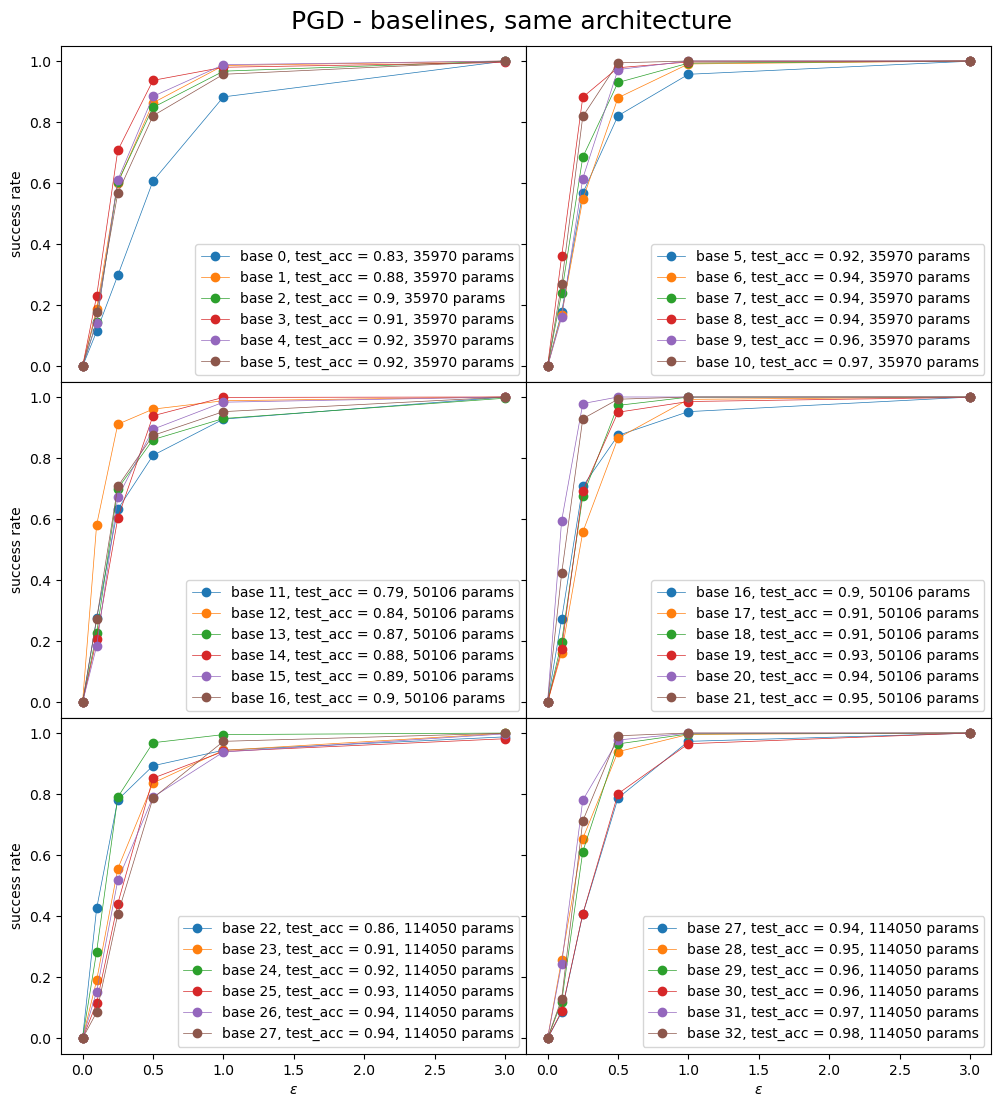

In [135]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize = (12, 12), sharey=True, gridspec_kw={'wspace':0, 'hspace':0})
plt.suptitle('PGD - baselines, same architecture', fontsize=18)
plt.subplots_adjust(top=0.95)

for i in range(6):
    axs[0,0].plot(n_baseline_params['epsilons'][:6], n_baseline_success_rate[i][:6], 'o-', linewidth=0.5, label=f"base {i}, test_acc = {n_baseline_clean_test_accs[i]:.{2}}, {n_baseline_total_params[i]} params")
    
for i in range(5,11):
    axs[0,1].plot(n_baseline_params['epsilons'][:6], n_baseline_success_rate[i][:6], 'o-', linewidth=0.5, label=f"base {i}, test_acc = {n_baseline_clean_test_accs[i]:.{2}}, {n_baseline_total_params[i]} params")
    axs[0,1].set_xlabel('$\epsilon$')
    
for i in range(11,17):
    axs[1,0].plot(n_baseline_params['epsilons'][:6], n_baseline_success_rate[i][:6], 'o-', linewidth=0.5, label=f"base {i}, test_acc = {n_baseline_clean_test_accs[i]:.{2}}, {n_baseline_total_params[i]} params")
    
for i in range(16,22):
    axs[1,1].plot(n_baseline_params['epsilons'][:6], n_baseline_success_rate[i][:6], 'o-', linewidth=0.5, label=f"base {i}, test_acc = {n_baseline_clean_test_accs[i]:.{2}}, {n_baseline_total_params[i]} params")
    
for i in range(22,28):
    axs[2,0].plot(n_baseline_params['epsilons'][:6], n_baseline_success_rate[i][:6], 'o-', linewidth=0.5, label=f"base {i}, test_acc = {n_baseline_clean_test_accs[i]:.{2}}, {n_baseline_total_params[i]} params")
    
for i in range(27,33):
    axs[2,1].plot(n_baseline_params['epsilons'][:6], n_baseline_success_rate[i][:6], 'o-', linewidth=0.5, label=f"base {i}, test_acc = {n_baseline_clean_test_accs[i]:.{2}}, {n_baseline_total_params[i]} params")

for j in range(3):
    axs[j,0].set_ylabel('success rate')
for j in range(2):
    axs[2,j].set_xlabel('$\epsilon$')
    for k in range(3):
        axs[k,j].legend()

# plt.savefig('PGD_bl_same_arch.pdf', bbox_inches="tight")
plt.show()

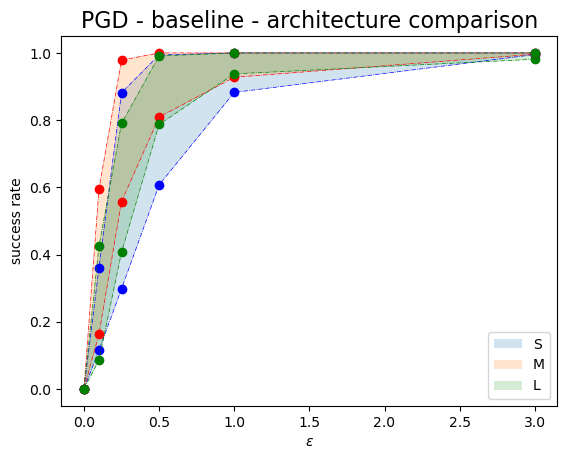

In [136]:
alpha = 0.2
plt.title('PGD - baseline - architecture comparison', fontsize=16)
for i in range(2):
    plt.plot(n_baseline_params['epsilons'][:6], get_min_max(n_baseline_success_rate[0:11])[i][:6], 'o-.', color='b', linewidth=0.5)
    plt.plot(n_baseline_params['epsilons'][:6], get_min_max(n_baseline_success_rate[11:22])[i][:6], 'o-.', color='r', linewidth=0.5)
    plt.plot(n_baseline_params['epsilons'][:6], get_min_max(n_baseline_success_rate[22:33])[i][:6], 'o-.', color='g', linewidth=0.5)

plt.fill_between(n_baseline_params['epsilons'][:6], *get_min_max(torch.stack(n_baseline_success_rate)[0:11,:6]), label=f"S", alpha=alpha)
plt.fill_between(n_baseline_params['epsilons'][:6], *get_min_max(torch.stack(n_baseline_success_rate)[11:22,:6]), label=f"M", alpha=alpha)
plt.fill_between(n_baseline_params['epsilons'][:6], *get_min_max(torch.stack(n_baseline_success_rate)[22:33,:6]), label=f"L", alpha=alpha)

plt.xlabel('$\epsilon$')
plt.ylabel('success rate')
plt.legend()
# plt.savefig('PGD_bl_arch_comp.pdf', bbox_inches="tight")
plt.show()

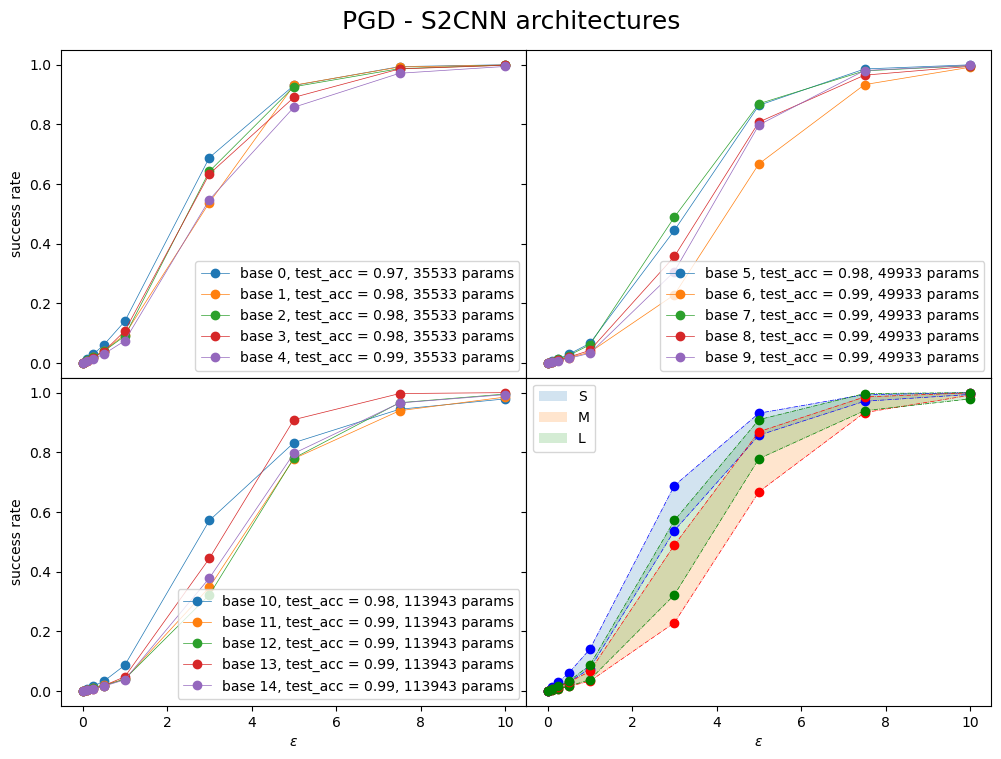

In [158]:
alpha = 0.2
fig, axs = plt.subplots(nrows=2, ncols=2, figsize = (12, 8), sharey=True, gridspec_kw={'wspace':0, 'hspace':0})
plt.suptitle('PGD - S2CNN architectures', fontsize=18)
plt.subplots_adjust(top=0.93)

for i in range(5):
    axs[0,0].plot(n_S2CNN_params['epsilons'], n_S2CNN_success_rate[i], 'o-', linewidth=0.5, label=f"base {i}, test_acc = {n_S2CNN_clean_test_accs[i]:.{2}}, {n_S2CNN_total_params[i]} params")
    
for i in range(5,10):
    axs[0,1].plot(n_S2CNN_params['epsilons'], n_S2CNN_success_rate[i], 'o-', linewidth=0.5, label=f"base {i}, test_acc = {n_S2CNN_clean_test_accs[i]:.{2}}, {n_S2CNN_total_params[i]} params")
    
for i in range(10,15):
    axs[1,0].plot(n_S2CNN_params['epsilons'], n_S2CNN_success_rate[i], 'o-', linewidth=0.5, label=f"base {i}, test_acc = {n_S2CNN_clean_test_accs[i]:.{2}}, {n_S2CNN_total_params[i]} params")
    
for i in range(2):
    axs[1,1].plot(n_S2CNN_params['epsilons'], get_min_max(n_S2CNN_success_rate[0:5])[i], 'o-.', color='b', linewidth=0.5)
    axs[1,1].plot(n_S2CNN_params['epsilons'], get_min_max(n_S2CNN_success_rate[5:10])[i], 'o-.', color='r', linewidth=0.5)
    axs[1,1].plot(n_S2CNN_params['epsilons'], get_min_max(n_S2CNN_success_rate[10:15])[i], 'o-.', color='g', linewidth=0.5)
plt.fill_between(n_S2CNN_params['epsilons'], *get_min_max(n_S2CNN_success_rate[0:5]), label=f"S", alpha=alpha)
plt.fill_between(n_S2CNN_params['epsilons'], *get_min_max(n_S2CNN_success_rate[5:10]), label=f"M", alpha=alpha)
plt.fill_between(n_S2CNN_params['epsilons'], *get_min_max(n_S2CNN_success_rate[10:15]), label=f"L", alpha=alpha)
  
for j in range(2):
    axs[1,j].set_xlabel('$\epsilon$')
    axs[j,0].set_ylabel('success rate')
    for k in range(2):
        axs[k,j].legend()

# plt.savefig('PGD_S2CNN_arch_comp.pdf', bbox_inches="tight")
plt.show()

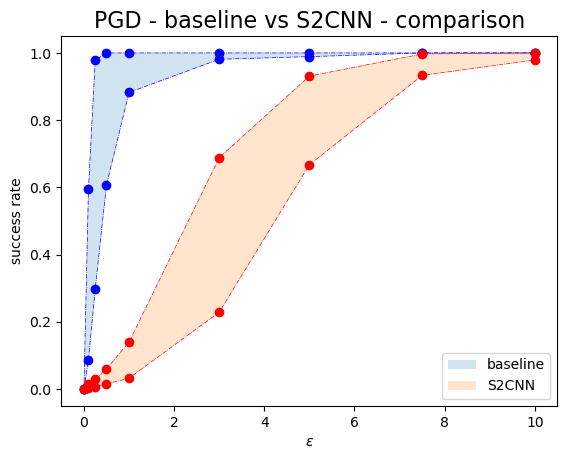

In [179]:
alpha = 0.2
plt.title('PGD - baseline vs S2CNN - comparison', fontsize=16)
for i in range(2):
    plt.plot(n_baseline_params['epsilons'], get_min_max(n_baseline_success_rate)[i], 'o-.', color='b', linewidth=0.5)
    plt.plot(n_S2CNN_params['epsilons'], get_min_max(n_S2CNN_success_rate)[i], 'o-.', color='r', linewidth=0.5)

plt.fill_between(n_baseline_params['epsilons'], *get_min_max(n_baseline_success_rate), label=f"baseline", alpha=alpha)
plt.fill_between(n_S2CNN_params['epsilons'], *get_min_max(n_S2CNN_success_rate), label=f"S2CNN", alpha=alpha)

plt.xlabel('$\epsilon$')
plt.ylabel('success rate')
plt.legend()
# plt.savefig('PGD_bl_vs_S2CNN.pdf', bbox_inches="tight")
plt.show()

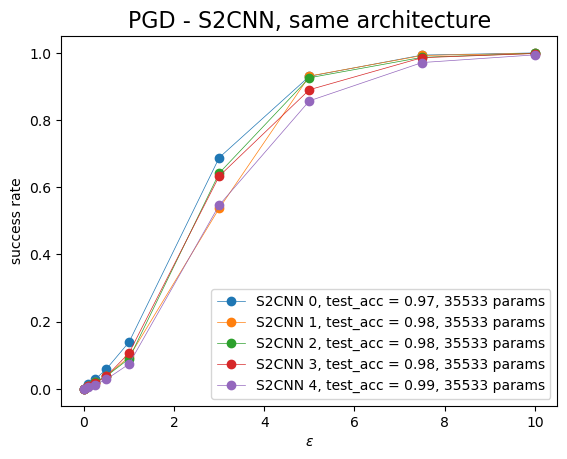

In [8]:
plt.title('PGD - S2CNN, same architecture', fontsize=16)
for i in range(5):
    plt.plot(S2CNN_params['epsilons'], S2CNN_success_rate[i], 'o-', linewidth=0.5, label=f"S2CNN {i}, test_acc = {S2CNN_clean_test_accs[i]:.{2}}, {S2CNN_total_params[i]} params")
plt.xlabel('$\epsilon$')
plt.ylabel('success rate')
plt.legend()
# plt.savefig('PGD_S2CNN_same_arch.pdf', bbox_inches="tight")
plt.show()

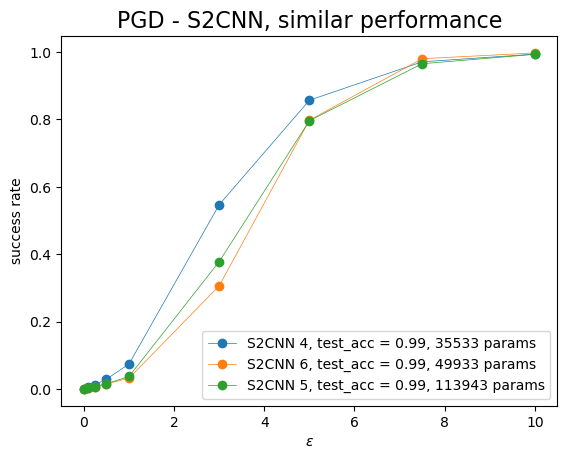

In [9]:
plt.title('PGD - S2CNN, similar performance', fontsize=16)
for i in [4,6,5]:
    plt.plot(S2CNN_params['epsilons'], S2CNN_success_rate[i], 'o-', linewidth=0.5, label=f"S2CNN {i}, test_acc = {S2CNN_clean_test_accs[i]:.{2}}, {S2CNN_total_params[i]} params")
plt.xlabel('$\epsilon$')
plt.ylabel('success rate')
plt.legend()
# plt.savefig('PGD_S2CNN_sim_perf.pdf', bbox_inches="tight")
plt.show()

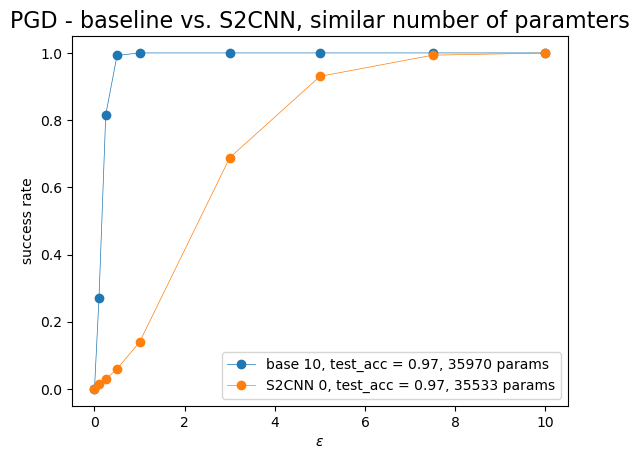

In [10]:
plt.title('PGD - baseline vs. S2CNN, similar number of paramters', fontsize=16)
plt.plot(baseline_params['epsilons'], baseline_success_rate[10], 'o-', linewidth=0.5, label=f"base {10}, test_acc = {baseline_clean_test_accs[10]:.{2}}, {baseline_total_params[10]} params")
plt.plot(S2CNN_params['epsilons'], S2CNN_success_rate[0], 'o-', linewidth=0.5, label=f"S2CNN {0}, test_acc = {S2CNN_clean_test_accs[0]:.{2}}, {S2CNN_total_params[0]} params")
plt.xlabel('$\epsilon$')
plt.ylabel('success rate')
plt.legend()
# plt.savefig('PGD_bl_vs_S2CNN_sim_params.pdf', bbox_inches="tight")
plt.show()

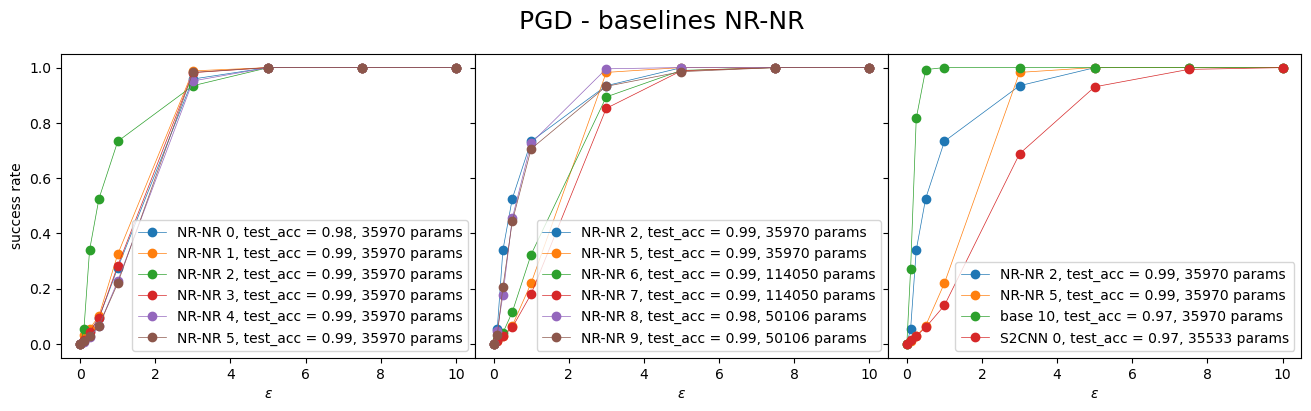

In [32]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize = (16, 4), sharey=True, gridspec_kw={'wspace':0, 'hspace':0})
plt.suptitle('PGD - baselines NR-NR', fontsize=18)
plt.subplots_adjust(top=0.87)

for i in range(6):
    axs[0].plot(NR_NR_params['epsilons'], NR_NR_success_rate[i], 'o-', linewidth=0.5, label=f"NR-NR {i}, test_acc = {NR_NR_clean_test_accs[i]:.{2}}, {NR_NR_total_params[i]} params")
    axs[0].set_xlabel('$\epsilon$')
    axs[0].set_ylabel('success rate')
    
for i in chain([2], range(5,10)):
    axs[1].plot(NR_NR_params['epsilons'], NR_NR_success_rate[i], 'o-', linewidth=0.5, label=f"NR-NR {i}, test_acc = {NR_NR_clean_test_accs[i]:.{2}}, {NR_NR_total_params[i]} params")
    axs[1].set_xlabel('$\epsilon$')
    
for i in [2,5]:
    axs[2].plot(NR_NR_params['epsilons'], NR_NR_success_rate[i], 'o-', linewidth=0.5, label=f"NR-NR {i}, test_acc = {NR_NR_clean_test_accs[i]:.{2}}, {NR_NR_total_params[i]} params")
    axs[2].set_xlabel('$\epsilon$')
for i in [10]:
    axs[2].plot(baseline_params['epsilons'], baseline_success_rate[i], 'o-', linewidth=0.5, label=f"base {i}, test_acc = {baseline_clean_test_accs[i]:.{2}}, {baseline_total_params[i]} params")
    axs[2].set_xlabel('$\epsilon$')
for i in [0]:
    axs[2].plot(S2CNN_params['epsilons'], S2CNN_success_rate[i], 'o-', linewidth=0.5, label=f"S2CNN {i}, test_acc = {S2CNN_clean_test_accs[i]:.{2}}, {S2CNN_total_params[i]} params")
    axs[2].set_xlabel('$\epsilon$')

for j in range(3):
    axs[j].legend()

# plt.savefig('PGD_bl_NR_NR.pdf', bbox_inches="tight")
plt.show()

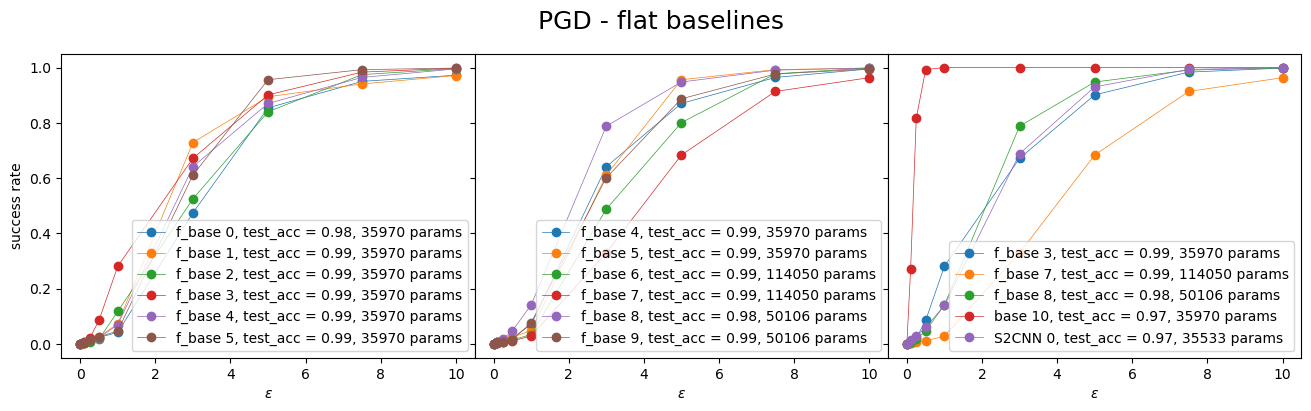

In [33]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize = (16, 4), sharey=True, gridspec_kw={'wspace':0, 'hspace':0})
plt.suptitle('PGD - flat baselines', fontsize=18)
plt.subplots_adjust(top=0.87)

for i in range(6):
    axs[0].plot(flat_baseline_params['epsilons'], flat_baseline_success_rate[i], 'o-', linewidth=0.5, label=f"f_base {i}, test_acc = {flat_baseline_clean_test_accs[i]:.{2}}, {flat_baseline_total_params[i]} params")
    axs[0].set_xlabel('$\epsilon$')
    axs[0].set_ylabel('success rate')
    
for i in range(4,10):
    axs[1].plot(flat_baseline_params['epsilons'], flat_baseline_success_rate[i], 'o-', linewidth=0.5, label=f"f_base {i}, test_acc = {flat_baseline_clean_test_accs[i]:.{2}}, {flat_baseline_total_params[i]} params")
    axs[1].set_xlabel('$\epsilon$')
    
    
for i in [3,7,8]:
    axs[2].plot(flat_baseline_params['epsilons'], flat_baseline_success_rate[i], 'o-', linewidth=0.5, label=f"f_base {i}, test_acc = {flat_baseline_clean_test_accs[i]:.{2}}, {flat_baseline_total_params[i]} params")
    axs[2].set_xlabel('$\epsilon$')
for i in [10]:
    axs[2].plot(baseline_params['epsilons'], baseline_success_rate[i], 'o-', linewidth=0.5, label=f"base {i}, test_acc = {baseline_clean_test_accs[i]:.{2}}, {baseline_total_params[i]} params")
    axs[2].set_xlabel('$\epsilon$')
for i in [0]:
    axs[2].plot(S2CNN_params['epsilons'], S2CNN_success_rate[i], 'o-', linewidth=0.5, label=f"S2CNN {i}, test_acc = {S2CNN_clean_test_accs[i]:.{2}}, {S2CNN_total_params[i]} params")
    axs[2].set_xlabel('$\epsilon$')

for j in range(3):
    axs[j].legend()

# plt.savefig('PGD_flat_bl.pdf', bbox_inches="tight")
plt.show()

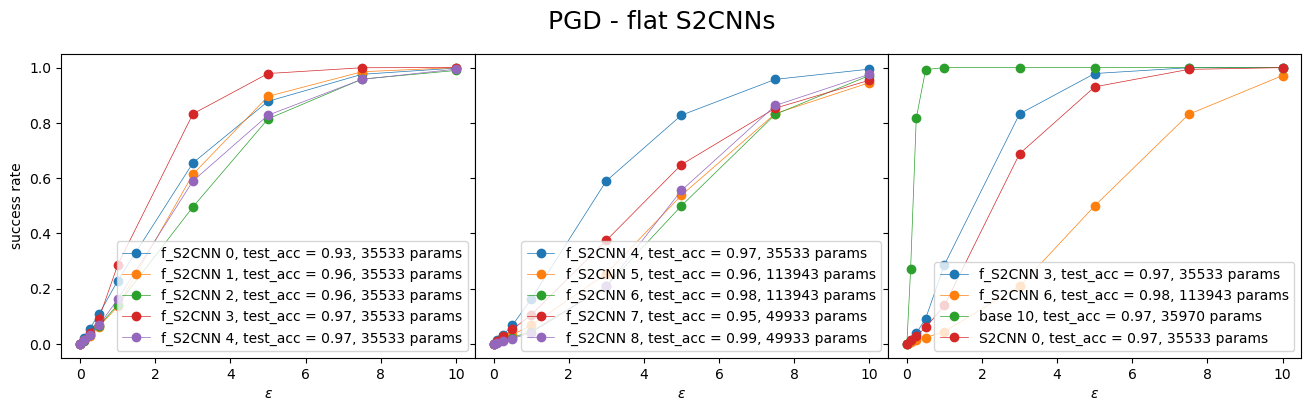

In [34]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize = (16, 4), sharey=True, gridspec_kw={'wspace':0, 'hspace':0})
plt.suptitle('PGD - flat S2CNNs', fontsize=18)
plt.subplots_adjust(top=0.87)

for i in range(5):
    axs[0].plot(flat_S2CNN_params['epsilons'], flat_S2CNN_success_rate[i], 'o-', linewidth=0.5, label=f"f_S2CNN {i}, test_acc = {flat_S2CNN_clean_test_accs[i]:.{2}}, {flat_S2CNN_total_params[i]} params")
    axs[0].set_xlabel('$\epsilon$')
    axs[0].set_ylabel('success rate')
    
for i in range(4,9):
    axs[1].plot(flat_S2CNN_params['epsilons'], flat_S2CNN_success_rate[i], 'o-', linewidth=0.5, label=f"f_S2CNN {i}, test_acc = {flat_S2CNN_clean_test_accs[i]:.{2}}, {flat_S2CNN_total_params[i]} params")
    axs[1].set_xlabel('$\epsilon$')
    
    
for i in [3,6]:
    axs[2].plot(flat_S2CNN_params['epsilons'], flat_S2CNN_success_rate[i], 'o-', linewidth=0.5, label=f"f_S2CNN {i}, test_acc = {flat_S2CNN_clean_test_accs[i]:.{2}}, {flat_S2CNN_total_params[i]} params")
    axs[2].set_xlabel('$\epsilon$')
for i in [10]:
    axs[2].plot(baseline_params['epsilons'], baseline_success_rate[i], 'o-', linewidth=0.5, label=f"base {i}, test_acc = {baseline_clean_test_accs[i]:.{2}}, {baseline_total_params[i]} params")
    axs[2].set_xlabel('$\epsilon$')
for i in [0]:
    axs[2].plot(S2CNN_params['epsilons'], S2CNN_success_rate[i], 'o-', linewidth=0.5, label=f"S2CNN {i}, test_acc = {S2CNN_clean_test_accs[i]:.{2}}, {S2CNN_total_params[i]} params")
    axs[2].set_xlabel('$\epsilon$')

for j in range(3):
    axs[j].legend(loc='lower right')

# plt.savefig('PGD_flat_S2CNN.pdf', bbox_inches="tight")
plt.show()

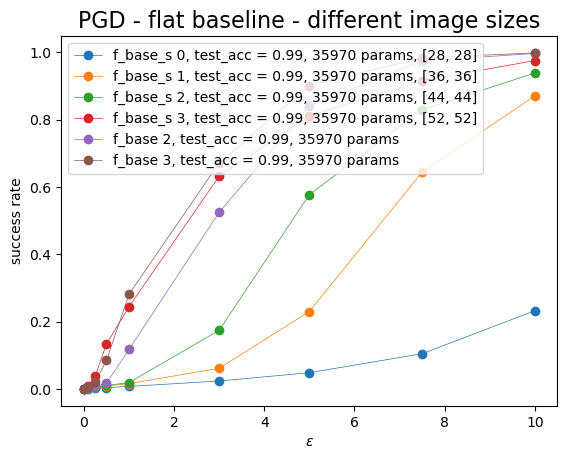

In [25]:
image_sizes = [eval(df[df['tags.mlflow.runName']==str(n)]['params.padded_img_size'].values[0]) for n in flat_baseline_different_img_sizes_run_names]

plt.title('PGD - flat baseline - different image sizes', fontsize=16)
for i in range(4):
    plt.plot(flat_baseline_different_img_sizes_params['epsilons'], flat_baseline_different_img_sizes_success_rate[i], 'o-', linewidth=0.5, label=f"f_base_s {i}, test_acc = {flat_baseline_different_img_sizes_clean_test_accs[i]:.{2}}, {flat_baseline_different_img_sizes_total_params[i]} params, {image_sizes[i]}")
for i in [2,3]:
    plt.plot(flat_baseline_params['epsilons'], flat_baseline_success_rate[i], 'o-', linewidth=0.5, label=f"f_base {i}, test_acc = {flat_baseline_clean_test_accs[i]:.{2}}, {flat_baseline_total_params[i]} params")
plt.xlabel('$\epsilon$')
plt.ylabel('success rate')
plt.legend(loc='upper left')
# plt.savefig('PGD_flat_bl_different_img_sizes.pdf', bbox_inches="tight")
plt.show()

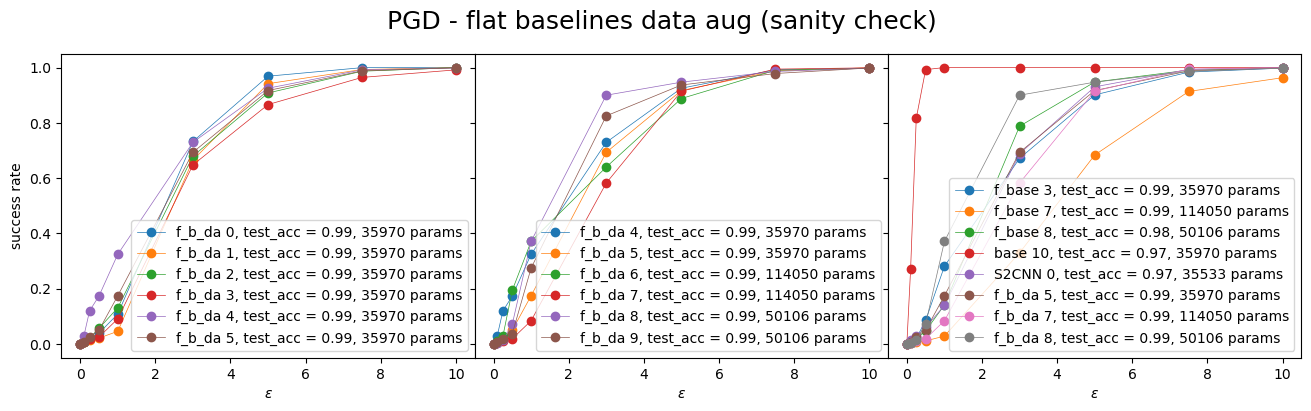

In [31]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize = (16, 4), sharey=True, gridspec_kw={'wspace':0, 'hspace':0})
plt.suptitle('PGD - flat baselines data aug (sanity check)', fontsize=18)
plt.subplots_adjust(top=0.87)

for i in range(6):
    axs[0].plot(flat_baseline_data_aug_params['epsilons'], flat_baseline_data_aug_success_rate[i], 'o-', linewidth=0.5, label=f"f_b_da {i}, test_acc = {flat_baseline_data_aug_clean_test_accs[i]:.{2}}, {flat_baseline_data_aug_total_params[i]} params")
    axs[0].set_xlabel('$\epsilon$')
    axs[0].set_ylabel('success rate')
    
for i in range(4,10):
    axs[1].plot(flat_baseline_data_aug_params['epsilons'], flat_baseline_data_aug_success_rate[i], 'o-', linewidth=0.5, label=f"f_b_da {i}, test_acc = {flat_baseline_data_aug_clean_test_accs[i]:.{2}}, {flat_baseline_data_aug_total_params[i]} params")
    axs[1].set_xlabel('$\epsilon$')
    
    
for i in [3,7,8]:
    axs[2].plot(flat_baseline_params['epsilons'], flat_baseline_success_rate[i], 'o-', linewidth=0.5, label=f"f_base {i}, test_acc = {flat_baseline_clean_test_accs[i]:.{2}}, {flat_baseline_total_params[i]} params")
    axs[2].set_xlabel('$\epsilon$')
for i in [10]:
    axs[2].plot(baseline_params['epsilons'], baseline_success_rate[i], 'o-', linewidth=0.5, label=f"base {i}, test_acc = {baseline_clean_test_accs[i]:.{2}}, {baseline_total_params[i]} params")
    axs[2].set_xlabel('$\epsilon$')
for i in [0]:
    axs[2].plot(S2CNN_params['epsilons'], S2CNN_success_rate[i], 'o-', linewidth=0.5, label=f"S2CNN {i}, test_acc = {S2CNN_clean_test_accs[i]:.{2}}, {S2CNN_total_params[i]} params")
    axs[2].set_xlabel('$\epsilon$')
for i in [5,7,8]:
    axs[2].plot(flat_baseline_data_aug_params['epsilons'], flat_baseline_data_aug_success_rate[i], 'o-', linewidth=0.5, label=f"f_b_da {i}, test_acc = {flat_baseline_data_aug_clean_test_accs[i]:.{2}}, {flat_baseline_data_aug_total_params[i]} params")
    axs[2].set_xlabel('$\epsilon$')

for j in range(3):
    axs[j].legend()

# plt.savefig('PGD_flat_bl_da.pdf', bbox_inches="tight")
plt.show()

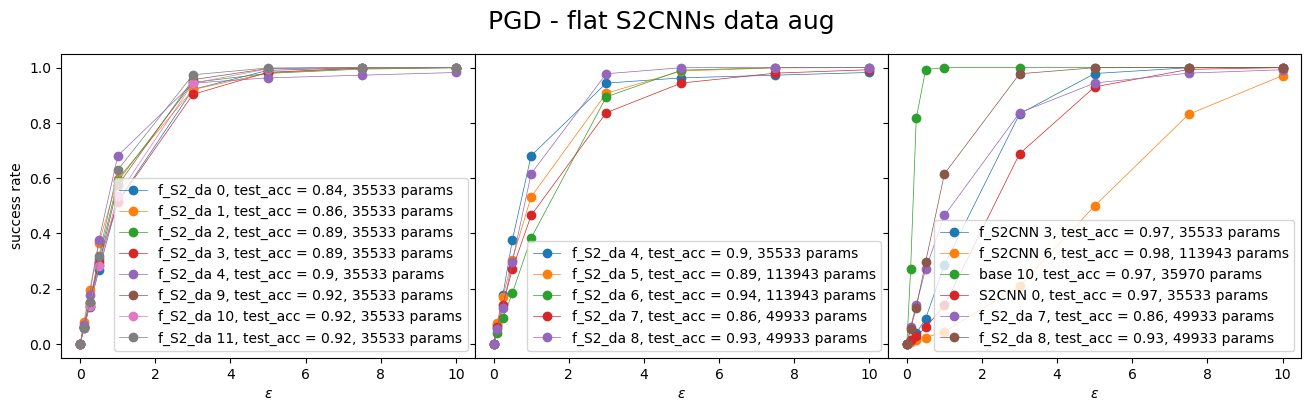

In [67]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize = (16, 4), sharey=True, gridspec_kw={'wspace':0, 'hspace':0})
plt.suptitle('PGD - flat S2CNNs data aug', fontsize=18)
plt.subplots_adjust(top=0.87)

for i in chain(range(5), range(9,12)):
    axs[0].plot(flat_S2CNN_data_aug_params['epsilons'], flat_S2CNN_data_aug_success_rate[i], 'o-', linewidth=0.5, label=f"f_S2_da {i}, test_acc = {flat_S2CNN_data_aug_clean_test_accs[i]:.{2}}, {flat_S2CNN_data_aug_total_params[i]} params")
    axs[0].set_xlabel('$\epsilon$')
    axs[0].set_ylabel('success rate')
    
for i in range(4,9):
    axs[1].plot(flat_S2CNN_data_aug_params['epsilons'], flat_S2CNN_data_aug_success_rate[i], 'o-', linewidth=0.5, label=f"f_S2_da {i}, test_acc = {flat_S2CNN_data_aug_clean_test_accs[i]:.{2}}, {flat_S2CNN_data_aug_total_params[i]} params")
    axs[1].set_xlabel('$\epsilon$')
    
    
for i in [3,6]:
    axs[2].plot(flat_S2CNN_params['epsilons'], flat_S2CNN_success_rate[i], 'o-', linewidth=0.5, label=f"f_S2CNN {i}, test_acc = {flat_S2CNN_clean_test_accs[i]:.{2}}, {flat_S2CNN_total_params[i]} params")
    axs[2].set_xlabel('$\epsilon$')
for i in [10]:
    axs[2].plot(baseline_params['epsilons'], baseline_success_rate[i], 'o-', linewidth=0.5, label=f"base {i}, test_acc = {baseline_clean_test_accs[i]:.{2}}, {baseline_total_params[i]} params")
    axs[2].set_xlabel('$\epsilon$')
for i in [0]:
    axs[2].plot(S2CNN_params['epsilons'], S2CNN_success_rate[i], 'o-', linewidth=0.5, label=f"S2CNN {i}, test_acc = {S2CNN_clean_test_accs[i]:.{2}}, {S2CNN_total_params[i]} params")
    axs[2].set_xlabel('$\epsilon$')
for i in [7,8]:
    axs[2].plot(flat_S2CNN_data_aug_params['epsilons'], flat_S2CNN_data_aug_success_rate[i], 'o-', linewidth=0.5, label=f"f_S2_da {i}, test_acc = {flat_S2CNN_data_aug_clean_test_accs[i]:.{2}}, {flat_S2CNN_data_aug_total_params[i]} params")
    axs[2].set_xlabel('$\epsilon$')

for j in range(3):
    axs[j].legend(loc='lower right')

# plt.savefig('PGD_flat_S2CNN_da.pdf', bbox_inches="tight")
plt.show()

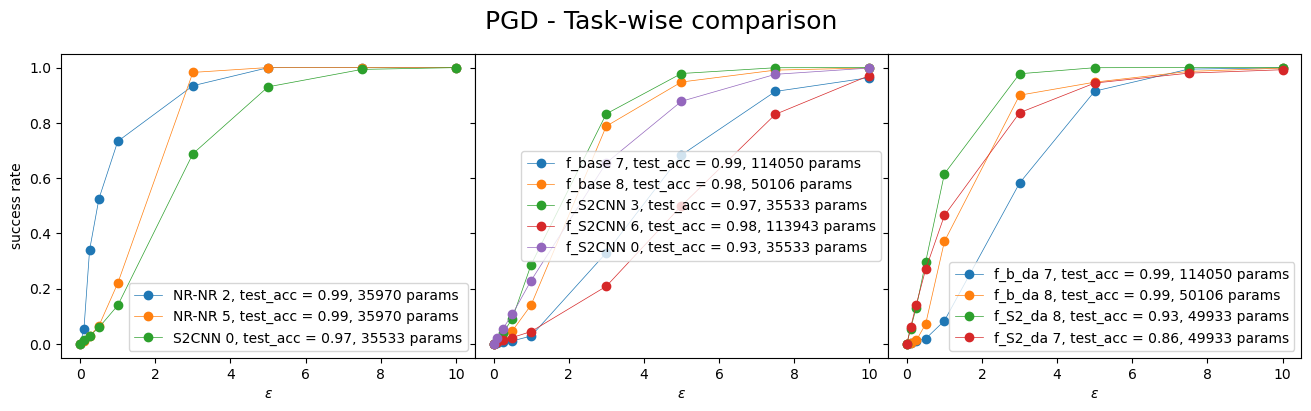

In [53]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize = (16, 4), sharey=True, gridspec_kw={'wspace':0, 'hspace':0})
plt.suptitle('PGD - Task-wise comparison', fontsize=18)
plt.subplots_adjust(top=0.87)
for i in [2,5]:
    axs[0].plot(NR_NR_params['epsilons'], NR_NR_success_rate[i], 'o-', linewidth=0.5, label=f"NR-NR {i}, test_acc = {NR_NR_clean_test_accs[i]:.{2}}, {NR_NR_total_params[i]} params")
    axs[0].set_xlabel('$\epsilon$')

for i in [0]:
    axs[0].plot(S2CNN_params['epsilons'], S2CNN_success_rate[i], 'o-', linewidth=0.5, label=f"S2CNN {i}, test_acc = {S2CNN_clean_test_accs[i]:.{2}}, {S2CNN_total_params[i]} params")
    axs[0].set_xlabel('$\epsilon$')
    
for i in [7,8]:
    axs[1].plot(flat_baseline_params['epsilons'], flat_baseline_success_rate[i], 'o-', linewidth=0.5, label=f"f_base {i}, test_acc = {flat_baseline_clean_test_accs[i]:.{2}}, {flat_baseline_total_params[i]} params")

for i in [3,6,0]:
    axs[1].plot(flat_S2CNN_params['epsilons'], flat_S2CNN_success_rate[i], 'o-', linewidth=0.5, label=f"f_S2CNN {i}, test_acc = {flat_S2CNN_clean_test_accs[i]:.{2}}, {flat_S2CNN_total_params[i]} params")
    
for i in [7,8]:
    axs[2].plot(flat_baseline_data_aug_params['epsilons'], flat_baseline_data_aug_success_rate[i], 'o-', linewidth=0.5, label=f"f_b_da {i}, test_acc = {flat_baseline_data_aug_clean_test_accs[i]:.{2}}, {flat_baseline_data_aug_total_params[i]} params")

for i in [8,7]:
    axs[2].plot(flat_S2CNN_data_aug_params['epsilons'], flat_S2CNN_data_aug_success_rate[i], 'o-', linewidth=0.5, label=f"f_S2_da {i}, test_acc = {flat_S2CNN_data_aug_clean_test_accs[i]:.{2}}, {flat_S2CNN_data_aug_total_params[i]} params")

axs[0].set_xlabel('$\epsilon$')
axs[0].set_ylabel('success rate')
axs[1].set_xlabel('$\epsilon$')
axs[2].set_xlabel('$\epsilon$')
    
for j in range(3):
    axs[j].legend()

# plt.savefig('PGD_task-wise_comparison.pdf', bbox_inches="tight")
plt.show()

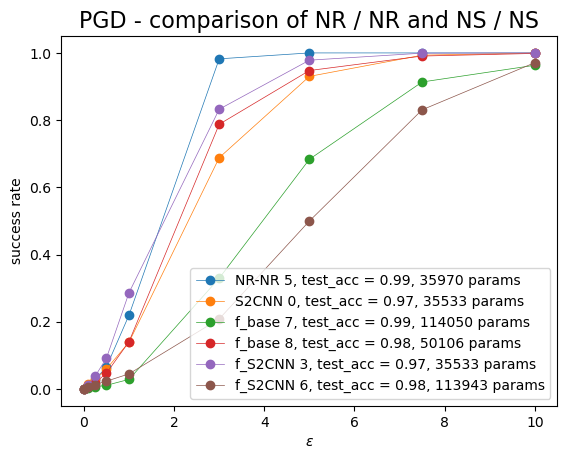

In [54]:
plt.title('PGD - comparison of NR / NR and NS / NS', fontsize=16)

for i in [5]:
    plt.plot(NR_NR_params['epsilons'], NR_NR_success_rate[i], 'o-', linewidth=0.5, label=f"NR-NR {i}, test_acc = {NR_NR_clean_test_accs[i]:.{2}}, {NR_NR_total_params[i]} params")

for i in [0]:
    plt.plot(S2CNN_params['epsilons'], S2CNN_success_rate[i], 'o-', linewidth=0.5, label=f"S2CNN {i}, test_acc = {S2CNN_clean_test_accs[i]:.{2}}, {S2CNN_total_params[i]} params")
    
for i in [7,8]:
    plt.plot(flat_baseline_params['epsilons'], flat_baseline_success_rate[i], 'o-', linewidth=0.5, label=f"f_base {i}, test_acc = {flat_baseline_clean_test_accs[i]:.{2}}, {flat_baseline_total_params[i]} params")

for i in [3,6]:
    plt.plot(flat_S2CNN_params['epsilons'], flat_S2CNN_success_rate[i], 'o-', linewidth=0.5, label=f"f_S2CNN {i}, test_acc = {flat_S2CNN_clean_test_accs[i]:.{2}}, {flat_S2CNN_total_params[i]} params")

plt.xlabel('$\epsilon$')
plt.ylabel('success rate')
plt.legend()
# plt.savefig('PGD_NR_NR_and_NS_NS.pdf', bbox_inches="tight")
plt.show()

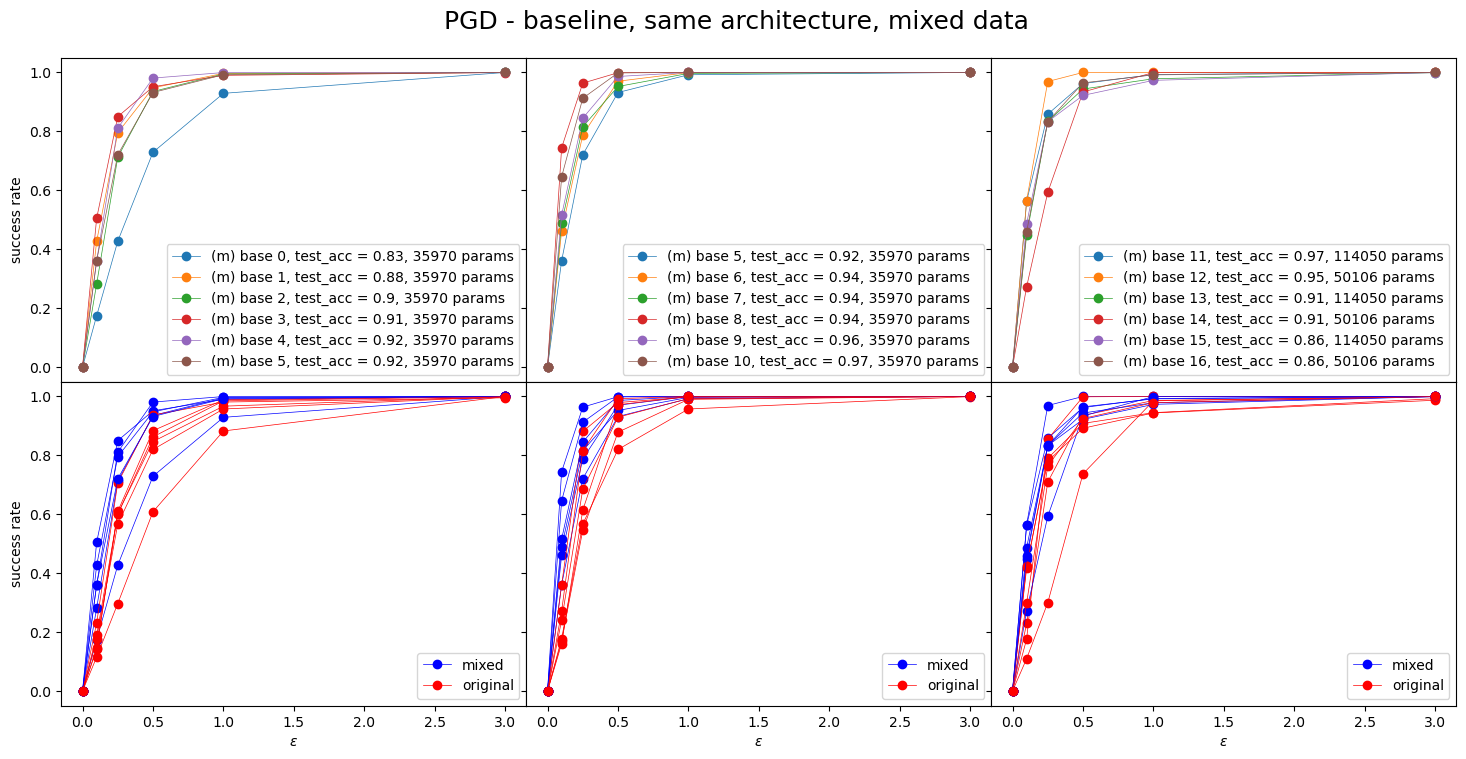

In [128]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize = (18, 8), sharey=True, sharex=True, gridspec_kw={'wspace':0, 'hspace':0})
plt.suptitle('PGD - baseline, same architecture, mixed data', fontsize=18)
plt.subplots_adjust(top=0.92)

for i in range(6):
    axs[0,0].plot(mixed_baseline_params['epsilons'][:6], mixed_baseline_success_rate[i][:6], 'o-', linewidth=0.5, label=f"(m) base {i}, test_acc = {mixed_baseline_clean_test_accs[i]:.{2}}, {mixed_baseline_total_params[i]} params")
axs[0,0].set_ylabel('success rate')

for i in range(5):
    axs[1,0].plot(mixed_baseline_params['epsilons'][:6], mixed_baseline_success_rate[i][:6], 'o-', linewidth=0.5, color='b')
    axs[1,0].plot(baseline_params['epsilons'][:6], baseline_success_rate[i][:6], 'o-', linewidth=0.5, color='r')
for i in [5]:
    axs[1,0].plot(mixed_baseline_params['epsilons'][:6], mixed_baseline_success_rate[i][:6], 'o-', linewidth=0.5, color='b', label="mixed")
    axs[1,0].plot(baseline_params['epsilons'][:6], baseline_success_rate[i][:6], 'o-', linewidth=0.5, color='r', label="original")
    
axs[1,0].set_xlabel('$\epsilon$')
axs[1,0].set_ylabel('success rate')
    
for i in range(5,11):
    axs[0,1].plot(mixed_baseline_params['epsilons'][:6], mixed_baseline_success_rate[i][:6], 'o-', linewidth=0.5, label=f"(m) base {i}, test_acc = {mixed_baseline_clean_test_accs[i]:.{2}}, {mixed_baseline_total_params[i]} params")
    
for i in range(5,10):
    axs[1,1].plot(mixed_baseline_params['epsilons'][:6], mixed_baseline_success_rate[i][:6], 'o-', linewidth=0.5, color='b')
    axs[1,1].plot(baseline_params['epsilons'][:6], baseline_success_rate[i][:6], 'o-', linewidth=0.5, color='r')
    
for i in [10]:
    axs[1,1].plot(mixed_baseline_params['epsilons'][:6], mixed_baseline_success_rate[i][:6], 'o-', linewidth=0.5, color='b', label="mixed")
    axs[1,1].plot(baseline_params['epsilons'][:6], baseline_success_rate[i][:6], 'o-', linewidth=0.5, color='r', label="original")
    
axs[1,1].set_xlabel('$\epsilon$')

for i in range(11, 17):
    axs[0,2].plot(mixed_baseline_params['epsilons'][:6], mixed_baseline_success_rate[i][:6], 'o-', linewidth=0.5, label=f"(m) base {i}, test_acc = {mixed_baseline_clean_test_accs[i]:.{2}}, {mixed_baseline_total_params[i]} params")
    
for i in range(11, 16):
    axs[1,2].plot(mixed_baseline_params['epsilons'][:6], mixed_baseline_success_rate[i][:6], 'o-', linewidth=0.5, color='b')
    axs[1,2].plot(baseline_params['epsilons'][:6], baseline_success_rate[i][:6], 'o-', linewidth=0.5, color='r')
    
for i in [16]:
    axs[1,2].plot(mixed_baseline_params['epsilons'][:6], mixed_baseline_success_rate[i][:6], 'o-', linewidth=0.5, color='b', label="mixed")
    axs[1,2].plot(baseline_params['epsilons'][:6], baseline_success_rate[i][:6], 'o-', linewidth=0.5, color='r', label="original")

    
axs[1,2].set_xlabel('$\epsilon$')
    
for j in range(2):
    for k in range(3):
        axs[j,k].legend()

# plt.savefig('PGD_mixed_data_baseline.pdf', bbox_inches="tight")
plt.show()

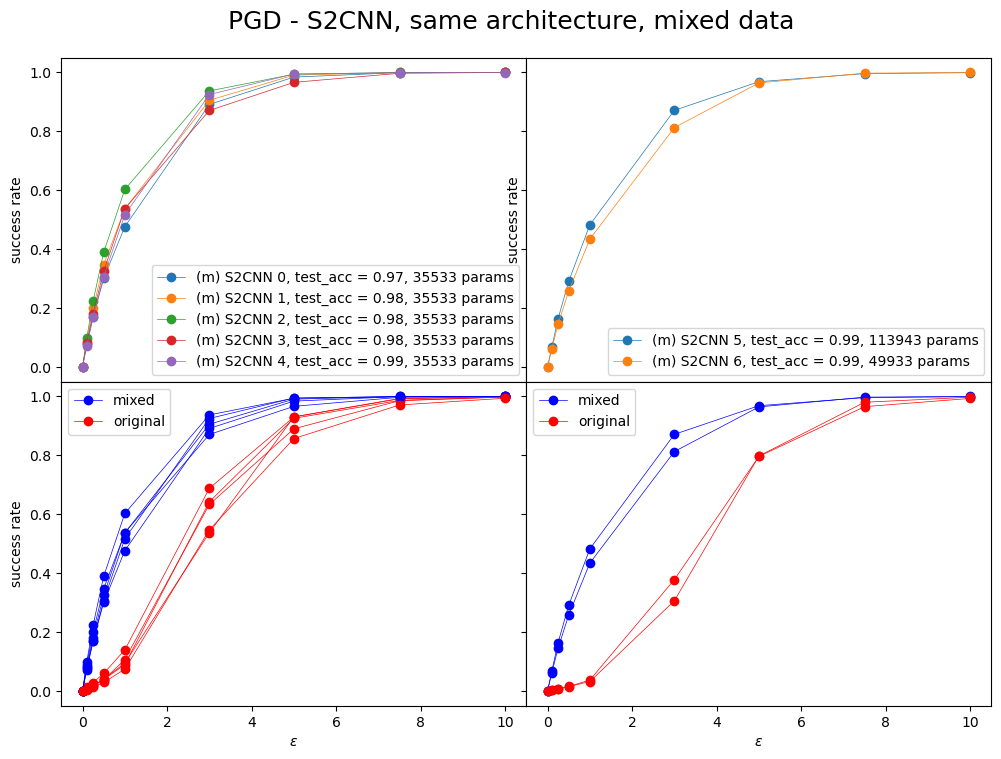

In [129]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize = (12, 8), sharey=True, sharex=True, gridspec_kw={'wspace':0, 'hspace':0})
plt.suptitle('PGD - S2CNN, same architecture, mixed data', fontsize=18)
plt.subplots_adjust(top=0.92)

for i in range(5):
    axs[0,0].plot(mixed_S2CNN_params['epsilons'], mixed_S2CNN_success_rate[i], 'o-', linewidth=0.5, label=f"(m) S2CNN {i}, test_acc = {mixed_S2CNN_clean_test_accs[i]:.{2}}, {mixed_S2CNN_total_params[i]} params")
axs[0,0].set_ylabel('success rate')

for i in range(4):
    axs[1,0].plot(mixed_S2CNN_params['epsilons'], mixed_S2CNN_success_rate[i], 'o-', linewidth=0.5, color='b')
    axs[1,0].plot(S2CNN_params['epsilons'], S2CNN_success_rate[i], 'o-', linewidth=0.5, color='r')
    
for i in [4]:
    axs[1,0].plot(mixed_S2CNN_params['epsilons'], mixed_S2CNN_success_rate[i], 'o-', linewidth=0.5, color='b', label="mixed")
    axs[1,0].plot(S2CNN_params['epsilons'], S2CNN_success_rate[i], 'o-', linewidth=0.5, color='r', label="original")


axs[1,0].set_xlabel('$\epsilon$')
axs[1,0].set_ylabel('success rate')


for i in range(5,7):
    axs[0,1].plot(mixed_S2CNN_params['epsilons'], mixed_S2CNN_success_rate[i], 'o-', linewidth=0.5, label=f"(m) S2CNN {i}, test_acc = {mixed_S2CNN_clean_test_accs[i]:.{2}}, {mixed_S2CNN_total_params[i]} params")
axs[0,1].set_ylabel('success rate')

for i in range(5,6):
    axs[1,1].plot(mixed_S2CNN_params['epsilons'], mixed_S2CNN_success_rate[i], 'o-', linewidth=0.5, color='b')
    axs[1,1].plot(S2CNN_params['epsilons'], S2CNN_success_rate[i], 'o-', linewidth=0.5, color='r')
    
for i in [6]:
    axs[1,1].plot(mixed_S2CNN_params['epsilons'], mixed_S2CNN_success_rate[i], 'o-', linewidth=0.5, color='b', label="mixed")
    axs[1,1].plot(S2CNN_params['epsilons'], S2CNN_success_rate[i], 'o-', linewidth=0.5, color='r', label="original")


axs[1,1].set_xlabel('$\epsilon$')

for j in range(2):
    for k in range(2):
        axs[j,k].legend()

# plt.savefig('PGD_mixed_data_S2CNN.pdf', bbox_inches="tight")
plt.show()

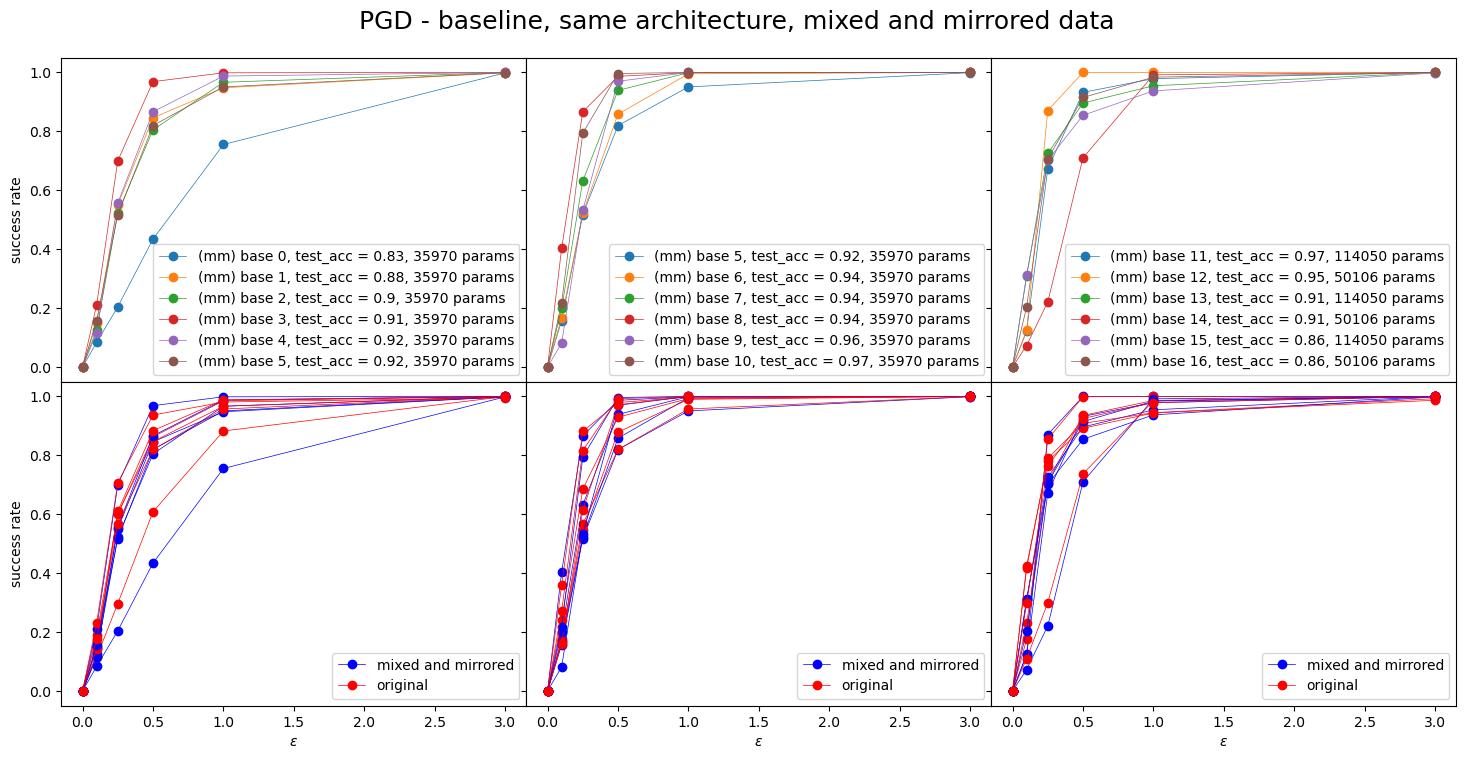

In [11]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize = (18, 8), sharey=True, sharex=True, gridspec_kw={'wspace':0, 'hspace':0})
plt.suptitle('PGD - baseline, same architecture, mixed and mirrored data', fontsize=18)
plt.subplots_adjust(top=0.92)

for i in range(6):
    axs[0,0].plot(mixed_mirrored_baseline_params['epsilons'][:6], mixed_mirrored_baseline_success_rate[i][:6], 'o-', linewidth=0.5, label=f"(mm) base {i}, test_acc = {mixed_mirrored_baseline_clean_test_accs[i]:.{2}}, {mixed_mirrored_baseline_total_params[i]} params")
axs[0,0].set_ylabel('success rate')

for i in range(5):
    axs[1,0].plot(mixed_mirrored_baseline_params['epsilons'][:6], mixed_mirrored_baseline_success_rate[i][:6], 'o-', linewidth=0.5, color='b')
    axs[1,0].plot(baseline_params['epsilons'][:6], baseline_success_rate[i][:6], 'o-', linewidth=0.5, color='r')
for i in [5]:
    axs[1,0].plot(mixed_mirrored_baseline_params['epsilons'][:6], mixed_mirrored_baseline_success_rate[i][:6], 'o-', linewidth=0.5, color='b', label="mixed and mirrored")
    axs[1,0].plot(baseline_params['epsilons'][:6], baseline_success_rate[i][:6], 'o-', linewidth=0.5, color='r', label="original")
    
axs[1,0].set_xlabel('$\epsilon$')
axs[1,0].set_ylabel('success rate')
    
for i in range(5,11):
    axs[0,1].plot(mixed_mirrored_baseline_params['epsilons'][:6], mixed_mirrored_baseline_success_rate[i][:6], 'o-', linewidth=0.5, label=f"(mm) base {i}, test_acc = {mixed_mirrored_baseline_clean_test_accs[i]:.{2}}, {mixed_mirrored_baseline_total_params[i]} params")
    
for i in range(5,10):
    axs[1,1].plot(mixed_mirrored_baseline_params['epsilons'][:6], mixed_mirrored_baseline_success_rate[i][:6], 'o-', linewidth=0.5, color='b')
    axs[1,1].plot(baseline_params['epsilons'][:6], baseline_success_rate[i][:6], 'o-', linewidth=0.5, color='r')
    
for i in [10]:
    axs[1,1].plot(mixed_mirrored_baseline_params['epsilons'][:6], mixed_mirrored_baseline_success_rate[i][:6], 'o-', linewidth=0.5, color='b', label="mixed and mirrored")
    axs[1,1].plot(baseline_params['epsilons'][:6], baseline_success_rate[i][:6], 'o-', linewidth=0.5, color='r', label="original")
    
axs[1,1].set_xlabel('$\epsilon$')

for i in range(11, 17):
    axs[0,2].plot(mixed_mirrored_baseline_params['epsilons'][:6], mixed_mirrored_baseline_success_rate[i][:6], 'o-', linewidth=0.5, label=f"(mm) base {i}, test_acc = {mixed_mirrored_baseline_clean_test_accs[i]:.{2}}, {mixed_mirrored_baseline_total_params[i]} params")
    
for i in range(11, 16):
    axs[1,2].plot(mixed_mirrored_baseline_params['epsilons'][:6], mixed_mirrored_baseline_success_rate[i][:6], 'o-', linewidth=0.5, color='b')
    axs[1,2].plot(baseline_params['epsilons'][:6], baseline_success_rate[i][:6], 'o-', linewidth=0.5, color='r')
    
for i in [16]:
    axs[1,2].plot(mixed_mirrored_baseline_params['epsilons'][:6], mixed_mirrored_baseline_success_rate[i][:6], 'o-', linewidth=0.5, color='b', label="mixed and mirrored")
    axs[1,2].plot(baseline_params['epsilons'][:6], baseline_success_rate[i][:6], 'o-', linewidth=0.5, color='r', label="original")

    
axs[1,2].set_xlabel('$\epsilon$')
    
for j in range(2):
    for k in range(3):
        axs[j,k].legend()

# plt.savefig('PGD_mixed_mirrored_data_baseline.pdf', bbox_inches="tight")
plt.show()

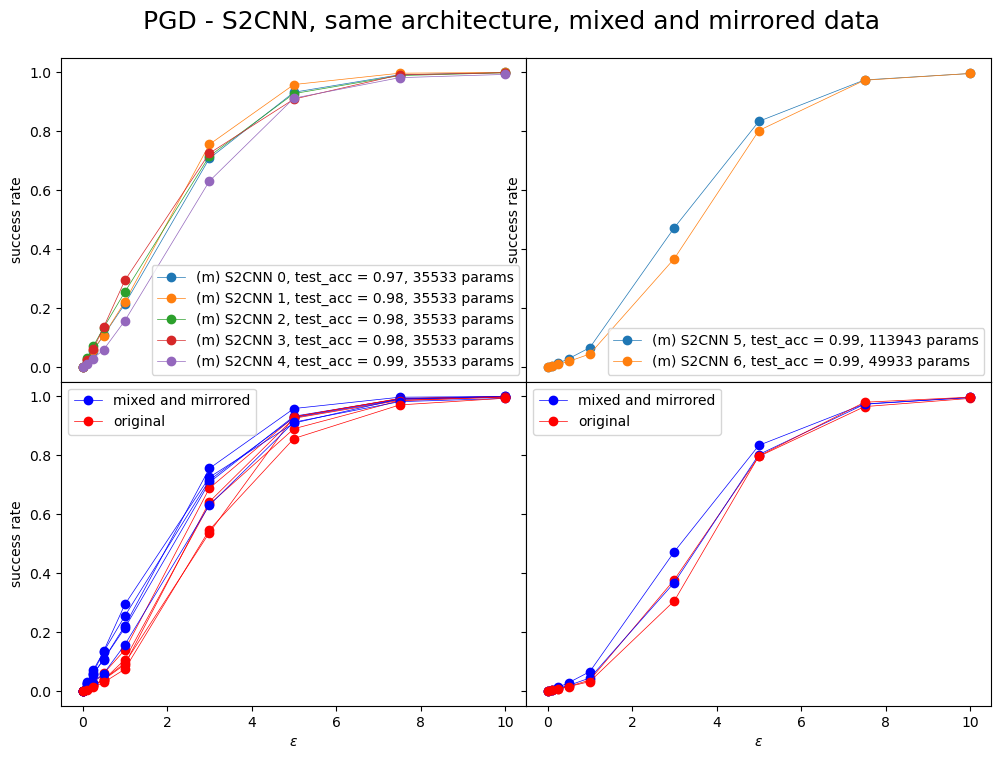

In [6]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize = (12, 8), sharey=True, sharex=True, gridspec_kw={'wspace':0, 'hspace':0})
plt.suptitle('PGD - S2CNN, same architecture, mixed and mirrored data', fontsize=18)
plt.subplots_adjust(top=0.92)

for i in range(5):
    axs[0,0].plot(mixed_mirrored_S2CNN_params['epsilons'], mixed_mirrored_S2CNN_success_rate[i], 'o-', linewidth=0.5, label=f"(m) S2CNN {i}, test_acc = {mixed_mirrored_S2CNN_clean_test_accs[i]:.{2}}, {mixed_mirrored_S2CNN_total_params[i]} params")
axs[0,0].set_ylabel('success rate')

for i in range(4):
    axs[1,0].plot(mixed_mirrored_S2CNN_params['epsilons'], mixed_mirrored_S2CNN_success_rate[i], 'o-', linewidth=0.5, color='b')
    axs[1,0].plot(S2CNN_params['epsilons'], S2CNN_success_rate[i], 'o-', linewidth=0.5, color='r')
    
for i in [4]:
    axs[1,0].plot(mixed_mirrored_S2CNN_params['epsilons'], mixed_mirrored_S2CNN_success_rate[i], 'o-', linewidth=0.5, color='b', label="mixed and mirrored")
    axs[1,0].plot(S2CNN_params['epsilons'], S2CNN_success_rate[i], 'o-', linewidth=0.5, color='r', label="original")


axs[1,0].set_xlabel('$\epsilon$')
axs[1,0].set_ylabel('success rate')


for i in range(5,7):
    axs[0,1].plot(mixed_mirrored_S2CNN_params['epsilons'], mixed_mirrored_S2CNN_success_rate[i], 'o-', linewidth=0.5, label=f"(m) S2CNN {i}, test_acc = {mixed_mirrored_S2CNN_clean_test_accs[i]:.{2}}, {mixed_mirrored_S2CNN_total_params[i]} params")
axs[0,1].set_ylabel('success rate')

for i in range(5,6):
    axs[1,1].plot(mixed_mirrored_S2CNN_params['epsilons'], mixed_mirrored_S2CNN_success_rate[i], 'o-', linewidth=0.5, color='b')
    axs[1,1].plot(S2CNN_params['epsilons'], S2CNN_success_rate[i], 'o-', linewidth=0.5, color='r')
    
for i in [6]:
    axs[1,1].plot(mixed_mirrored_S2CNN_params['epsilons'], mixed_mirrored_S2CNN_success_rate[i], 'o-', linewidth=0.5, color='b', label="mixed and mirrored")
    axs[1,1].plot(S2CNN_params['epsilons'], S2CNN_success_rate[i], 'o-', linewidth=0.5, color='r', label="original")


axs[1,1].set_xlabel('$\epsilon$')

for j in range(2):
    for k in range(2):
        axs[j,k].legend()

# plt.savefig('PGD_mixed_mirrored_data_S2CNN.pdf', bbox_inches="tight")
plt.show()

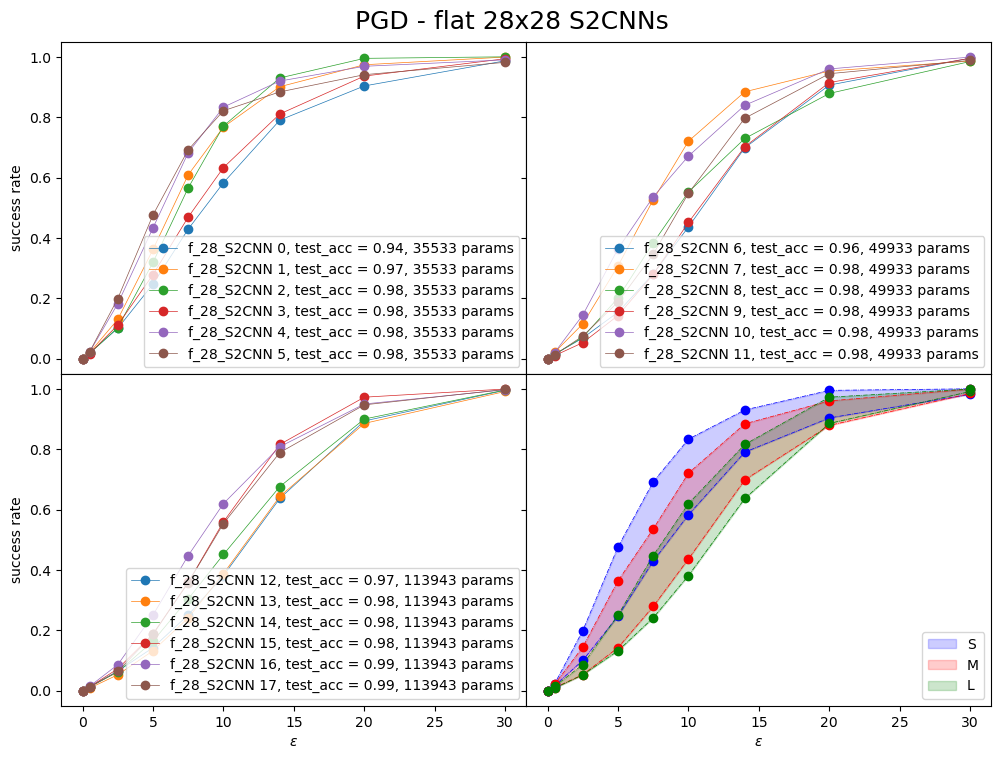

In [210]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize = (12, 8), sharey=True, gridspec_kw={'wspace':0, 'hspace':0})
plt.suptitle('PGD - flat 28x28 S2CNNs', fontsize=18)
plt.subplots_adjust(top=0.94)

for i in range(6):
    axs[0,0].plot(flat_28x28_S2CNN_params['epsilons'], flat_28x28_S2CNN_success_rate[i], 'o-', linewidth=0.5, label=f"f_28_S2CNN {i}, test_acc = {flat_28x28_S2CNN_clean_test_accs[i]:.{2}}, {flat_28x28_S2CNN_total_params[i]} params")
    
for i in range(6,12):
    axs[0,1].plot(flat_28x28_S2CNN_params['epsilons'], flat_28x28_S2CNN_success_rate[i], 'o-', linewidth=0.5, label=f"f_28_S2CNN {i}, test_acc = {flat_28x28_S2CNN_clean_test_accs[i]:.{2}}, {flat_28x28_S2CNN_total_params[i]} params")
    
for i in range(12,18):
    axs[1,0].plot(flat_28x28_S2CNN_params['epsilons'], flat_28x28_S2CNN_success_rate[i], 'o-', linewidth=0.5, label=f"f_28_S2CNN {i}, test_acc = {flat_28x28_S2CNN_clean_test_accs[i]:.{2}}, {flat_28x28_S2CNN_total_params[i]} params")
    
for i in range(2):
    plt.plot(flat_28x28_S2CNN_params['epsilons'], get_min_max(flat_28x28_S2CNN_success_rate[0:6])[i], 'o-.', color='b', linewidth=0.5)
    plt.plot(flat_28x28_S2CNN_params['epsilons'], get_min_max(flat_28x28_S2CNN_success_rate[6:12])[i], 'o-.', color='r', linewidth=0.5)
    plt.plot(flat_28x28_S2CNN_params['epsilons'], get_min_max(flat_28x28_S2CNN_success_rate[12:18])[i], 'o-.', color='g', linewidth=0.5)
    
plt.fill_between(flat_28x28_S2CNN_params['epsilons'], *get_min_max(flat_28x28_S2CNN_success_rate[0:6]), label=f"S", color='b', alpha=alpha)
plt.fill_between(flat_28x28_S2CNN_params['epsilons'], *get_min_max(flat_28x28_S2CNN_success_rate[6:12]), label=f"M", color='r', alpha=alpha)
plt.fill_between(flat_28x28_S2CNN_params['epsilons'], *get_min_max(flat_28x28_S2CNN_success_rate[12:18]), label=f"L", color='g', alpha=alpha)

for j in range(2):
    for k in range(2):
        axs[j,k].legend(loc='lower right')
    axs[1,j].set_xlabel('$\epsilon$')
    axs[j,0].set_ylabel('success rate')
# plt.savefig('PGD_flat_28x28_S2CNN.pdf', bbox_inches="tight")
plt.show()

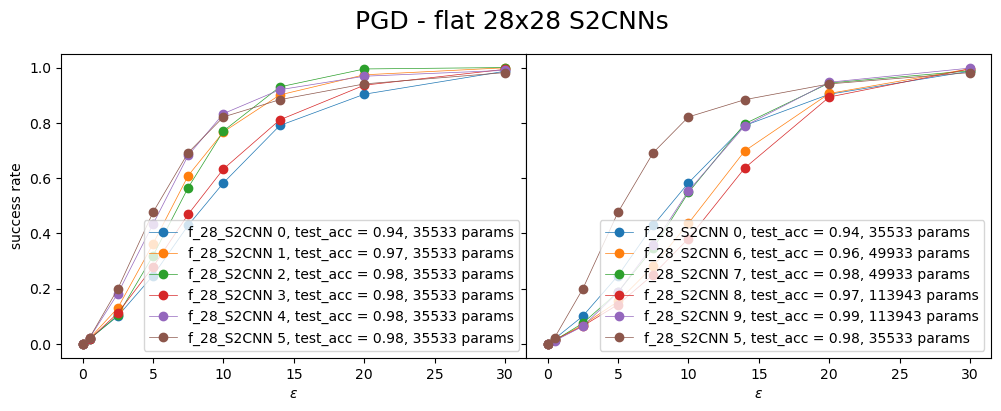

In [12]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize = (12, 4), sharey=True, gridspec_kw={'wspace':0, 'hspace':0})
plt.suptitle('PGD - flat 28x28 S2CNNs', fontsize=18)
plt.subplots_adjust(top=0.87)

for i in range(6):
    axs[0].plot(flat_28x28_S2CNN_params['epsilons'], flat_28x28_S2CNN_success_rate[i], 'o-', linewidth=0.5, label=f"f_28_S2CNN {i}, test_acc = {flat_28x28_S2CNN_clean_test_accs[i]:.{2}}, {flat_28x28_S2CNN_total_params[i]} params")
    axs[0].set_ylabel('success rate')
    
for i in chain([0], range(6,10), [5]):
    axs[1].plot(flat_28x28_S2CNN_params['epsilons'], flat_28x28_S2CNN_success_rate[i], 'o-', linewidth=0.5, label=f"f_28_S2CNN {i}, test_acc = {flat_28x28_S2CNN_clean_test_accs[i]:.{2}}, {flat_28x28_S2CNN_total_params[i]} params")

for j in range(2):
    axs[j].legend(loc='lower right')
    axs[j].set_xlabel('$\epsilon$')
plt.show()

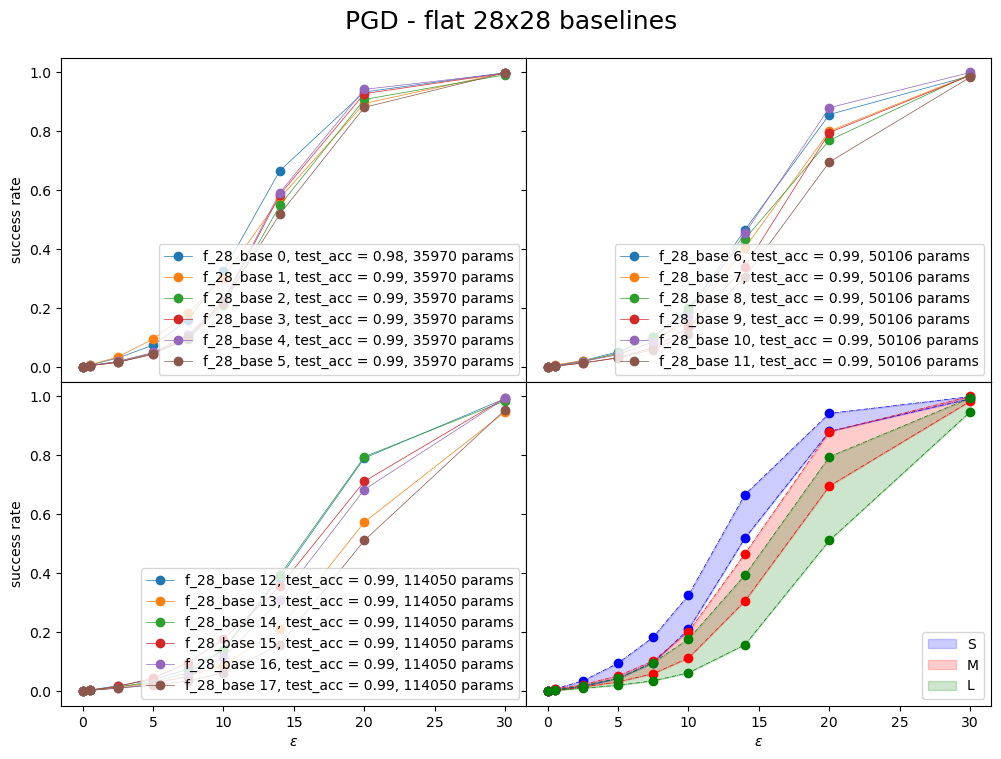

In [188]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize = (12, 8), sharey=True, gridspec_kw={'wspace':0, 'hspace':0})
plt.suptitle('PGD - flat 28x28 baselines', fontsize=18)
plt.subplots_adjust(top=0.92)

for i in range(6):
    axs[0,0].plot(flat_28x28_baseline_params['epsilons'], flat_28x28_baseline_success_rate[i], 'o-', linewidth=0.5, label=f"f_28_base {i}, test_acc = {flat_28x28_baseline_clean_test_accs[i]:.{2}}, {flat_28x28_baseline_total_params[i]} params")

for i in range(6,12):
    axs[0,1].plot(flat_28x28_baseline_params['epsilons'], flat_28x28_baseline_success_rate[i], 'o-', linewidth=0.5, label=f"f_28_base {i}, test_acc = {flat_28x28_baseline_clean_test_accs[i]:.{2}}, {flat_28x28_baseline_total_params[i]} params")
    
for i in range(12,18):
    axs[1,0].plot(flat_28x28_baseline_params['epsilons'], flat_28x28_baseline_success_rate[i], 'o-', linewidth=0.5, label=f"f_28_base {i}, test_acc = {flat_28x28_baseline_clean_test_accs[i]:.{2}}, {flat_28x28_baseline_total_params[i]} params")
    
for i in range(2):
    plt.plot(flat_28x28_baseline_params['epsilons'], get_min_max(flat_28x28_baseline_success_rate[0:6])[i], 'o-.', color='b', linewidth=0.5)
    plt.plot(flat_28x28_baseline_params['epsilons'], get_min_max(flat_28x28_baseline_success_rate[6:12])[i], 'o-.', color='r', linewidth=0.5)
    plt.plot(flat_28x28_baseline_params['epsilons'], get_min_max(flat_28x28_baseline_success_rate[12:18])[i], 'o-.', color='g', linewidth=0.5)
    
plt.fill_between(flat_28x28_baseline_params['epsilons'], *get_min_max(flat_28x28_baseline_success_rate[0:6]), label=f"S", color='b', alpha=alpha)
plt.fill_between(flat_28x28_baseline_params['epsilons'], *get_min_max(flat_28x28_baseline_success_rate[6:12]), label=f"M", color='r', alpha=alpha)
plt.fill_between(flat_28x28_baseline_params['epsilons'], *get_min_max(flat_28x28_baseline_success_rate[12:18]), label=f"L", color='g', alpha=alpha)

for j in range(2):
    for k in range(2):
        axs[j,k].legend(loc='lower right')
    axs[1,j].set_xlabel('$\epsilon$')
    axs[j,0].set_ylabel('success rate')
# plt.savefig('PGD_flat_28x28_baseline.pdf', bbox_inches="tight")
plt.show()

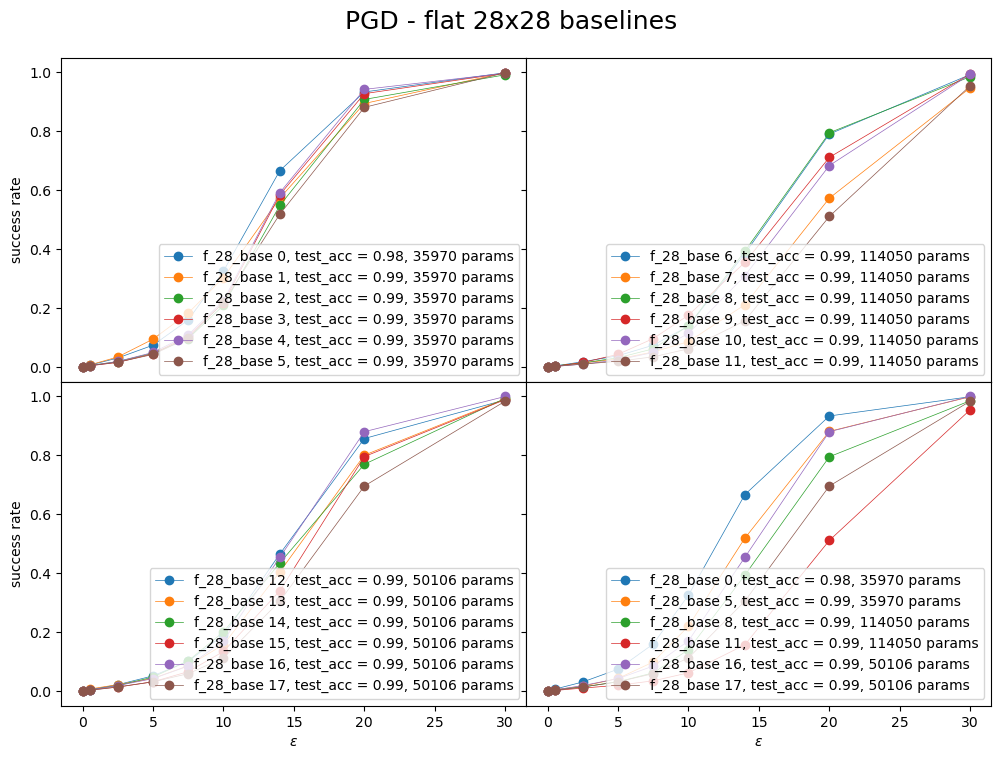

In [32]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize = (12, 8), sharey=True, gridspec_kw={'wspace':0, 'hspace':0})
plt.suptitle('PGD - flat 28x28 baselines', fontsize=18)
plt.subplots_adjust(top=0.92)

for i in range(6):
    axs[0,0].plot(flat_28x28_baseline_params['epsilons'], flat_28x28_baseline_success_rate[i], 'o-', linewidth=0.5, label=f"f_28_base {i}, test_acc = {flat_28x28_baseline_clean_test_accs[i]:.{2}}, {flat_28x28_baseline_total_params[i]} params")

for i in range(6,12):
    axs[0,1].plot(flat_28x28_baseline_params['epsilons'], flat_28x28_baseline_success_rate[i], 'o-', linewidth=0.5, label=f"f_28_base {i}, test_acc = {flat_28x28_baseline_clean_test_accs[i]:.{2}}, {flat_28x28_baseline_total_params[i]} params")
    
for i in range(12,18):
    axs[1,0].plot(flat_28x28_baseline_params['epsilons'], flat_28x28_baseline_success_rate[i], 'o-', linewidth=0.5, label=f"f_28_base {i}, test_acc = {flat_28x28_baseline_clean_test_accs[i]:.{2}}, {flat_28x28_baseline_total_params[i]} params")
    
for i in [0,5,8,11,16,17]:
    axs[1,1].plot(flat_28x28_baseline_params['epsilons'], flat_28x28_baseline_success_rate[i], 'o-', linewidth=0.5, label=f"f_28_base {i}, test_acc = {flat_28x28_baseline_clean_test_accs[i]:.{2}}, {flat_28x28_baseline_total_params[i]} params")

for j in range(2):
    for k in range(2):
        axs[j,k].legend(loc='lower right')
    axs[1,j].set_xlabel('$\epsilon$')
    axs[j,0].set_ylabel('success rate')
plt.show()

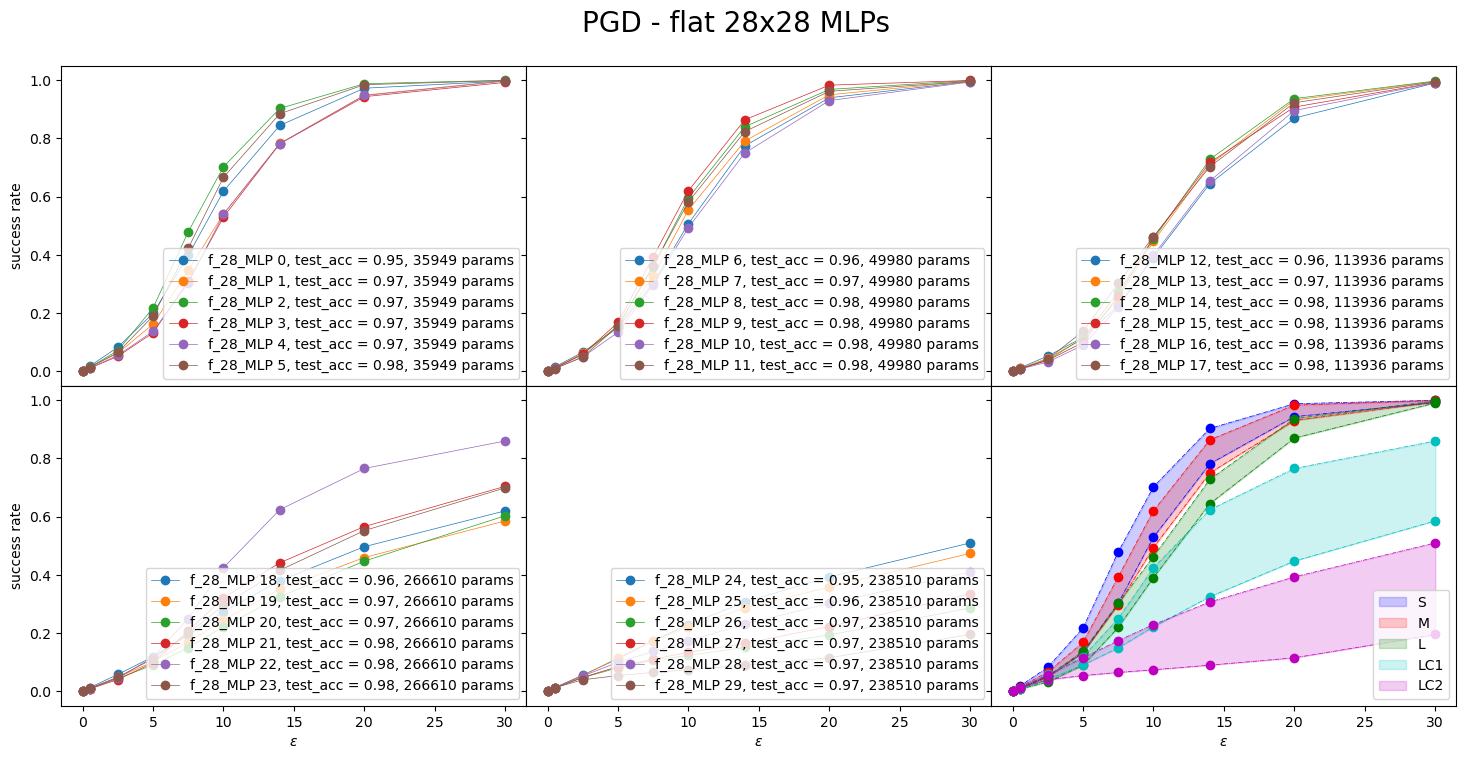

In [195]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize = (18, 8), sharey=True, gridspec_kw={'wspace':0, 'hspace':0})
plt.suptitle('PGD - flat 28x28 MLPs', fontsize=20)
plt.subplots_adjust(top=0.91)

for i in range(6):
    axs[0,0].plot(flat_28x28_MLP_params['epsilons'], flat_28x28_MLP_success_rate[i], 'o-', linewidth=0.5, label=f"f_28_MLP {i}, test_acc = {flat_28x28_MLP_clean_test_accs[i]:.{2}}, {flat_28x28_MLP_total_params[i]} params")
    
for i in range(6,12):
    axs[0,1].plot(flat_28x28_MLP_params['epsilons'], flat_28x28_MLP_success_rate[i], 'o-', linewidth=0.5, label=f"f_28_MLP {i}, test_acc = {flat_28x28_MLP_clean_test_accs[i]:.{2}}, {flat_28x28_MLP_total_params[i]} params")

for i in range(12,18):
    axs[0,2].plot(flat_28x28_MLP_params['epsilons'], flat_28x28_MLP_success_rate[i], 'o-', linewidth=0.5, label=f"f_28_MLP {i}, test_acc = {flat_28x28_MLP_clean_test_accs[i]:.{2}}, {flat_28x28_MLP_total_params[i]} params")
    
for i in range(18,24):
    axs[1,0].plot(flat_28x28_MLP_params['epsilons'], flat_28x28_MLP_success_rate[i], 'o-', linewidth=0.5, label=f"f_28_MLP {i}, test_acc = {flat_28x28_MLP_clean_test_accs[i]:.{2}}, {flat_28x28_MLP_total_params[i]} params")
    
for i in range(24,30):
    axs[1,1].plot(flat_28x28_MLP_params['epsilons'], flat_28x28_MLP_success_rate[i], 'o-', linewidth=0.5, label=f"f_28_MLP {i}, test_acc = {flat_28x28_MLP_clean_test_accs[i]:.{2}}, {flat_28x28_MLP_total_params[i]} params")
    
for i in range(2):
    plt.plot(flat_28x28_MLP_params['epsilons'], get_min_max(flat_28x28_MLP_success_rate[0:6])[i], 'o-.', color='b', linewidth=0.5)
    plt.plot(flat_28x28_MLP_params['epsilons'], get_min_max(flat_28x28_MLP_success_rate[6:12])[i], 'o-.', color='r', linewidth=0.5)
    plt.plot(flat_28x28_MLP_params['epsilons'], get_min_max(flat_28x28_MLP_success_rate[12:18])[i], 'o-.', color='g', linewidth=0.5)
    plt.plot(flat_28x28_MLP_params['epsilons'], get_min_max(flat_28x28_MLP_success_rate[18:24])[i], 'o-.', color='c', linewidth=0.5)
    plt.plot(flat_28x28_MLP_params['epsilons'], get_min_max(flat_28x28_MLP_success_rate[24:30])[i], 'o-.', color='m', linewidth=0.5)
    
plt.fill_between(flat_28x28_MLP_params['epsilons'], *get_min_max(flat_28x28_MLP_success_rate[0:6]), label=f"S", color='b', alpha=alpha)
plt.fill_between(flat_28x28_MLP_params['epsilons'], *get_min_max(flat_28x28_MLP_success_rate[6:12]), label=f"M", color='r', alpha=alpha)
plt.fill_between(flat_28x28_MLP_params['epsilons'], *get_min_max(flat_28x28_MLP_success_rate[12:18]), label=f"L", color='g', alpha=alpha)
plt.fill_between(flat_28x28_MLP_params['epsilons'], *get_min_max(flat_28x28_MLP_success_rate[18:24]), label=f"LC1", color='c', alpha=alpha)
plt.fill_between(flat_28x28_MLP_params['epsilons'], *get_min_max(flat_28x28_MLP_success_rate[24:30]), label=f"LC2", color='m', alpha=alpha)

for j in range(2):
    axs[j,0].set_ylabel('success rate')
    for k in range(3):
        axs[j,k].legend(loc='lower right')
        
for k in range(3):
    axs[1,k].set_xlabel('$\epsilon$')
    
# plt.savefig('PGD_flat_28x28_MLP.pdf', bbox_inches="tight")
plt.show()

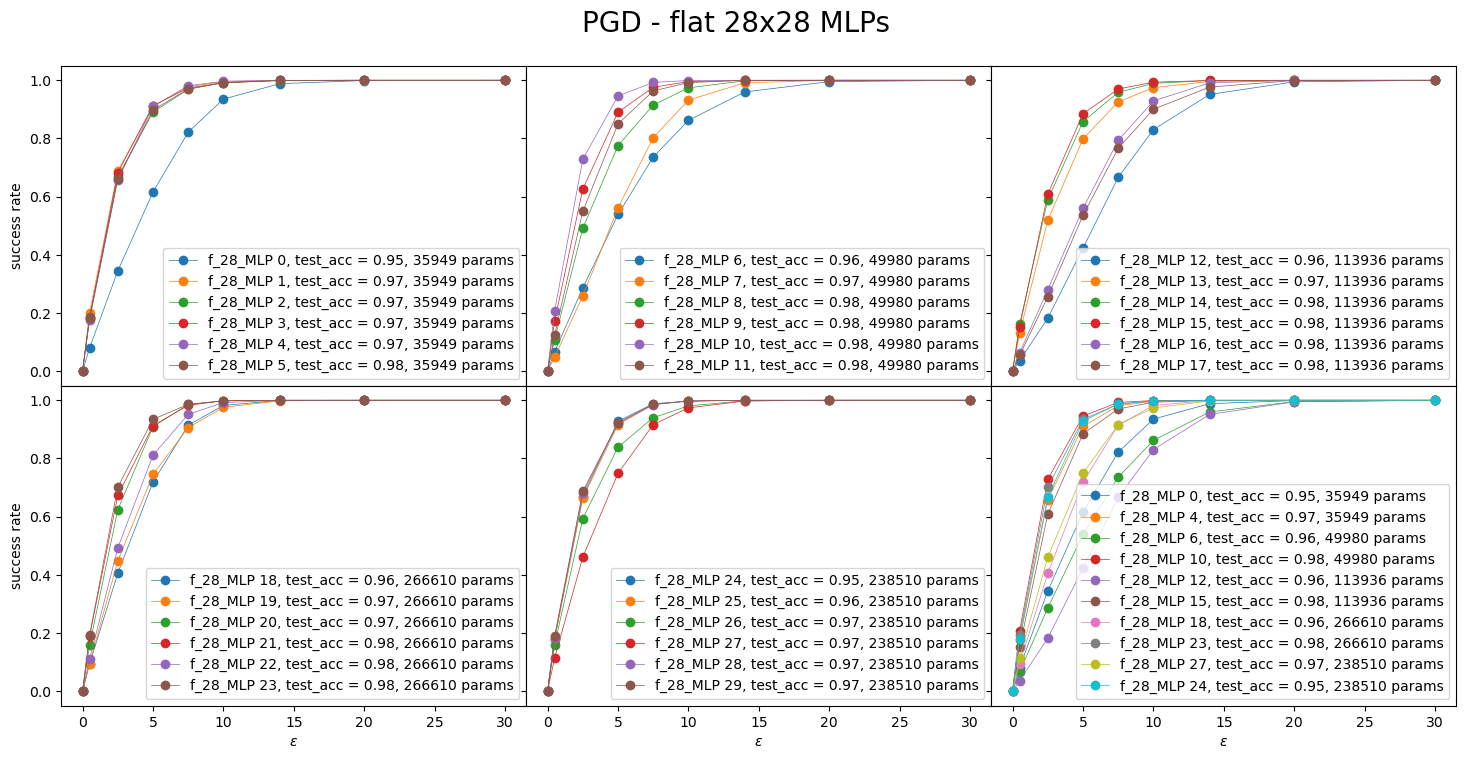

In [18]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize = (18, 8), sharey=True, gridspec_kw={'wspace':0, 'hspace':0})
plt.suptitle('PGD - flat 28x28 MLPs', fontsize=20)
plt.subplots_adjust(top=0.91)

for i in range(6):
    axs[0,0].plot(flat_28x28_MLP_params['epsilons'], flat_28x28_MLP_success_rate[i], 'o-', linewidth=0.5, label=f"f_28_MLP {i}, test_acc = {flat_28x28_MLP_clean_test_accs[i]:.{2}}, {flat_28x28_MLP_total_params[i]} params")
    
for i in range(6,12):
    axs[0,1].plot(flat_28x28_MLP_params['epsilons'], flat_28x28_MLP_success_rate[i], 'o-', linewidth=0.5, label=f"f_28_MLP {i}, test_acc = {flat_28x28_MLP_clean_test_accs[i]:.{2}}, {flat_28x28_MLP_total_params[i]} params")

for i in range(12,18):
    axs[0,2].plot(flat_28x28_MLP_params['epsilons'], flat_28x28_MLP_success_rate[i], 'o-', linewidth=0.5, label=f"f_28_MLP {i}, test_acc = {flat_28x28_MLP_clean_test_accs[i]:.{2}}, {flat_28x28_MLP_total_params[i]} params")
    
for i in range(18,24):
    axs[1,0].plot(flat_28x28_MLP_params['epsilons'], flat_28x28_MLP_success_rate[i], 'o-', linewidth=0.5, label=f"f_28_MLP {i}, test_acc = {flat_28x28_MLP_clean_test_accs[i]:.{2}}, {flat_28x28_MLP_total_params[i]} params")
    
for i in range(24,30):
    axs[1,1].plot(flat_28x28_MLP_params['epsilons'], flat_28x28_MLP_success_rate[i], 'o-', linewidth=0.5, label=f"f_28_MLP {i}, test_acc = {flat_28x28_MLP_clean_test_accs[i]:.{2}}, {flat_28x28_MLP_total_params[i]} params")
    
for i in [0,4,6,10,12,15,18,23,27,24]:
    axs[1,2].plot(flat_28x28_MLP_params['epsilons'], flat_28x28_MLP_success_rate[i], 'o-', linewidth=0.5, label=f"f_28_MLP {i}, test_acc = {flat_28x28_MLP_clean_test_accs[i]:.{2}}, {flat_28x28_MLP_total_params[i]} params")

for j in range(2):
    axs[j,0].set_ylabel('success rate')
    for k in range(3):
        axs[j,k].legend(loc='lower right')
        
for k in range(3):
    axs[1,k].set_xlabel('$\epsilon$')
    
plt.show()

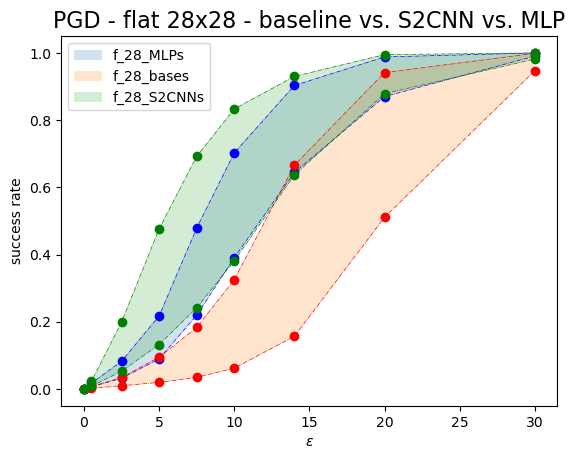

In [212]:
alpha = 0.2
plt.title('PGD - flat 28x28 - baseline vs. S2CNN vs. MLP', fontsize=16)
for i in range(2):
    plt.plot(flat_28x28_MLP_params['epsilons'], get_min_max(flat_28x28_MLP_success_rate[:18])[i], 'o-.', color='b', linewidth=0.5)
for i in range(2):
    plt.plot(flat_28x28_baseline_params['epsilons'], get_min_max(flat_28x28_baseline_success_rate)[i], 'o-.', color='r', linewidth=0.5)
for i in range(2):
    plt.plot(flat_28x28_S2CNN_params['epsilons'], get_min_max(flat_28x28_S2CNN_success_rate)[i], 'o-.', color='g', linewidth=0.5)

plt.fill_between(flat_28x28_MLP_params['epsilons'], *get_min_max(flat_28x28_MLP_success_rate[:18]), label=f"f_28_MLPs", alpha=alpha)
plt.fill_between(flat_28x28_baseline_params['epsilons'], *get_min_max(flat_28x28_baseline_success_rate), label=f"f_28_bases", alpha=alpha)
plt.fill_between(flat_28x28_S2CNN_params['epsilons'], *get_min_max(flat_28x28_S2CNN_success_rate), label=f"f_28_S2CNNs", alpha=alpha)

plt.xlabel('$\epsilon$')
plt.ylabel('success rate')
plt.legend()
# plt.savefig('PGD_MLP_vs_bl_vs_S2CNN_flat_28x28.pdf', bbox_inches="tight")
plt.show()

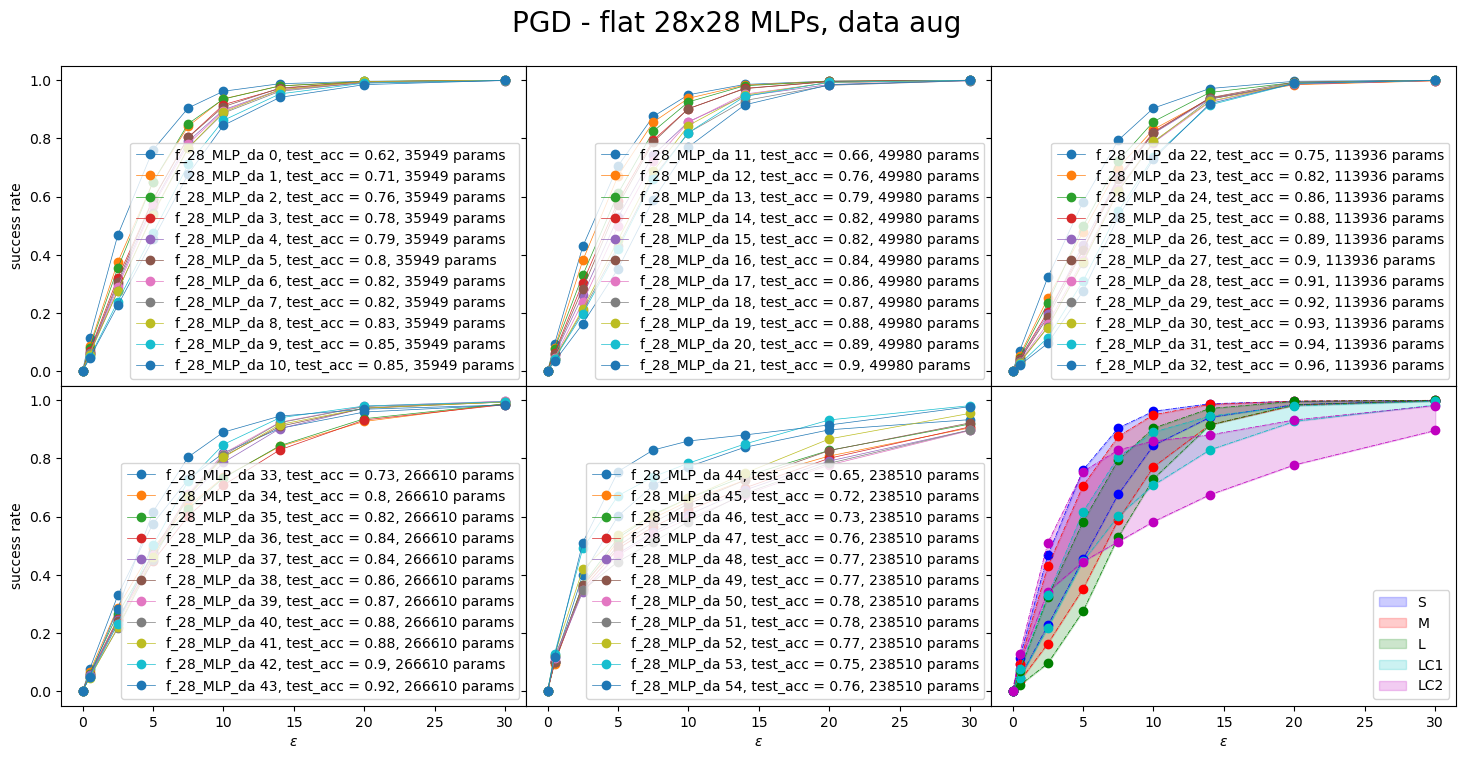

In [198]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize = (18, 8), sharey=True, gridspec_kw={'wspace':0, 'hspace':0})
plt.suptitle('PGD - flat 28x28 MLPs, data aug', fontsize=20)
plt.subplots_adjust(top=0.91)

for i in range(11):
    axs[0,0].plot(flat_28x28_MLP_data_aug_params['epsilons'], flat_28x28_MLP_data_aug_success_rate[i], 'o-', linewidth=0.5, label=f"f_28_MLP_da {i}, test_acc = {flat_28x28_MLP_data_aug_clean_test_accs[i]:.{2}}, {flat_28x28_MLP_data_aug_total_params[i]} params")
    
for i in range(11,22):
    axs[0,1].plot(flat_28x28_MLP_data_aug_params['epsilons'], flat_28x28_MLP_data_aug_success_rate[i], 'o-', linewidth=0.5, label=f"f_28_MLP_da {i}, test_acc = {flat_28x28_MLP_data_aug_clean_test_accs[i]:.{2}}, {flat_28x28_MLP_data_aug_total_params[i]} params")

for i in range(22,33):
    axs[0,2].plot(flat_28x28_MLP_data_aug_params['epsilons'], flat_28x28_MLP_data_aug_success_rate[i], 'o-', linewidth=0.5, label=f"f_28_MLP_da {i}, test_acc = {flat_28x28_MLP_data_aug_clean_test_accs[i]:.{2}}, {flat_28x28_MLP_data_aug_total_params[i]} params")
    
for i in range(33,44):
    axs[1,0].plot(flat_28x28_MLP_data_aug_params['epsilons'], flat_28x28_MLP_data_aug_success_rate[i], 'o-', linewidth=0.5, label=f"f_28_MLP_da {i}, test_acc = {flat_28x28_MLP_data_aug_clean_test_accs[i]:.{2}}, {flat_28x28_MLP_data_aug_total_params[i]} params")
    
for i in range(44,55):
    axs[1,1].plot(flat_28x28_MLP_data_aug_params['epsilons'], flat_28x28_MLP_data_aug_success_rate[i], 'o-', linewidth=0.5, label=f"f_28_MLP_da {i}, test_acc = {flat_28x28_MLP_data_aug_clean_test_accs[i]:.{2}}, {flat_28x28_MLP_data_aug_total_params[i]} params")
    
for i in range(2):
    plt.plot(flat_28x28_MLP_data_aug_params['epsilons'], get_min_max(flat_28x28_MLP_data_aug_success_rate[0:11])[i], 'o-.', color='b', linewidth=0.5)
    plt.plot(flat_28x28_MLP_data_aug_params['epsilons'], get_min_max(flat_28x28_MLP_data_aug_success_rate[11:22])[i], 'o-.', color='r', linewidth=0.5)
    plt.plot(flat_28x28_MLP_data_aug_params['epsilons'], get_min_max(flat_28x28_MLP_data_aug_success_rate[22:33])[i], 'o-.', color='g', linewidth=0.5)
    plt.plot(flat_28x28_MLP_data_aug_params['epsilons'], get_min_max(flat_28x28_MLP_data_aug_success_rate[33:44])[i], 'o-.', color='c', linewidth=0.5)
    plt.plot(flat_28x28_MLP_data_aug_params['epsilons'], get_min_max(flat_28x28_MLP_data_aug_success_rate[44:55])[i], 'o-.', color='m', linewidth=0.5)
    
plt.fill_between(flat_28x28_MLP_data_aug_params['epsilons'], *get_min_max(flat_28x28_MLP_data_aug_success_rate[0:11]), label=f"S", color='b', alpha=alpha)
plt.fill_between(flat_28x28_MLP_data_aug_params['epsilons'], *get_min_max(flat_28x28_MLP_data_aug_success_rate[11:22]), label=f"M", color='r', alpha=alpha)
plt.fill_between(flat_28x28_MLP_data_aug_params['epsilons'], *get_min_max(flat_28x28_MLP_data_aug_success_rate[22:33]), label=f"L", color='g', alpha=alpha)
plt.fill_between(flat_28x28_MLP_data_aug_params['epsilons'], *get_min_max(flat_28x28_MLP_data_aug_success_rate[33:44]), label=f"LC1", color='c', alpha=alpha)
plt.fill_between(flat_28x28_MLP_data_aug_params['epsilons'], *get_min_max(flat_28x28_MLP_data_aug_success_rate[44:55]), label=f"LC2", color='m', alpha=alpha)

for j in range(2):
    axs[j,0].set_ylabel('success rate')
    for k in range(3):
        axs[j,k].legend(loc='lower right')
        
for k in range(3):
    axs[1,k].set_xlabel('$\epsilon$')
    
# plt.savefig('PGD_flat_28x28_MLP_data_aug.pdf', bbox_inches="tight")
plt.show()

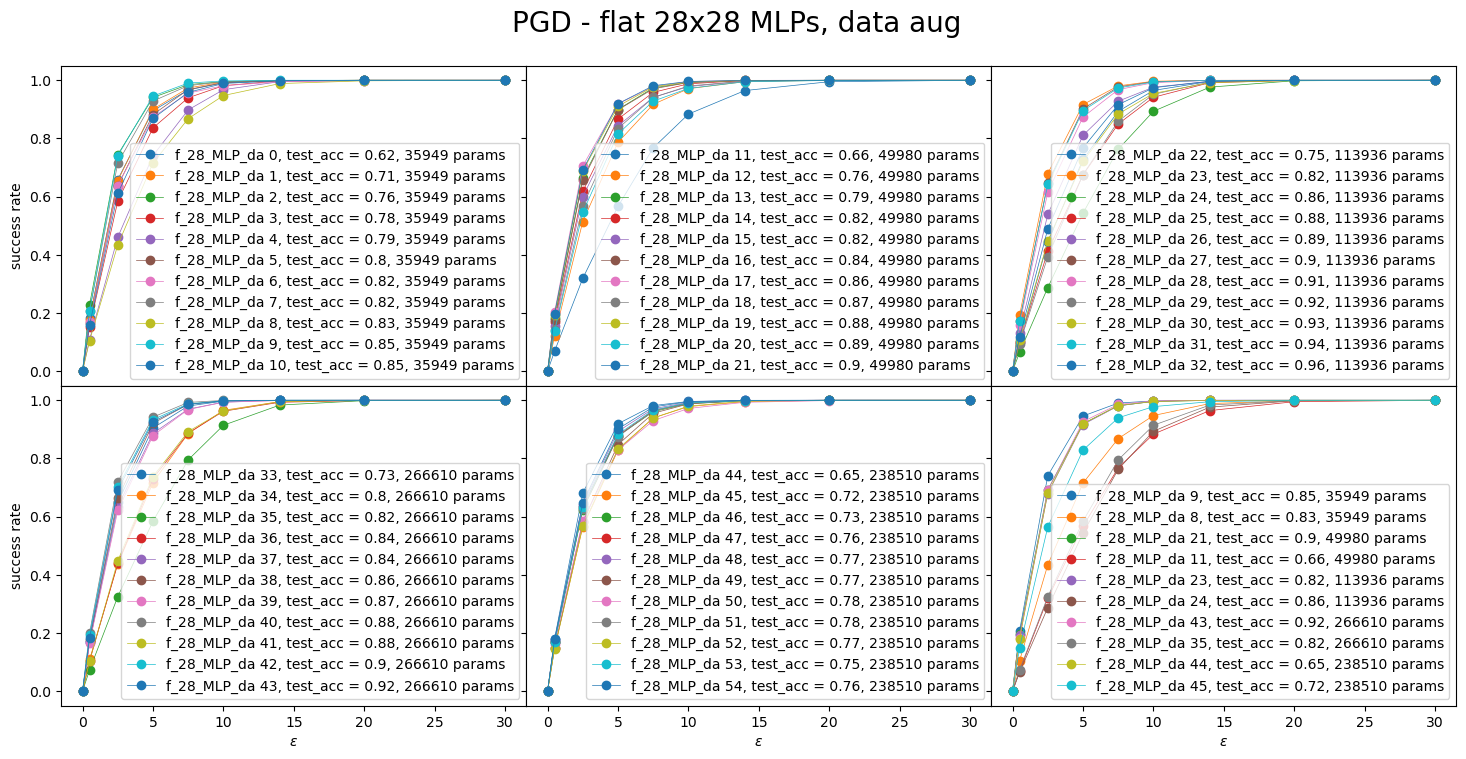

In [8]:
# add results with more training data by inserting the runs so that the ranges to plot are contiguous?
fig, axs = plt.subplots(nrows=2, ncols=3, figsize = (18, 8), sharey=True, gridspec_kw={'wspace':0, 'hspace':0})
plt.suptitle('PGD - flat 28x28 MLPs, data aug', fontsize=20)
plt.subplots_adjust(top=0.91)

for i in range(11):
    axs[0,0].plot(flat_28x28_MLP_data_aug_params['epsilons'], flat_28x28_MLP_data_aug_success_rate[i], 'o-', linewidth=0.5, label=f"f_28_MLP_da {i}, test_acc = {flat_28x28_MLP_data_aug_clean_test_accs[i]:.{2}}, {flat_28x28_MLP_data_aug_total_params[i]} params")
    
for i in range(11,22):
    axs[0,1].plot(flat_28x28_MLP_data_aug_params['epsilons'], flat_28x28_MLP_data_aug_success_rate[i], 'o-', linewidth=0.5, label=f"f_28_MLP_da {i}, test_acc = {flat_28x28_MLP_data_aug_clean_test_accs[i]:.{2}}, {flat_28x28_MLP_data_aug_total_params[i]} params")

for i in range(22,33):
    axs[0,2].plot(flat_28x28_MLP_data_aug_params['epsilons'], flat_28x28_MLP_data_aug_success_rate[i], 'o-', linewidth=0.5, label=f"f_28_MLP_da {i}, test_acc = {flat_28x28_MLP_data_aug_clean_test_accs[i]:.{2}}, {flat_28x28_MLP_data_aug_total_params[i]} params")
    
for i in range(33,44):
    axs[1,0].plot(flat_28x28_MLP_data_aug_params['epsilons'], flat_28x28_MLP_data_aug_success_rate[i], 'o-', linewidth=0.5, label=f"f_28_MLP_da {i}, test_acc = {flat_28x28_MLP_data_aug_clean_test_accs[i]:.{2}}, {flat_28x28_MLP_data_aug_total_params[i]} params")
    
for i in range(44,55):
    axs[1,1].plot(flat_28x28_MLP_data_aug_params['epsilons'], flat_28x28_MLP_data_aug_success_rate[i], 'o-', linewidth=0.5, label=f"f_28_MLP_da {i}, test_acc = {flat_28x28_MLP_data_aug_clean_test_accs[i]:.{2}}, {flat_28x28_MLP_data_aug_total_params[i]} params")
    
for i in [9,8,21,11,23,24,43,35,44,45]:
    axs[1,2].plot(flat_28x28_MLP_data_aug_params['epsilons'], flat_28x28_MLP_data_aug_success_rate[i], 'o-', linewidth=0.5, label=f"f_28_MLP_da {i}, test_acc = {flat_28x28_MLP_data_aug_clean_test_accs[i]:.{2}}, {flat_28x28_MLP_data_aug_total_params[i]} params")

for j in range(2):
    axs[j,0].set_ylabel('success rate')
    for k in range(3):
        axs[j,k].legend(loc='lower right')
        
for k in range(3):
    axs[1,k].set_xlabel('$\epsilon$')
    
plt.show()

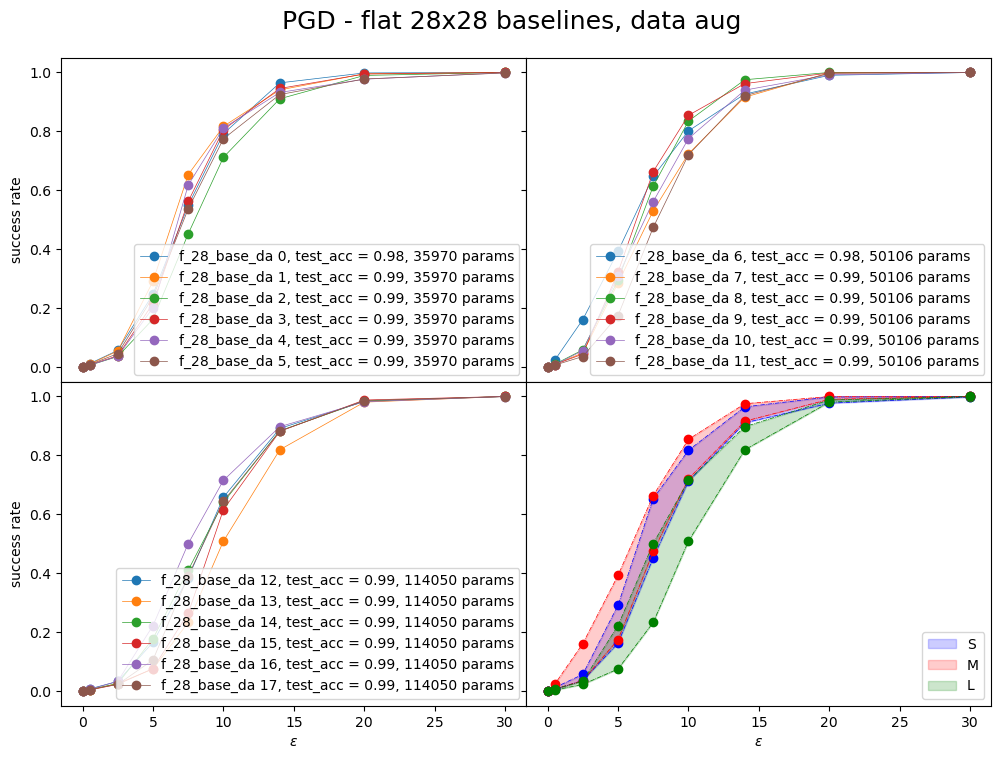

In [202]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize = (12, 8), sharey=True, gridspec_kw={'wspace':0, 'hspace':0})
plt.suptitle('PGD - flat 28x28 baselines, data aug', fontsize=18)
plt.subplots_adjust(top=0.92)

for i in range(6):
    axs[0,0].plot(flat_28x28_baseline_data_aug_params['epsilons'], flat_28x28_baseline_data_aug_success_rate[i], 'o-', linewidth=0.5, label=f"f_28_base_da {i}, test_acc = {flat_28x28_baseline_data_aug_clean_test_accs[i]:.{2}}, {flat_28x28_baseline_data_aug_total_params[i]} params")
    
for i in range(6,12):
    axs[0,1].plot(flat_28x28_baseline_data_aug_params['epsilons'], flat_28x28_baseline_data_aug_success_rate[i], 'o-', linewidth=0.5, label=f"f_28_base_da {i}, test_acc = {flat_28x28_baseline_data_aug_clean_test_accs[i]:.{2}}, {flat_28x28_baseline_data_aug_total_params[i]} params")
    
for i in range(12,18):
    axs[1,0].plot(flat_28x28_baseline_data_aug_params['epsilons'], flat_28x28_baseline_data_aug_success_rate[i], 'o-', linewidth=0.5, label=f"f_28_base_da {i}, test_acc = {flat_28x28_baseline_data_aug_clean_test_accs[i]:.{2}}, {flat_28x28_baseline_data_aug_total_params[i]} params")
    
for i in range(2):
    plt.plot(flat_28x28_baseline_data_aug_params['epsilons'], get_min_max(flat_28x28_baseline_data_aug_success_rate[0:6])[i], 'o-.', color='b', linewidth=0.5)
    plt.plot(flat_28x28_baseline_data_aug_params['epsilons'], get_min_max(flat_28x28_baseline_data_aug_success_rate[6:12])[i], 'o-.', color='r', linewidth=0.5)
    plt.plot(flat_28x28_baseline_data_aug_params['epsilons'], get_min_max(flat_28x28_baseline_data_aug_success_rate[12:18])[i], 'o-.', color='g', linewidth=0.5)
    
plt.fill_between(flat_28x28_baseline_data_aug_params['epsilons'], *get_min_max(flat_28x28_baseline_data_aug_success_rate[0:6]), label=f"S", color='b', alpha=alpha)
plt.fill_between(flat_28x28_baseline_data_aug_params['epsilons'], *get_min_max(flat_28x28_baseline_data_aug_success_rate[6:12]), label=f"M", color='r', alpha=alpha)
plt.fill_between(flat_28x28_baseline_data_aug_params['epsilons'], *get_min_max(flat_28x28_baseline_data_aug_success_rate[12:18]), label=f"L", color='g', alpha=alpha)

for j in range(2):
    for k in range(2):
        axs[j,k].legend(loc='lower right')
    axs[1,j].set_xlabel('$\epsilon$')
    axs[j,0].set_ylabel('success rate')
# plt.savefig('PGD_flat_28x28_baseline_data_aug.pdf', bbox_inches="tight")
plt.show()

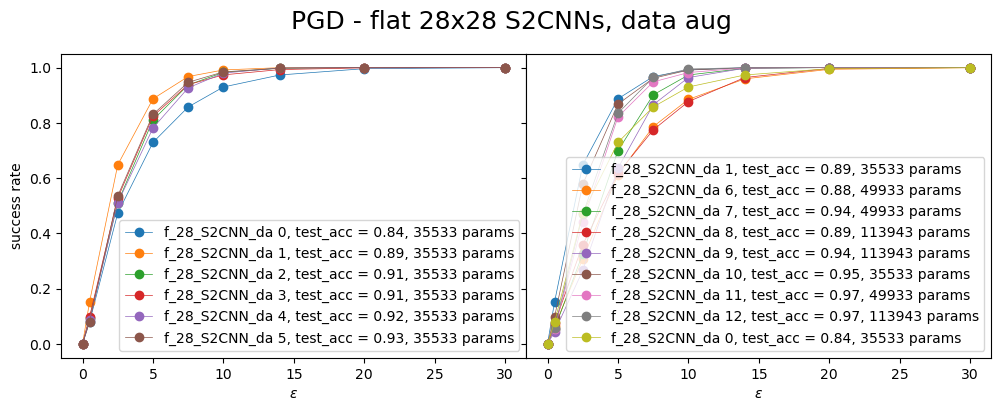

In [12]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize = (12, 4), sharey=True, gridspec_kw={'wspace':0, 'hspace':0})
plt.suptitle('PGD - flat 28x28 S2CNNs, data aug', fontsize=18)
plt.subplots_adjust(top=0.87)

for i in range(6):
    axs[0].plot(flat_28x28_S2CNN_data_aug_params['epsilons'], flat_28x28_S2CNN_data_aug_success_rate[i], 'o-', linewidth=0.5, label=f"f_28_S2CNN_da {i}, test_acc = {flat_28x28_S2CNN_data_aug_clean_test_accs[i]:.{2}}, {flat_28x28_S2CNN_data_aug_total_params[i]} params")
    axs[0].set_ylabel('success rate')
    
for i in chain([1], range(6,13), [0]):
    axs[1].plot(flat_28x28_S2CNN_data_aug_params['epsilons'], flat_28x28_S2CNN_data_aug_success_rate[i], 'o-', linewidth=0.5, label=f"f_28_S2CNN_da {i}, test_acc = {flat_28x28_S2CNN_data_aug_clean_test_accs[i]:.{2}}, {flat_28x28_S2CNN_data_aug_total_params[i]} params")

for j in range(2):
    axs[j].legend(loc='lower right')
    axs[j].set_xlabel('$\epsilon$')
# plt.savefig('PGD_flat_28x28_S2CNN_data_aug.pdf', bbox_inches="tight")
plt.show()

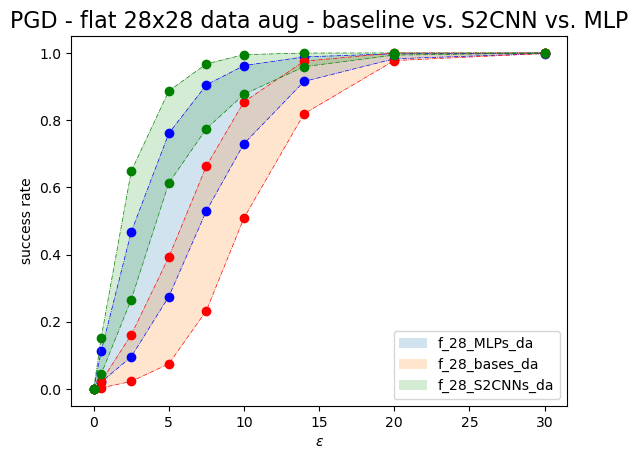

In [204]:
alpha = 0.2
plt.title('PGD - flat 28x28 data aug - baseline vs. S2CNN vs. MLP', fontsize=16)
for i in range(2):
    plt.plot(flat_28x28_MLP_data_aug_params['epsilons'], get_min_max(flat_28x28_MLP_data_aug_success_rate[:33])[i], 'o-.', color='b', linewidth=0.5)
for i in range(2):
    plt.plot(flat_28x28_baseline_data_aug_params['epsilons'], get_min_max(flat_28x28_baseline_data_aug_success_rate)[i], 'o-.', color='r', linewidth=0.5)
for i in range(2):
    plt.plot(flat_28x28_S2CNN_data_aug_params['epsilons'], get_min_max(flat_28x28_S2CNN_data_aug_success_rate)[i], 'o-.', color='g', linewidth=0.5)

plt.fill_between(flat_28x28_MLP_data_aug_params['epsilons'], *get_min_max(flat_28x28_MLP_data_aug_success_rate[:33]), label=f"f_28_MLPs_da", alpha=alpha)
plt.fill_between(flat_28x28_baseline_data_aug_params['epsilons'], *get_min_max(flat_28x28_baseline_data_aug_success_rate), label=f"f_28_bases_da", alpha=alpha)
plt.fill_between(flat_28x28_S2CNN_data_aug_params['epsilons'], *get_min_max(flat_28x28_S2CNN_data_aug_success_rate), label=f"f_28_S2CNNs_da", alpha=alpha)

plt.xlabel('$\epsilon$')
plt.ylabel('success rate')
plt.legend()
# plt.savefig('PGD_MLP_vs_bl_vs_S2CNN_flat_28x28_data_aug.pdf', bbox_inches="tight")
plt.show()

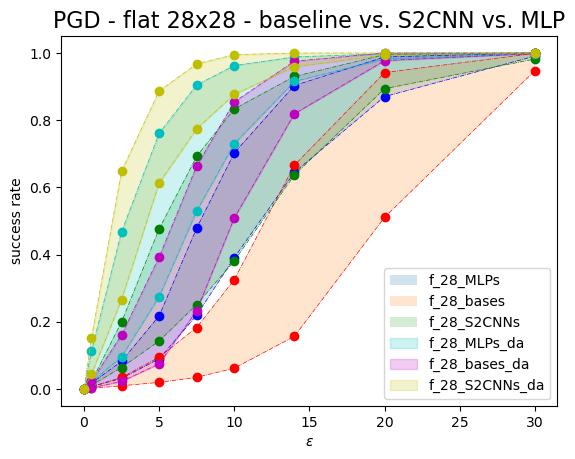

In [205]:
alpha = 0.2
plt.title('PGD - flat 28x28 - baseline vs. S2CNN vs. MLP', fontsize=16)
for i in range(2):
    plt.plot(flat_28x28_MLP_params['epsilons'], get_min_max(flat_28x28_MLP_success_rate[:18])[i], 'o-.', color='b', linewidth=0.5)
for i in range(2):
    plt.plot(flat_28x28_baseline_params['epsilons'], get_min_max(flat_28x28_baseline_success_rate)[i], 'o-.', color='r', linewidth=0.5)
for i in range(2):
    plt.plot(flat_28x28_S2CNN_params['epsilons'], get_min_max(flat_28x28_S2CNN_success_rate)[i], 'o-.', color='g', linewidth=0.5)
for i in range(2):
    plt.plot(flat_28x28_MLP_data_aug_params['epsilons'], get_min_max(flat_28x28_MLP_data_aug_success_rate[:33])[i], 'o-.', color='c', linewidth=0.5)
for i in range(2):
    plt.plot(flat_28x28_baseline_data_aug_params['epsilons'], get_min_max(flat_28x28_baseline_data_aug_success_rate)[i], 'o-.', color='m', linewidth=0.5)
for i in range(2):
    plt.plot(flat_28x28_S2CNN_data_aug_params['epsilons'], get_min_max(flat_28x28_S2CNN_data_aug_success_rate)[i], 'o-.', color='y', linewidth=0.5)

plt.fill_between(flat_28x28_MLP_params['epsilons'], *get_min_max(flat_28x28_MLP_success_rate[:18]), label=f"f_28_MLPs", alpha=alpha)
plt.fill_between(flat_28x28_baseline_params['epsilons'], *get_min_max(flat_28x28_baseline_success_rate), label=f"f_28_bases", alpha=alpha)
plt.fill_between(flat_28x28_S2CNN_params['epsilons'], *get_min_max(flat_28x28_S2CNN_success_rate), label=f"f_28_S2CNNs", alpha=alpha)
plt.fill_between(flat_28x28_MLP_data_aug_params['epsilons'], *get_min_max(flat_28x28_MLP_data_aug_success_rate[:33]), color='c', label=f"f_28_MLPs_da", alpha=alpha)
plt.fill_between(flat_28x28_baseline_data_aug_params['epsilons'], *get_min_max(flat_28x28_baseline_data_aug_success_rate), color='m', label=f"f_28_bases_da", alpha=alpha)
plt.fill_between(flat_28x28_S2CNN_data_aug_params['epsilons'], *get_min_max(flat_28x28_S2CNN_data_aug_success_rate), color='y', label=f"f_28_S2CNNs_da", alpha=alpha)

plt.xlabel('$\epsilon$')
plt.ylabel('success rate')
plt.legend()
# plt.savefig('PGD_MLP_vs_bl_vs_S2CNN_flat_28x28_including_data_aug.pdf', bbox_inches="tight")

plt.show()

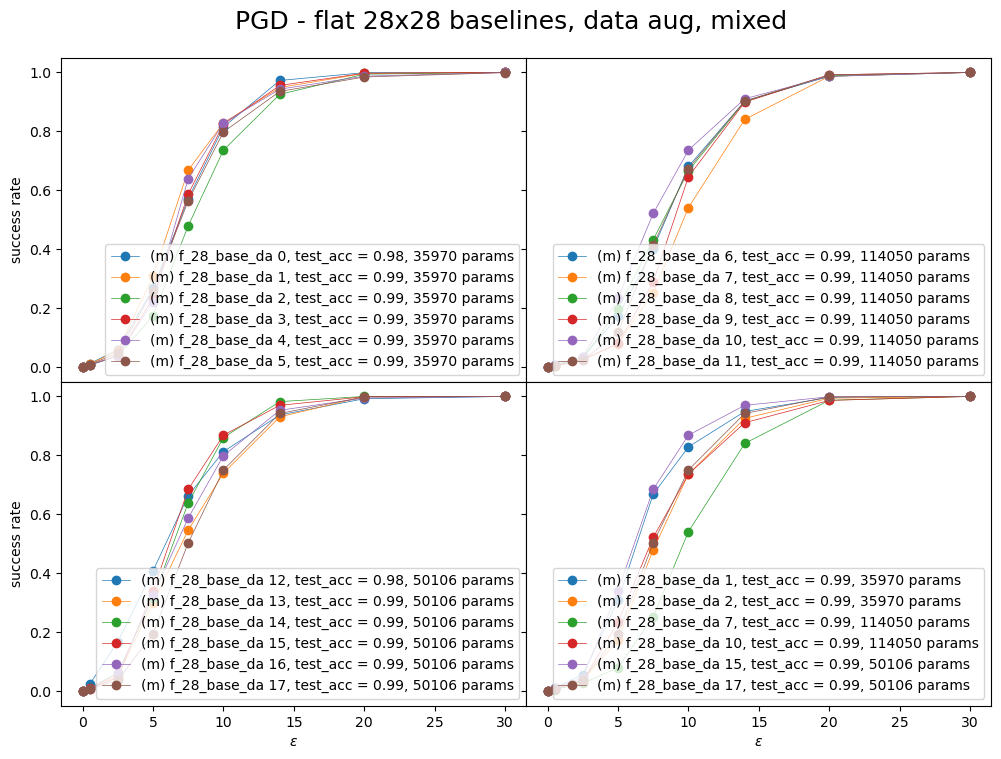

In [76]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize = (12, 8), sharey=True, gridspec_kw={'wspace':0, 'hspace':0})
plt.suptitle('PGD - flat 28x28 baselines, data aug, mixed', fontsize=18)
plt.subplots_adjust(top=0.92)

for i in range(6):
    axs[0,0].plot(mixed_flat_28x28_baseline_params['epsilons'], mixed_flat_28x28_baseline_success_rate[i], 'o-', linewidth=0.5, label=f"(m) f_28_base_da {i}, test_acc = {mixed_flat_28x28_baseline_clean_test_accs[i]:.{2}}, {mixed_flat_28x28_baseline_total_params[i]} params")
    
    
for i in range(6,12):
    axs[0,1].plot(mixed_flat_28x28_baseline_params['epsilons'], mixed_flat_28x28_baseline_success_rate[i], 'o-', linewidth=0.5, label=f"(m) f_28_base_da {i}, test_acc = {mixed_flat_28x28_baseline_clean_test_accs[i]:.{2}}, {mixed_flat_28x28_baseline_total_params[i]} params")
    
for i in range(12,18):
    axs[1,0].plot(mixed_flat_28x28_baseline_params['epsilons'], mixed_flat_28x28_baseline_success_rate[i], 'o-', linewidth=0.5, label=f"(m) f_28_base_da {i}, test_acc = {mixed_flat_28x28_baseline_clean_test_accs[i]:.{2}}, {mixed_flat_28x28_baseline_total_params[i]} params")
    
for i in [1,2,7,10,15,17]:
    axs[1,1].plot(mixed_flat_28x28_baseline_params['epsilons'], mixed_flat_28x28_baseline_success_rate[i], 'o-', linewidth=0.5, label=f"(m) f_28_base_da {i}, test_acc = {mixed_flat_28x28_baseline_clean_test_accs[i]:.{2}}, {mixed_flat_28x28_baseline_total_params[i]} params")

for j in range(2):
    for k in range(2):
        axs[j,k].legend(loc='lower right')
    axs[1,j].set_xlabel('$\epsilon$')
    axs[j,0].set_ylabel('success rate')
# plt.savefig('PGD_mixed_flat_28x28_baseline_data_aug.pdf', bbox_inches="tight")
plt.show()

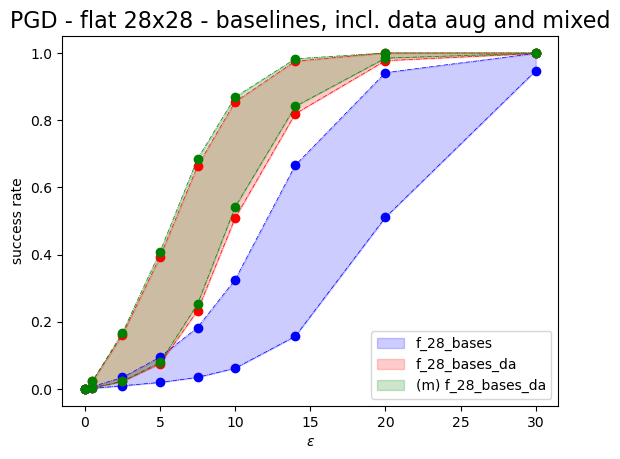

In [77]:
alpha = 0.2
plt.title('PGD - flat 28x28 - baselines, incl. data aug and mixed', fontsize=16)

for i in range(2):
    plt.plot(flat_28x28_baseline_params['epsilons'], get_min_max(flat_28x28_baseline_success_rate)[i], 'o-.', color='b', linewidth=0.5)
    
for i in range(2):
    plt.plot(flat_28x28_baseline_data_aug_params['epsilons'], get_min_max(flat_28x28_baseline_data_aug_success_rate)[i], 'o-.', color='r', linewidth=0.5)
    
for i in range(2):
    plt.plot(mixed_flat_28x28_baseline_params['epsilons'], get_min_max(mixed_flat_28x28_baseline_success_rate)[i], 'o-.', color='g', linewidth=0.5)
    
plt.fill_between(flat_28x28_baseline_params['epsilons'], *get_min_max(flat_28x28_baseline_success_rate), label=f"f_28_bases", color='b', alpha=alpha)
plt.fill_between(flat_28x28_baseline_data_aug_params['epsilons'], *get_min_max(flat_28x28_baseline_data_aug_success_rate), label=f"f_28_bases_da", color='r', alpha=alpha)
plt.fill_between(mixed_flat_28x28_baseline_params['epsilons'], *get_min_max(mixed_flat_28x28_baseline_success_rate), label=f"(m) f_28_bases_da", color='g', alpha=alpha)

plt.xlabel('$\epsilon$')
plt.ylabel('success rate')
plt.legend()
# plt.savefig('PGD_MLP_vs_bl_vs_S2CNN_flat_28x28_including_data_aug_and_mixed.pdf', bbox_inches="tight")

plt.show()

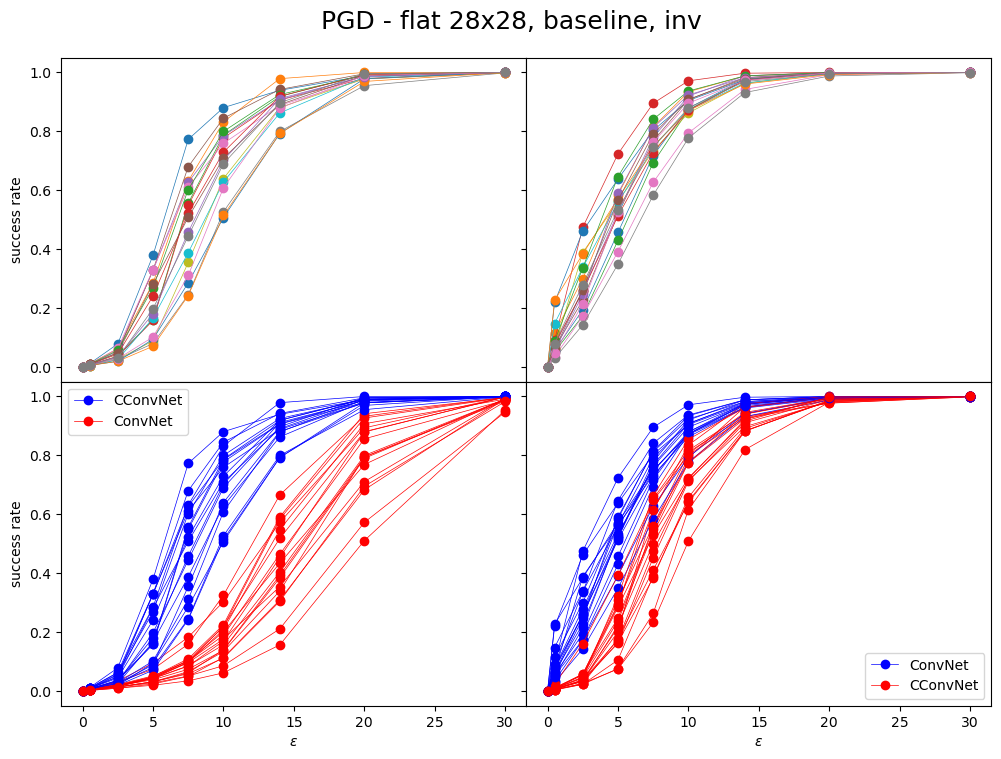

In [66]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize = (12, 8), sharey=True, sharex=True, gridspec_kw={'wspace':0, 'hspace':0})
plt.suptitle('PGD - flat 28x28, baseline, inv', fontsize=18)
plt.subplots_adjust(top=0.92)

for i in range(18):
    axs[0,0].plot(flat_28x28_baseline_params_inv['epsilons'], flat_28x28_baseline_success_rate_inv[i], 'o-', linewidth=0.5, label=f"f_28_base_inv {i}, test_acc = {flat_28x28_baseline_clean_test_accs_inv[i]:.{2}}, {flat_28x28_baseline_total_params_inv[i]} params")
axs[0,0].set_ylabel('success rate')

for i in range(18):
    axs[0,1].plot(flat_28x28_baseline_data_aug_params_inv['epsilons'], flat_28x28_baseline_data_aug_success_rate_inv[i], 'o-', linewidth=0.5, label=f"f_28_base_da_inv {i}, test_acc = {flat_28x28_baseline_data_aug_clean_test_accs_inv[i]:.{2}}, {flat_28x28_baseline_data_aug_total_params_inv[i]} params")

for i in range(17):
    axs[1,0].plot(flat_28x28_baseline_params_inv['epsilons'], flat_28x28_baseline_success_rate_inv[i], 'o-', linewidth=0.5, color='b')
    axs[1,0].plot(flat_28x28_baseline_params['epsilons'], flat_28x28_baseline_success_rate[i], 'o-', linewidth=0.5, color='r')

for i in [17]:
    axs[1,0].plot(flat_28x28_baseline_params_inv['epsilons'], flat_28x28_baseline_success_rate_inv[i], 'o-', linewidth=0.5, color='b', label='CConvNet')
    axs[1,0].plot(flat_28x28_baseline_params['epsilons'], flat_28x28_baseline_success_rate[i], 'o-', linewidth=0.5, color='r', label='ConvNet')

axs[1,0].set_xlabel('$\epsilon$')
axs[1,0].set_ylabel('success rate')

for i in range(17):
    axs[1,1].plot(flat_28x28_baseline_data_aug_params_inv['epsilons'], flat_28x28_baseline_data_aug_success_rate_inv[i], 'o-', linewidth=0.5, color='b')
    axs[1,1].plot(flat_28x28_baseline_data_aug_params['epsilons'], flat_28x28_baseline_data_aug_success_rate[i], 'o-', linewidth=0.5, color='r')
    
for i in [17]:
    axs[1,1].plot(flat_28x28_baseline_data_aug_params_inv['epsilons'], flat_28x28_baseline_data_aug_success_rate_inv[i], 'o-', linewidth=0.5, color='b', label='ConvNet')
    axs[1,1].plot(flat_28x28_baseline_data_aug_params['epsilons'], flat_28x28_baseline_data_aug_success_rate[i], 'o-', linewidth=0.5, color='r', label='CConvNet')

axs[1,1].set_xlabel('$\epsilon$')

for j in range(2):
    axs[1,j].legend()

# plt.savefig('PGD.pdf', bbox_inches="tight")
plt.show()

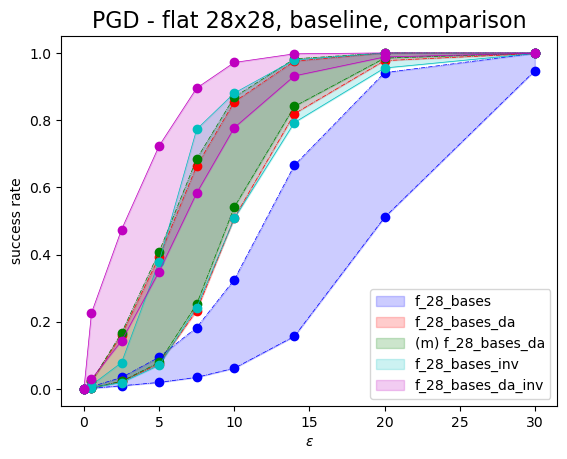

In [172]:
alpha = 0.2
plt.title('PGD - flat 28x28, baseline, comparison', fontsize=16)

for i in range(2):
    plt.plot(flat_28x28_baseline_params['epsilons'], get_min_max(flat_28x28_baseline_success_rate)[i], 'o-.', color='b', linewidth=0.5)
    
for i in range(2):
    plt.plot(flat_28x28_baseline_data_aug_params['epsilons'], get_min_max(flat_28x28_baseline_data_aug_success_rate)[i], 'o-.', color='r', linewidth=0.5)
    
for i in range(2):
    plt.plot(mixed_flat_28x28_baseline_params['epsilons'], get_min_max(mixed_flat_28x28_baseline_success_rate)[i], 'o-.', color='g', linewidth=0.5)
    
for i in range(2):
    plt.plot(flat_28x28_baseline_params_inv['epsilons'], get_min_max(flat_28x28_baseline_success_rate_inv)[i], 'o-', linewidth=0.5, color='c')
    
for i in range(2):
    plt.plot(flat_28x28_baseline_data_aug_params_inv['epsilons'], get_min_max(flat_28x28_baseline_data_aug_success_rate_inv)[i], 'o-', linewidth=0.5, color='m')
    
plt.fill_between(flat_28x28_baseline_params['epsilons'], *get_min_max(flat_28x28_baseline_success_rate), label=f"f_28_bases", color='b', alpha=alpha)
plt.fill_between(flat_28x28_baseline_data_aug_params['epsilons'], *get_min_max(flat_28x28_baseline_data_aug_success_rate), label=f"f_28_bases_da", color='r', alpha=alpha)
plt.fill_between(mixed_flat_28x28_baseline_params['epsilons'], *get_min_max(mixed_flat_28x28_baseline_success_rate), label=f"(m) f_28_bases_da", color='g', alpha=alpha)
plt.fill_between(flat_28x28_baseline_params_inv['epsilons'], *get_min_max(flat_28x28_baseline_success_rate_inv), label=f"f_28_bases_inv", color='c', alpha=alpha)
plt.fill_between(flat_28x28_baseline_data_aug_params_inv['epsilons'], *get_min_max(flat_28x28_baseline_data_aug_success_rate_inv), label=f"f_28_bases_da_inv", color='m', alpha=alpha)

plt.xlabel('$\epsilon$')
plt.ylabel('success rate')
plt.legend()
# plt.savefig('PGD.pdf', bbox_inches="tight")

plt.show()

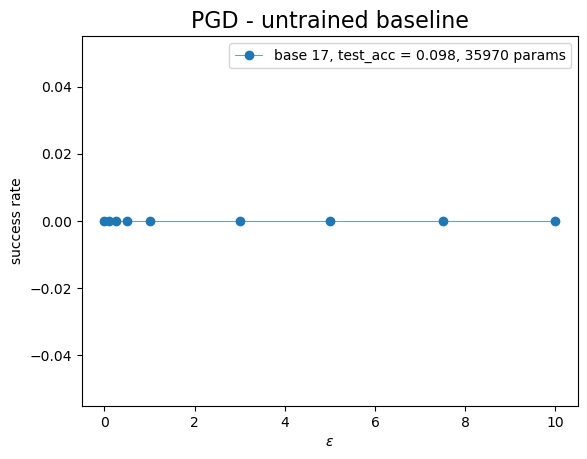

In [11]:
plt.title('PGD - untrained baseline', fontsize=16)
for i in [17]:
    plt.plot(baseline_params['epsilons'], baseline_success_rate[i], 'o-', linewidth=0.5, label=f"base {i}, test_acc = {baseline_clean_test_accs[i]:.{2}}, {baseline_total_params[i]} params")
plt.xlabel('$\epsilon$')
plt.ylabel('success rate')
plt.legend()

plt.show()

In [12]:
def get_probs(logits):
    softmax = torch.nn.Softmax(dim=-1)
    return softmax(logits)

In [13]:
baseline_probs = get_probs(baseline_logits)
S2CNN_probs = get_probs(S2CNN_logits)

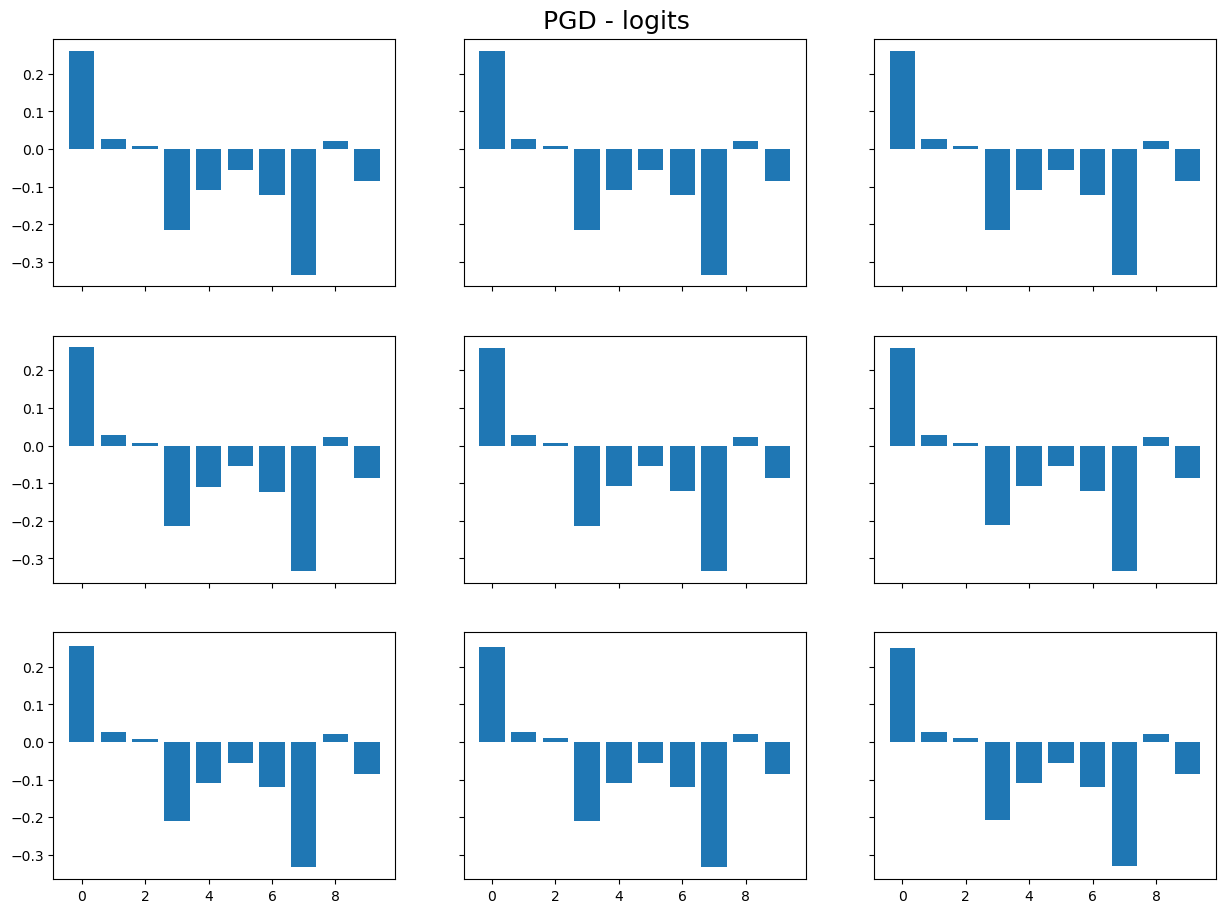

In [21]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize = (15, 10), sharex=True, sharey=True, gridspec_kw={'wspace':0.2, 'hspace':0.2})
plt.suptitle('PGD - logits', fontsize=18)
plt.subplots_adjust(top=0.95)

for i in range(9):
    axs[i//3,i%3].bar(torch.arange(10), baseline_logits[-1,i,3])

plt.show()

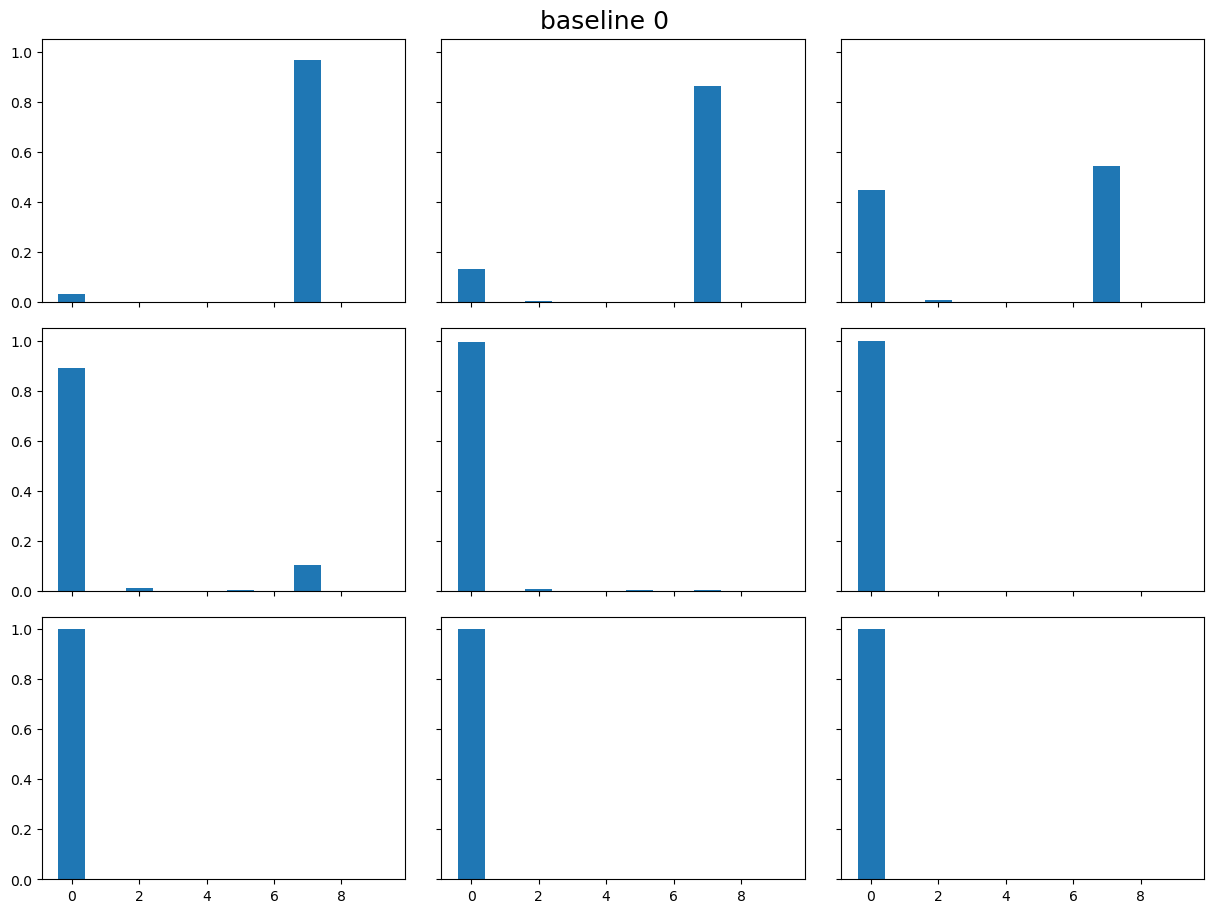

In [24]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize = (15, 10), sharex=True, sharey=True, gridspec_kw={'wspace':0.1, 'hspace':0.1})
plt.suptitle(f'baseline 0', fontsize=18)
plt.subplots_adjust(top=0.95)
for i in range(9):
    axs[i//3,i%3].bar(torch.arange(10), baseline_probs[0,i,0])
    
# plt.savefig('PGD_bl_probs.pdf', bbox_inches="tight")
plt.show()

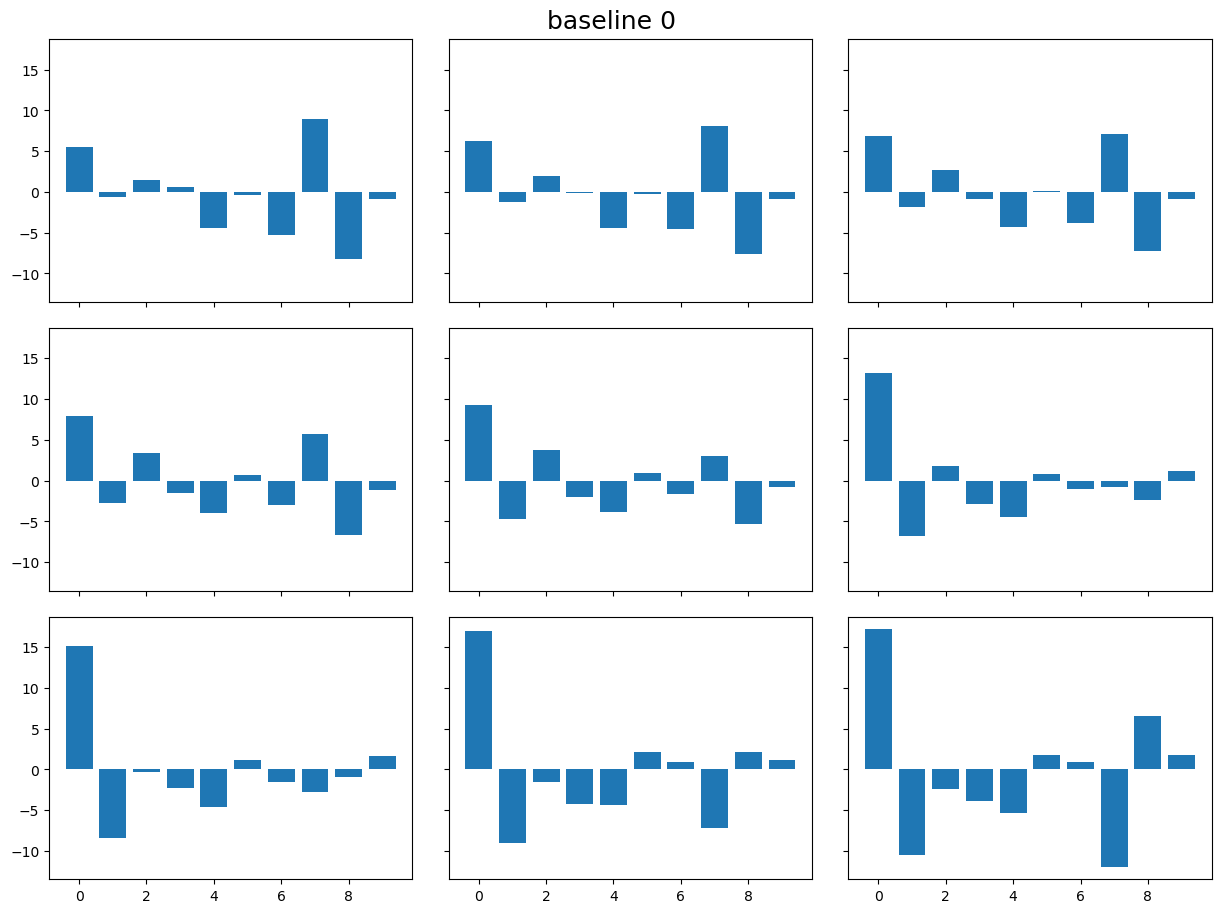

In [26]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize = (15, 10), sharex=True, sharey=True, gridspec_kw={'wspace':0.1, 'hspace':0.1})
plt.suptitle(f'baseline 0', fontsize=18)
plt.subplots_adjust(top=0.95)
for i in range(9):
    axs[i//3,i%3].bar(torch.arange(10), baseline_logits[0,i,0])
    
# plt.savefig('PGD_bl_logits.pdf', bbox_inches="tight")
plt.show()

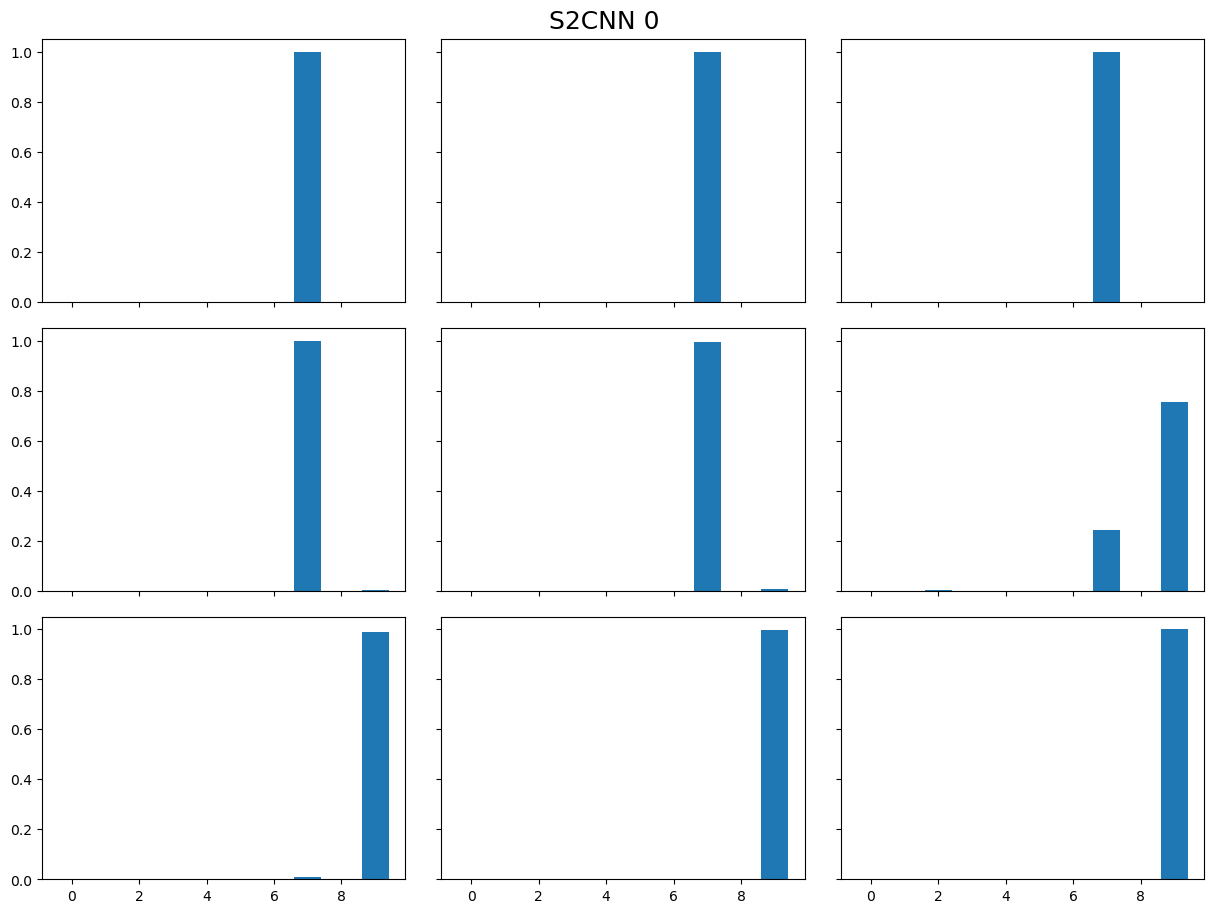

In [27]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize = (15, 10), sharex=True, sharey=True, gridspec_kw={'wspace':0.1, 'hspace':0.1})
plt.suptitle(f'S2CNN 0', fontsize=18)
plt.subplots_adjust(top=0.95)
for i in range(9):
    axs[i//3,i%3].bar(torch.arange(10), S2CNN_probs[0,i,0])
    
# plt.savefig('PGD_S2CNN_probs.pdf', bbox_inches="tight")
plt.show()

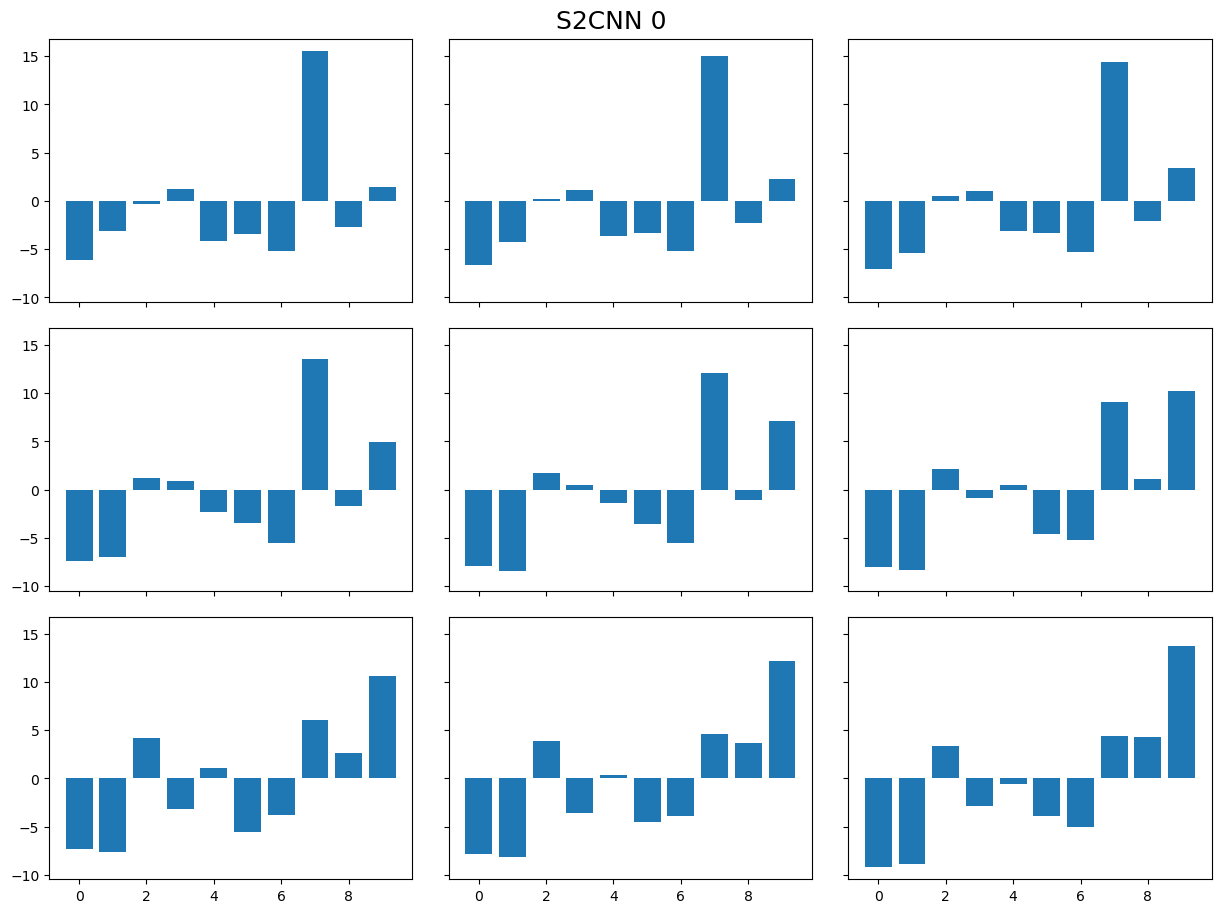

In [52]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize = (15, 10), sharex=True, sharey=True, gridspec_kw={'wspace':0.1, 'hspace':0.1})
plt.suptitle(f'S2CNN 0', fontsize=18)
plt.subplots_adjust(top=0.95)
for i in range(9):
    axs[i//3,i%3].bar(torch.arange(10), S2CNN_logits[0,i,0])
    
# plt.savefig('PGD_S2CNN_logits.pdf', bbox_inches="tight")
plt.show()

In [29]:
def show_prob_plot(probs, n, m, model_type='baseline'):
    fig, axs = plt.subplots(nrows=3, ncols=3, figsize = (15, 15), sharex=True, sharey=True, gridspec_kw={'wspace':0.1, 'hspace':0.1})
    plt.suptitle(f'{model_type} {n}', fontsize=18)
    plt.subplots_adjust(top=0.95)
    for i in range(9):
        axs[i//3,i%3].bar(torch.arange(10), baseline_probs[n,i,m])
        
    plt.show()

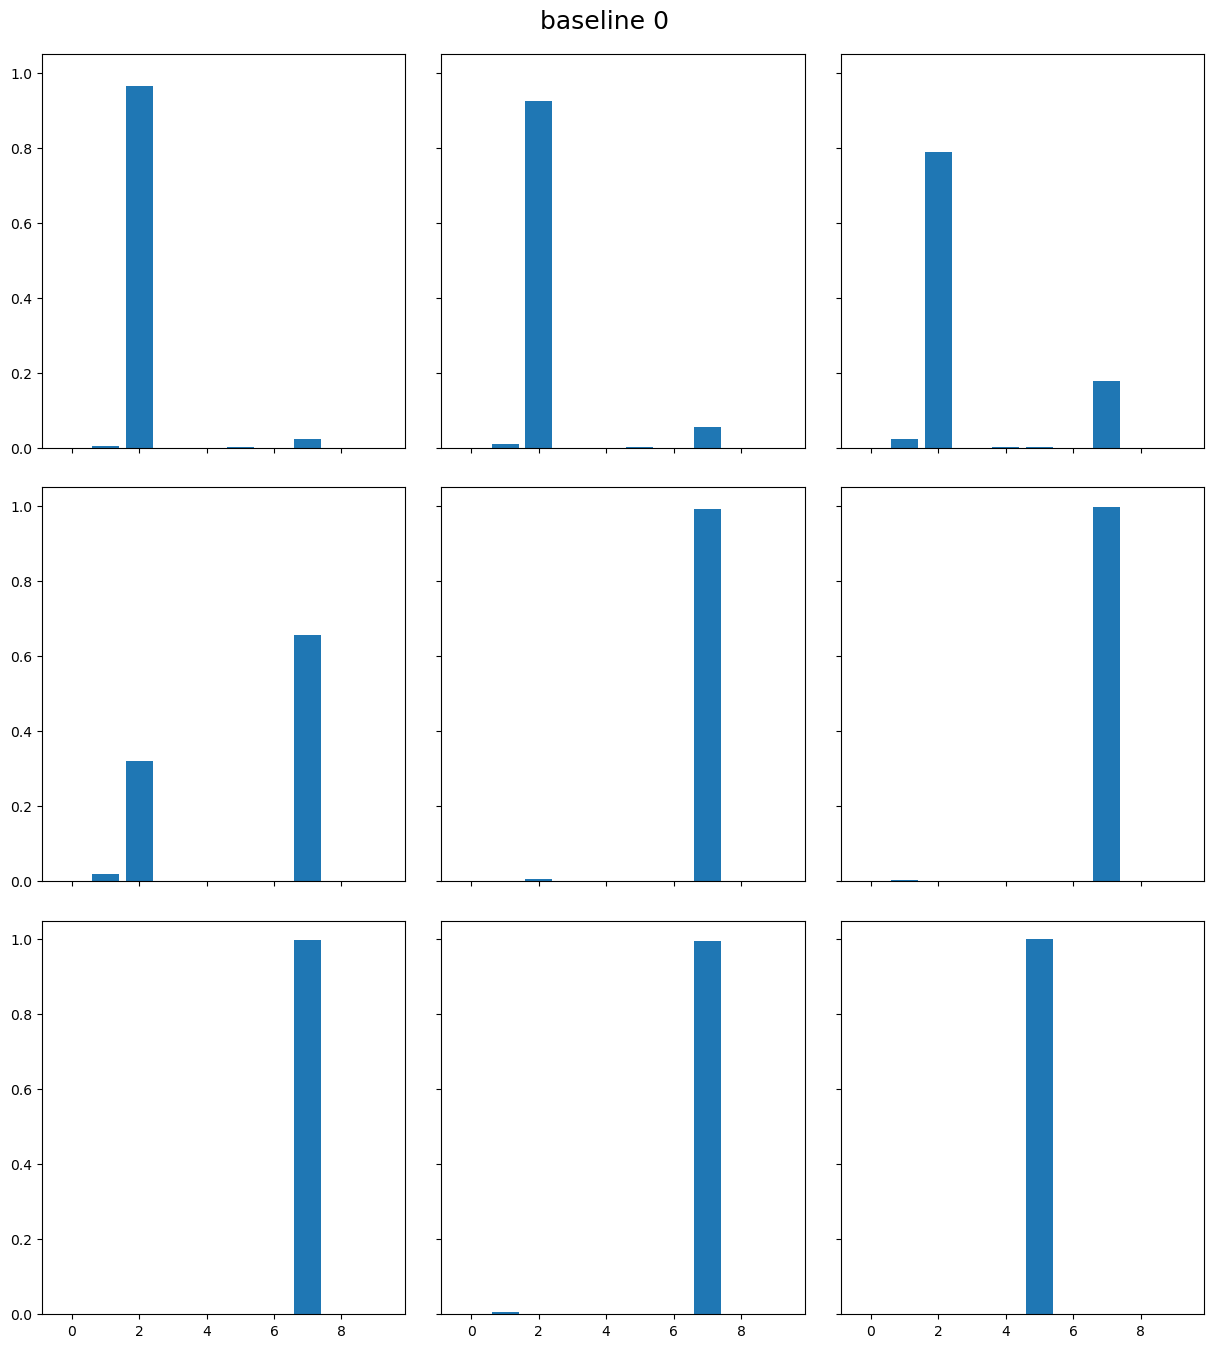

In [30]:
show_prob_plot(baseline_probs, 0, 1)

In [31]:
def kl_div_all(probs):
    kl_loss = torch.nn.KLDivLoss(reduction='none')
    kl_losses = torch.stack([kl_loss(torch.log(probs[:,i]), probs[:,0]) for i in range(probs.size(1))])
    return torch.sum(kl_losses, dim=-1).permute(1,0,2)

In [32]:
def kl_div(probs, n):
    kl_loss = torch.nn.KLDivLoss(reduction='none')
    kl_losses = torch.stack([kl_loss(torch.log(probs[n,i]), probs[n,0]) for i in range(probs[n].size(0))])
    return torch.sum(kl_losses, dim=-1)

In [33]:
kl_divs_2 = kl_div_all(baseline_probs)

In [34]:
kl_divs = kl_div(baseline_probs, 0)

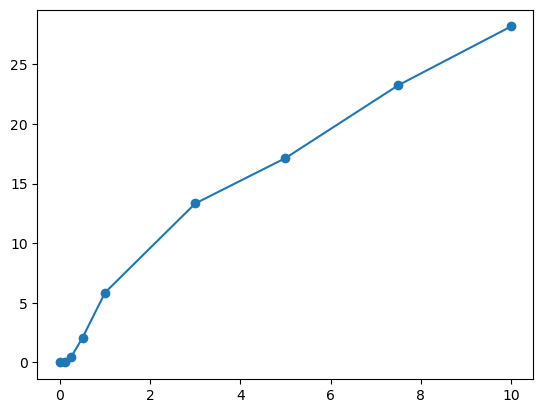

In [35]:
plt.plot(baseline_params['epsilons'], kl_divs[:,0], 'o-')
plt.show()

In [36]:
std, mean = torch.std_mean(kl_divs, dim=1)

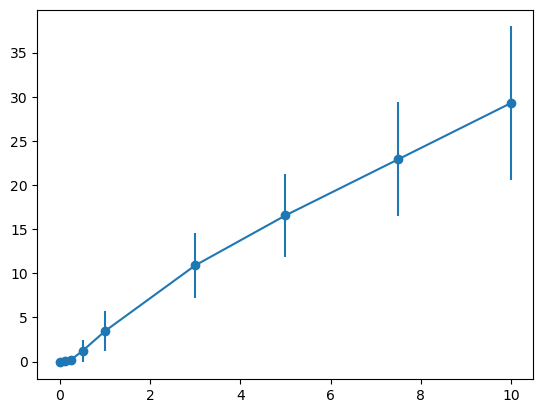

In [37]:
plt.errorbar(baseline_params['epsilons'], mean, yerr=std, linestyle='-', marker='o')
plt.show()

In [38]:
# ignore infinities during the calculation of mean and std
def std_mean(tensor, dim):
    if torch.all(torch.isfinite(tensor)):
        std, mean = torch.std_mean(tensor, dim)
    else:
        mean = torch.as_tensor(np.mean(np.ma.masked_invalid(tensor), axis=dim), dtype=torch.float32)
        std = torch.as_tensor(np.std(np.ma.masked_invalid(tensor), axis=dim), dtype=torch.float32)
    return std, mean

In [39]:
kl_div_bl10 = kl_div(baseline_probs, 10)
kl_div_S20 = kl_div(S2CNN_probs, 0)

In [40]:
std_bl10, mean_bl10 = std_mean(kl_div_bl10, dim=1)
std_S20, mean_S20 = std_mean(kl_div_S20, dim=1)

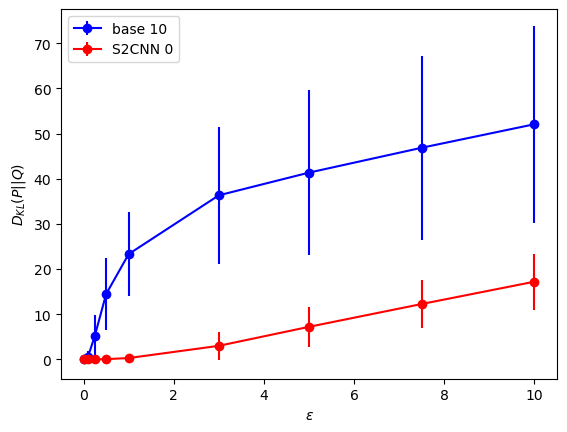

In [41]:
plt.errorbar(baseline_params['epsilons'], mean_bl10, yerr=std_bl10, linestyle='-', marker='o', color='b', label='base 10')
plt.errorbar(S2CNN_params['epsilons'], mean_S20, yerr=std_S20, linestyle='-', marker='o', color='r', label='S2CNN 0')
plt.xlabel('$\epsilon$')
plt.ylabel('$D_{KL}(P||Q)$')
plt.legend(loc='upper left')
# plt.savefig('KL_div.pdf', bbox_inches="tight")
plt.show()

In [42]:
def show_nine_images(images, params, preds, n, m, title='baseline', vmin=0, vmax=255):
    fig, axs = plt.subplots(nrows=3, ncols=3, figsize = (15, 15), sharex=True, sharey=True, gridspec_kw={'wspace':0.1, 'hspace':0.1})
    plt.suptitle(f'{title} {n}', fontsize=18)
    plt.subplots_adjust(top=0.95)
    for i in range(3):
        axs[0,i].imshow(images[n][i,m,0], cmap='gray', vmin=vmin, vmax=vmax)
        axs[0,i].set_title(f"$\epsilon$ = {params['epsilons'][i]}")
        axs[0,i].set_ylabel(f"pred: {preds[n][i,m].item()}")
        axs[0,i].set_xticks([])
        axs[0,i].set_yticks([])

    for i in range(3,6):
        axs[1,i-3].imshow(images[n][i,m,0], cmap='gray', vmin=vmin, vmax=vmax)
        axs[1,i-3].set_title(f"$\epsilon$ = {params['epsilons'][i]}")
        axs[1,i-3].set_ylabel(f"pred: {preds[n][i,m]}")

    for i in range(6,9):
        axs[2,i-6].imshow(images[n][i,m,0], cmap='gray', vmin=vmin, vmax=vmax)
        axs[2,i-6].set_title(f"$\epsilon$ = {params['epsilons'][i]}")
        axs[2,i-6].set_ylabel(f"pred: {preds[n][i,m]}")
    plt.show()

In [43]:
def show_differences(images, params, preds, n, m, title='baseline', vmin=-10, vmax=10):
    fig, axs = plt.subplots(nrows=3, ncols=3, figsize = (15, 15), sharex=True, sharey=True, gridspec_kw={'wspace':0.1, 'hspace':0.1})
    plt.suptitle(f'{title} {n}', fontsize=18)
    plt.subplots_adjust(top=0.95)
    for i in range(3):
        axs[0,i].imshow(images[n][i,m,0]-images[n][0,m,0], cmap='gray', vmin=vmin, vmax=vmax)
        axs[0,i].set_title(f"$\epsilon$ = {params['epsilons'][i]}")
        axs[0,i].set_ylabel(f"pred: {preds[n][i,m]}")
        axs[0,i].set_xticks([])
        axs[0,i].set_yticks([])

    for i in range(3,6):
        axs[1,i-3].imshow(images[n][i,m,0]-images[n][0,m,0], cmap='gray', vmin=vmin, vmax=vmax)
        axs[1,i-3].set_title(f"$\epsilon$ = {params['epsilons'][i]}")
        axs[1,i-3].set_ylabel(f"pred: {preds[n][i,m]}")

    for i in range(6,9):
        axs[2,i-6].imshow(images[n][i,m,0]-images[n][0,m,0], cmap='gray', vmin=vmin, vmax=vmax)
        axs[2,i-6].set_title(f"$\epsilon$ = {params['epsilons'][i]}")
        axs[2,i-6].set_ylabel(f"pred: {preds[n][i,m]}")
    plt.show()

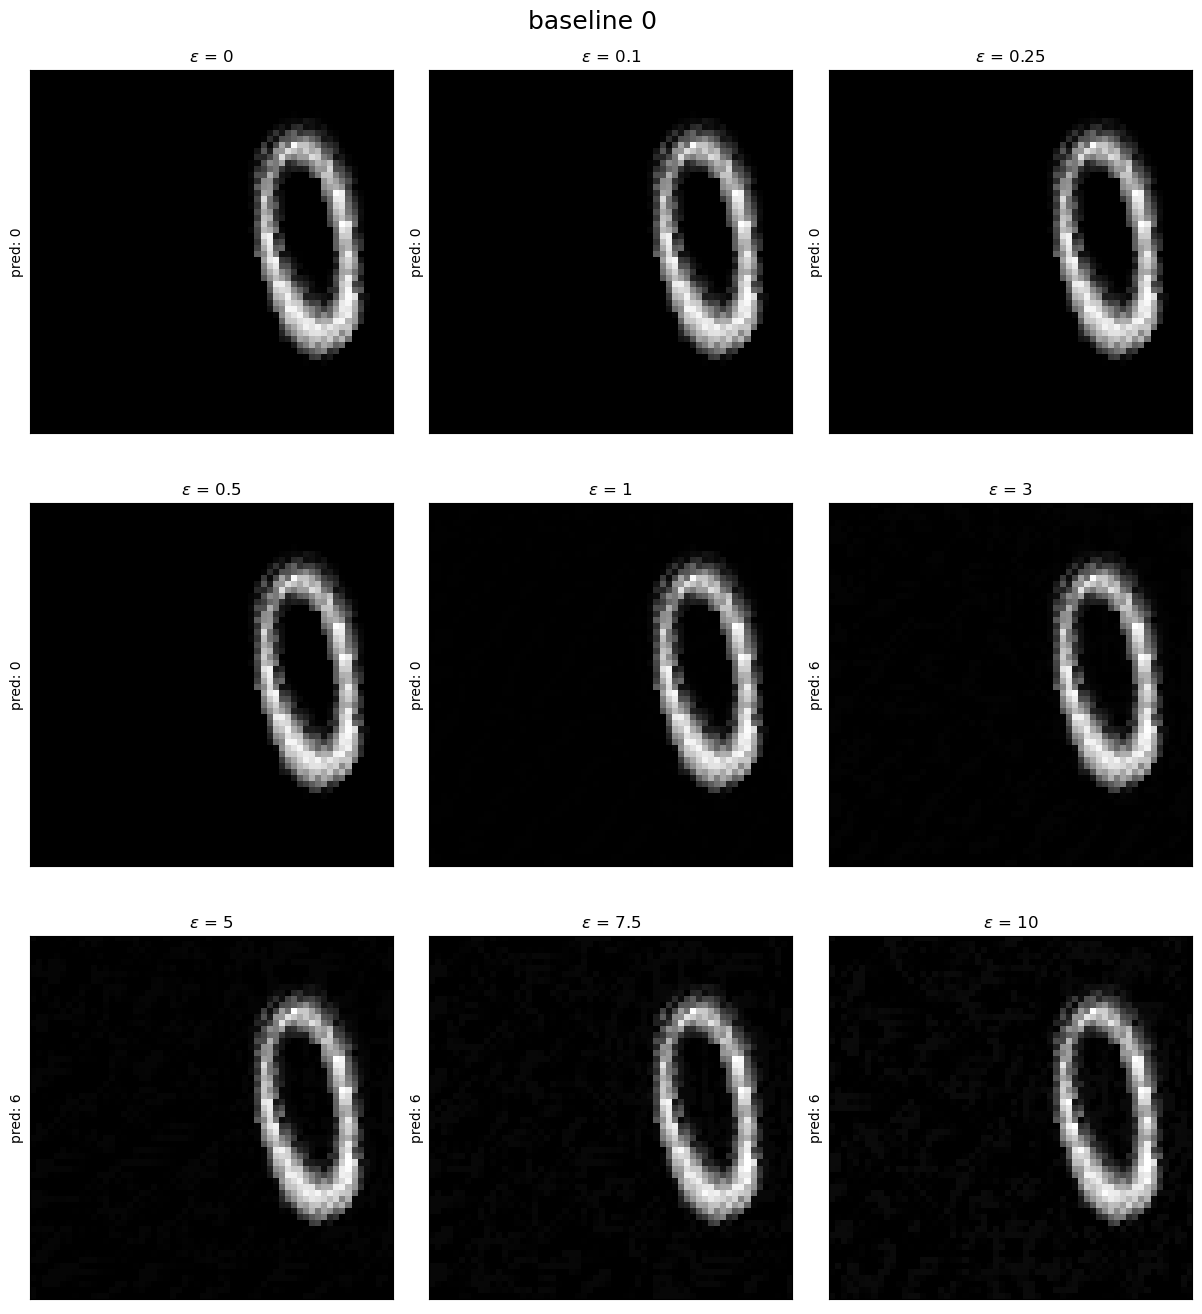

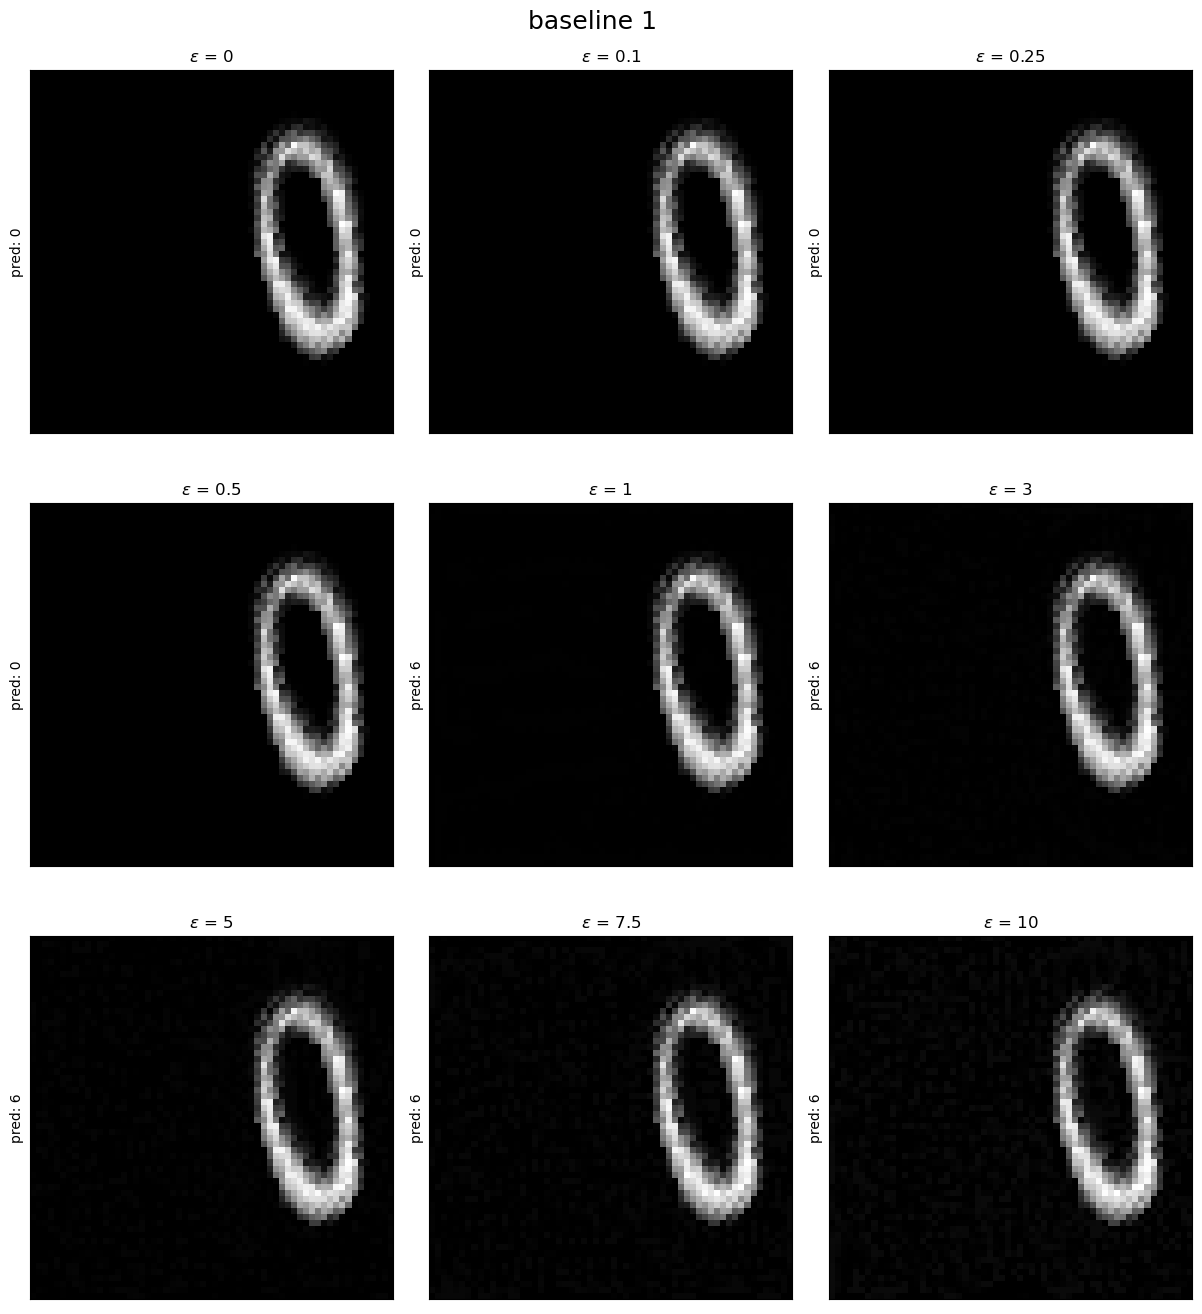

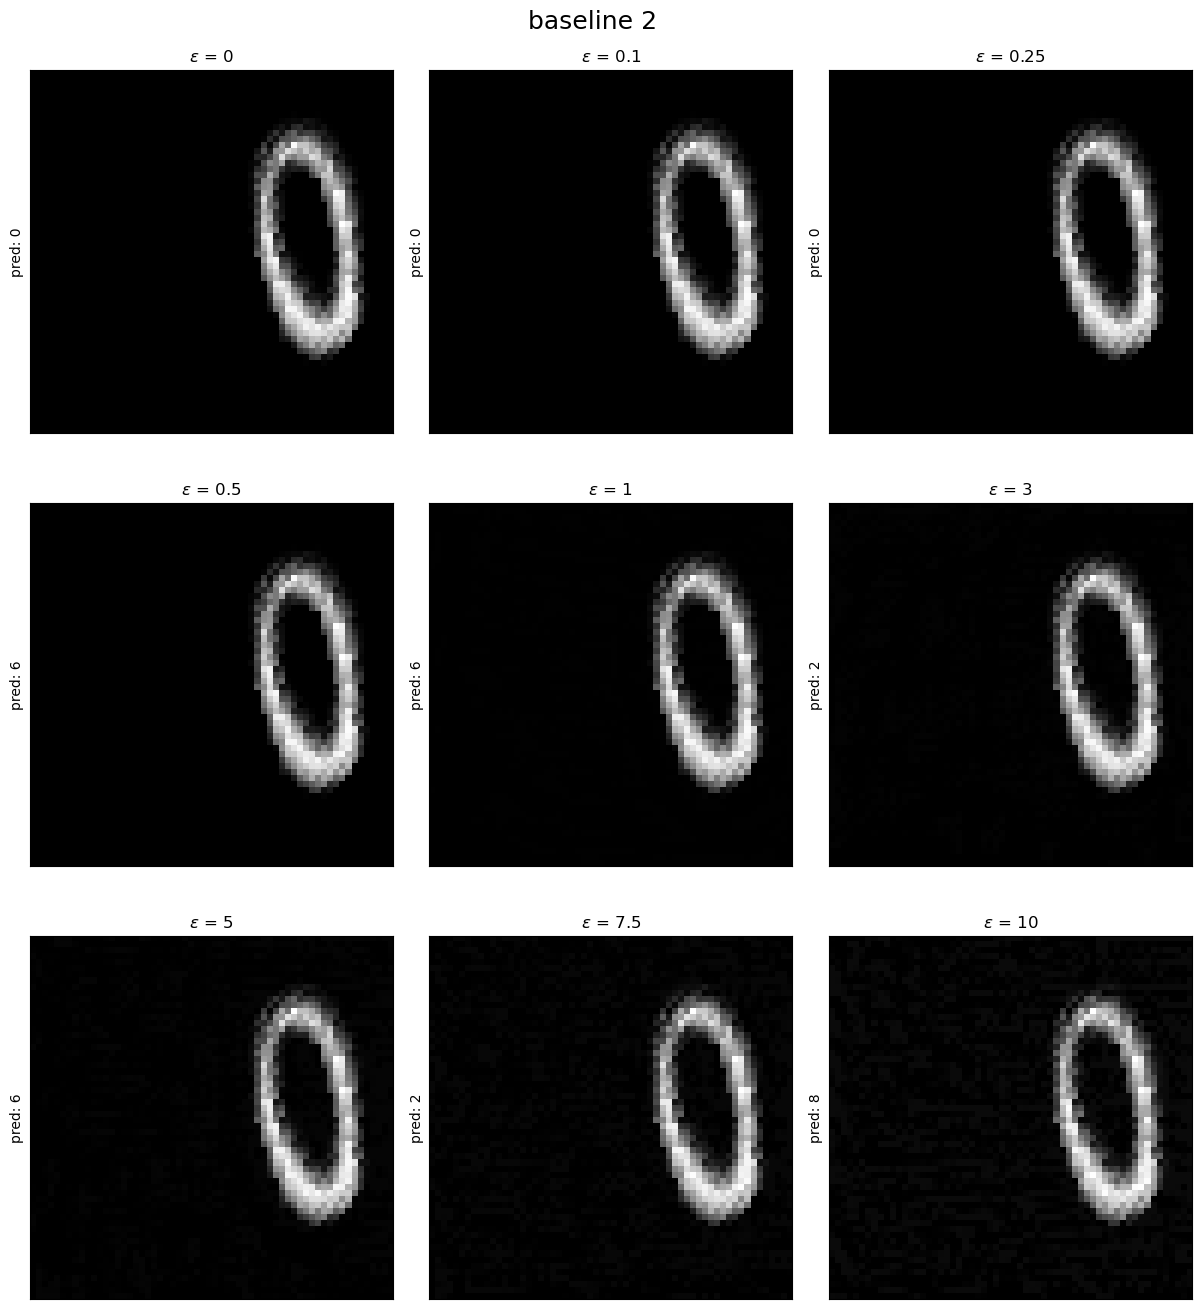

In [44]:
for i in range(3):
    show_nine_images(baseline_images, baseline_params, baseline_preds, i, 2)

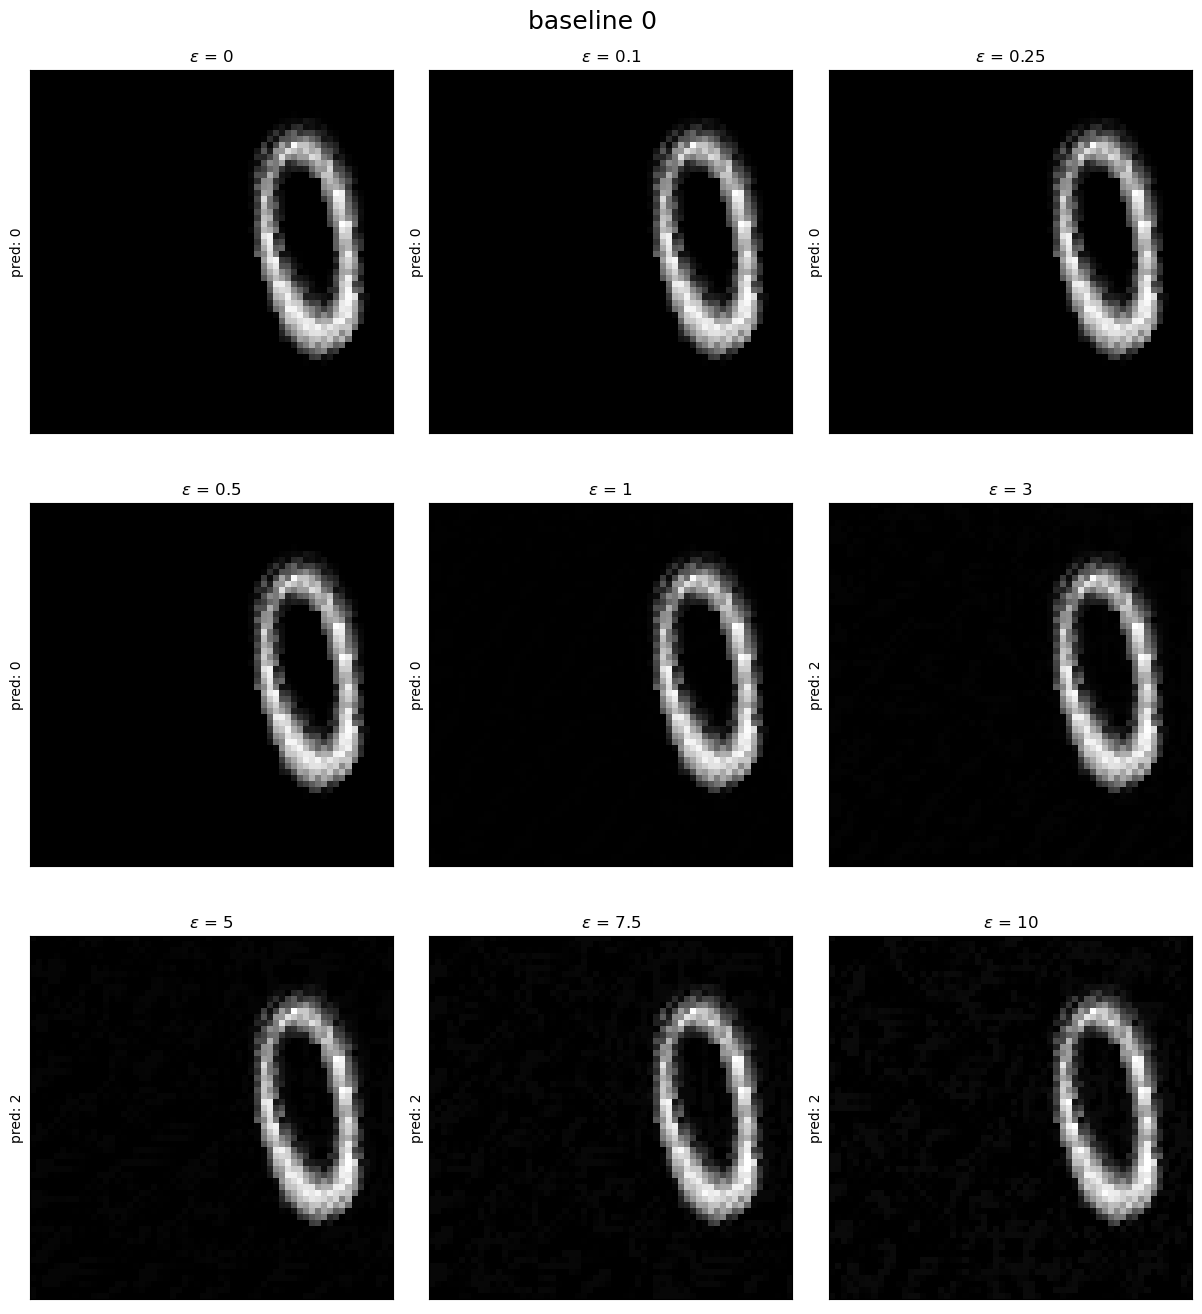

In [45]:
show_nine_images(baseline_images, S2CNN_params, S2CNN_preds, 0, 2)

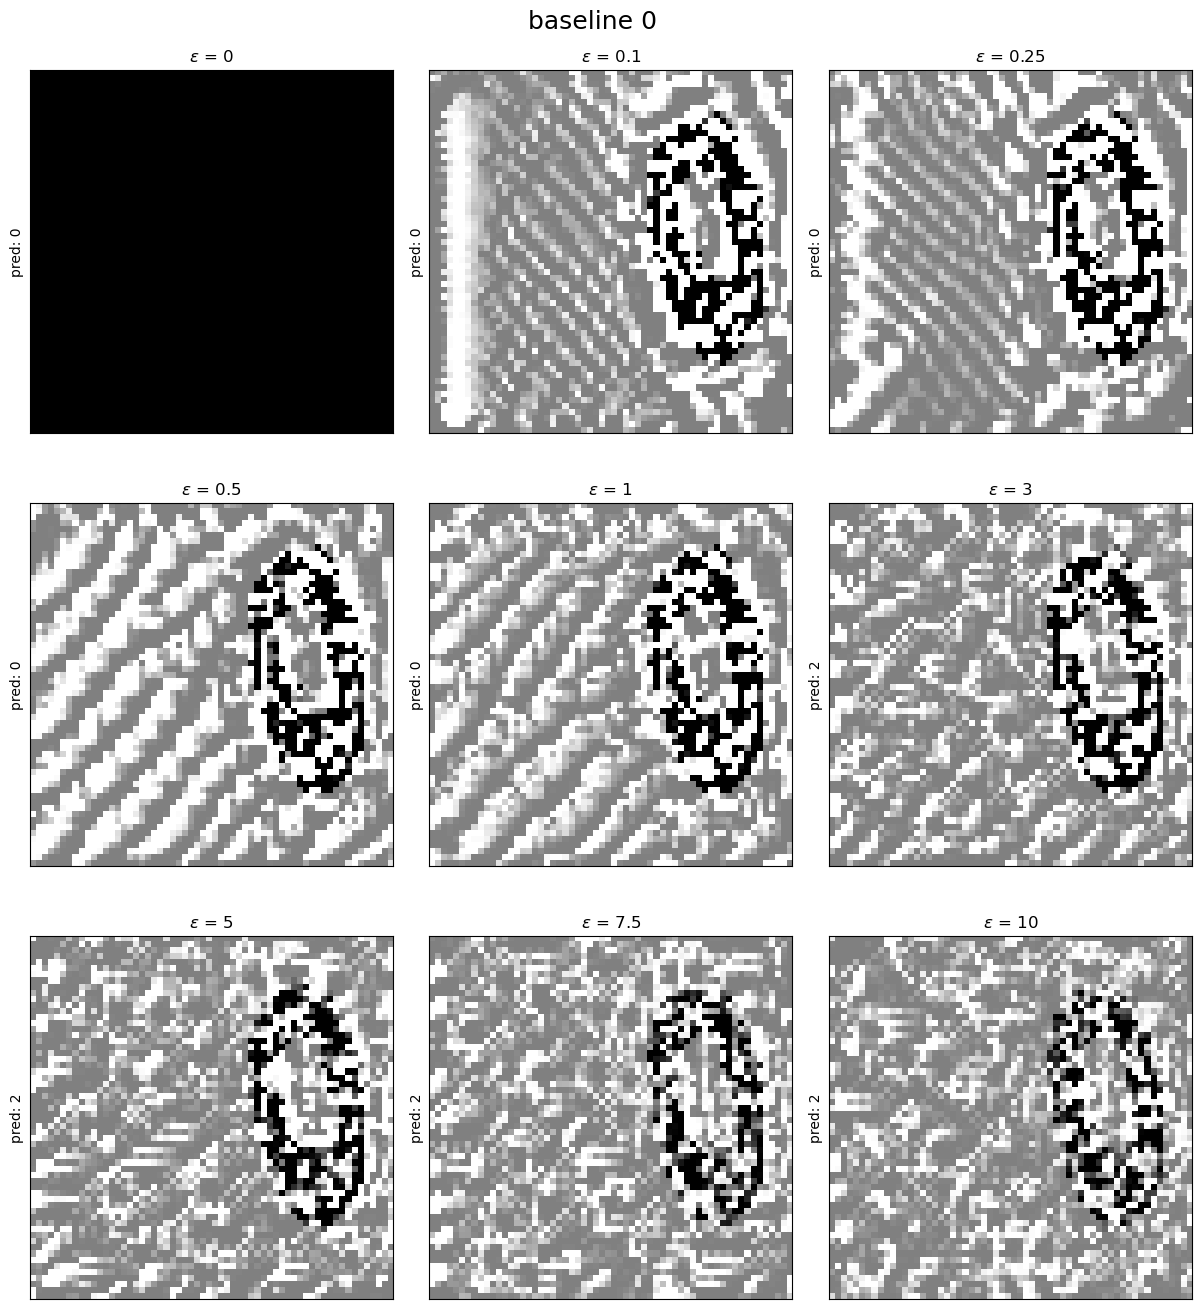

In [46]:
show_differences(baseline_images, S2CNN_params, S2CNN_preds, 0, 2, vmin=None, vmax=None)

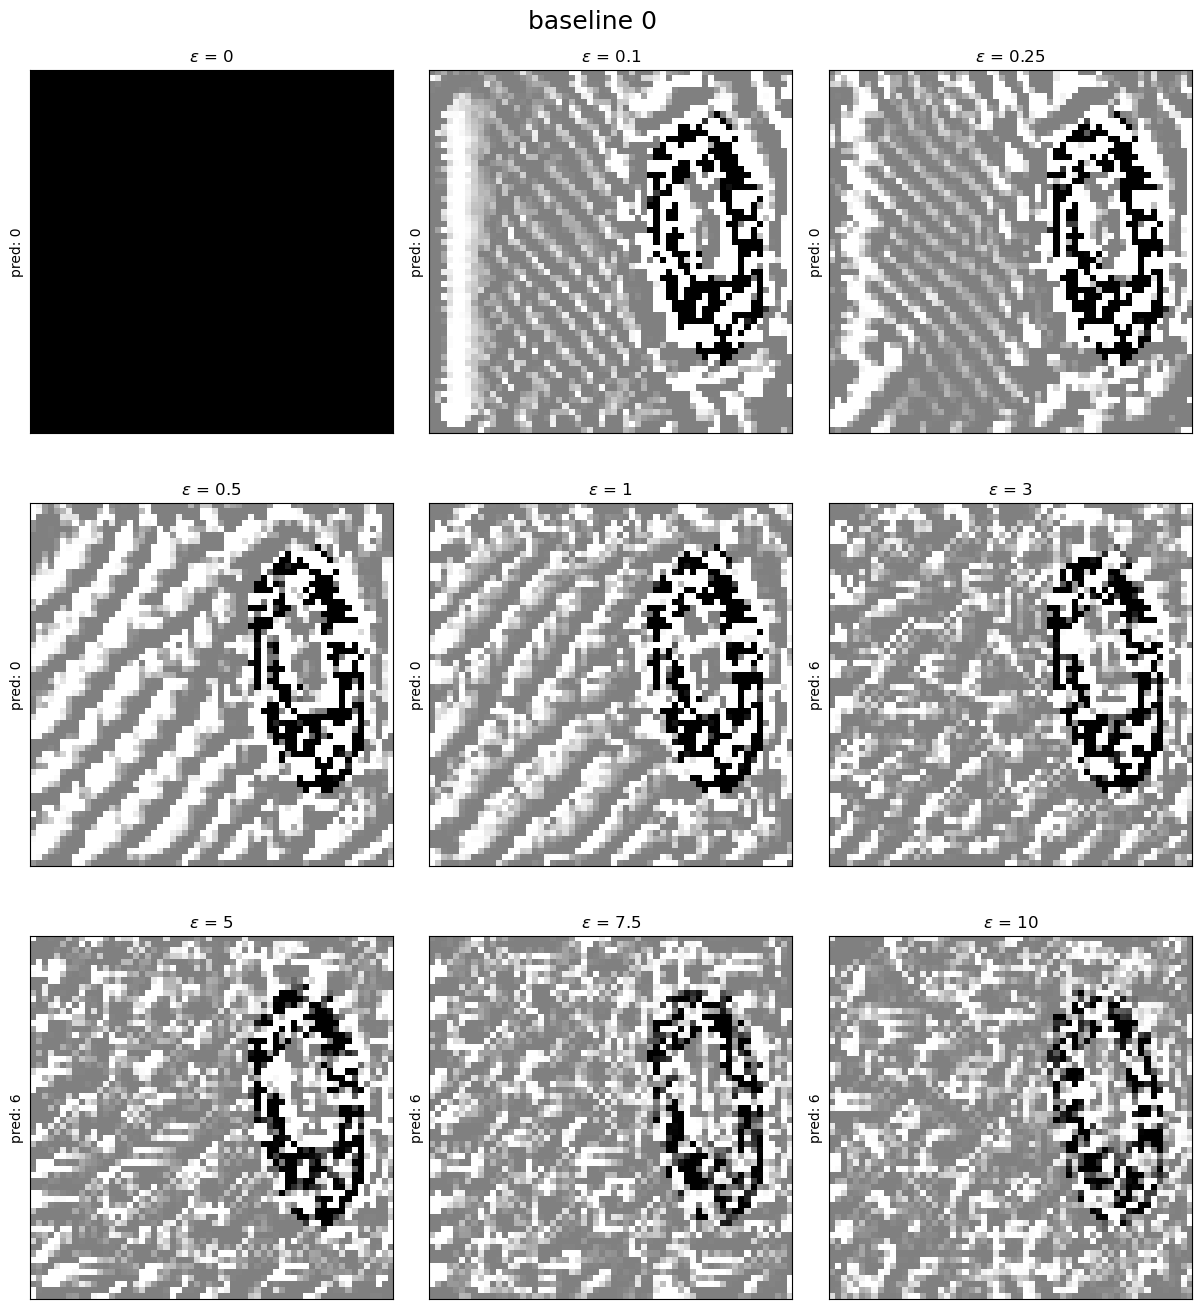

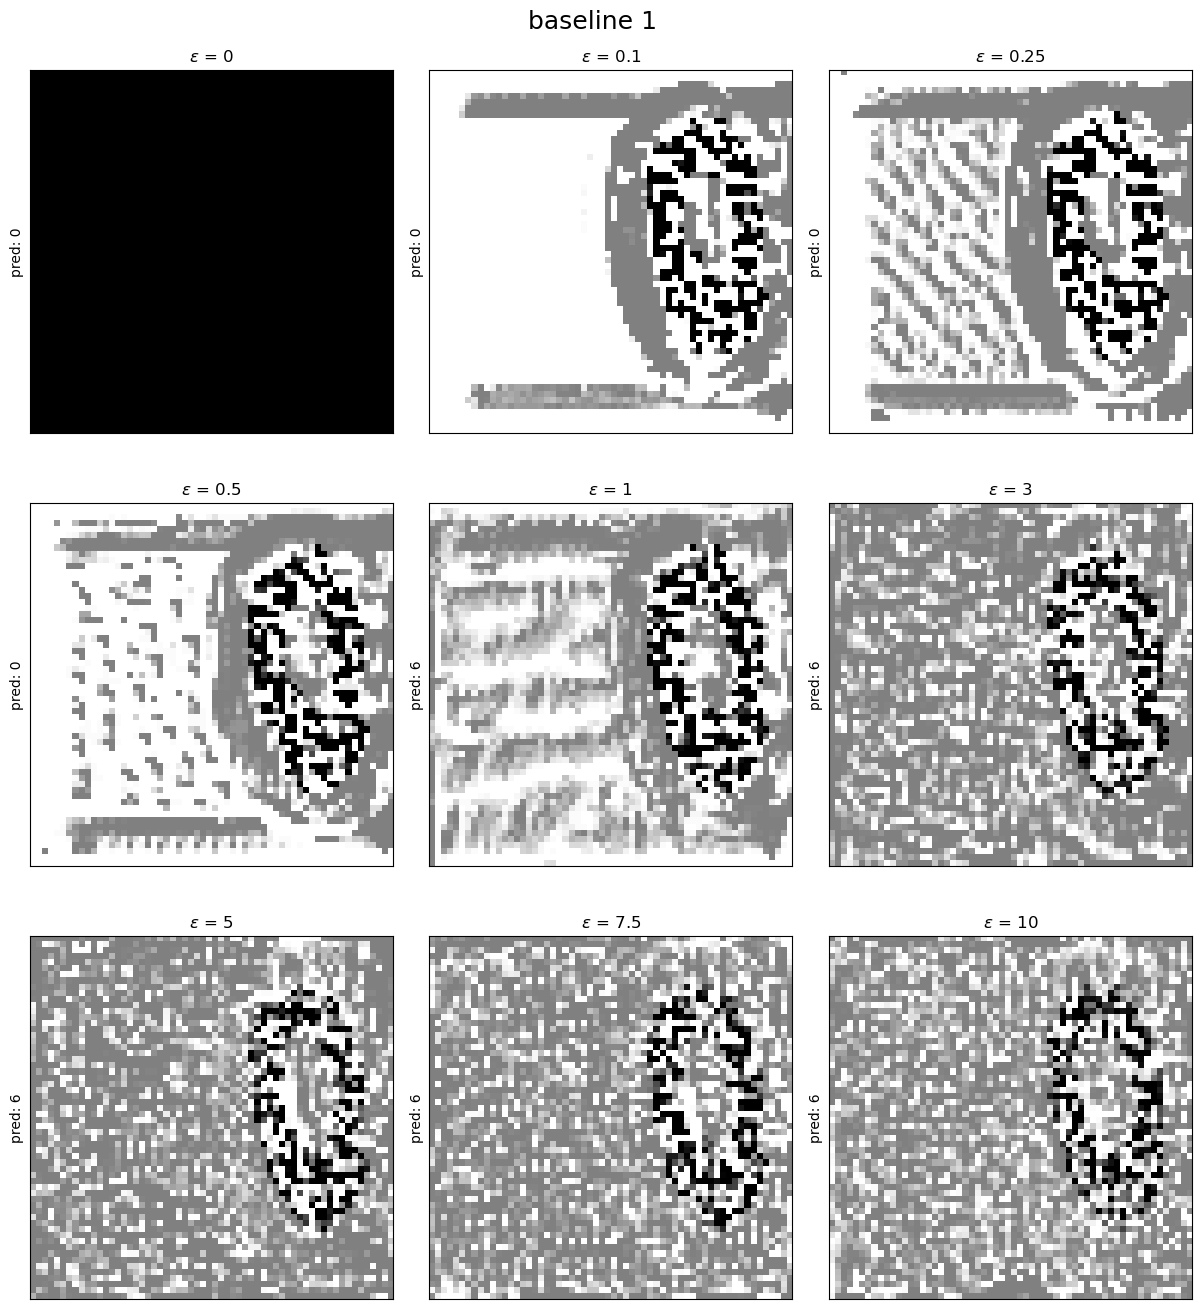

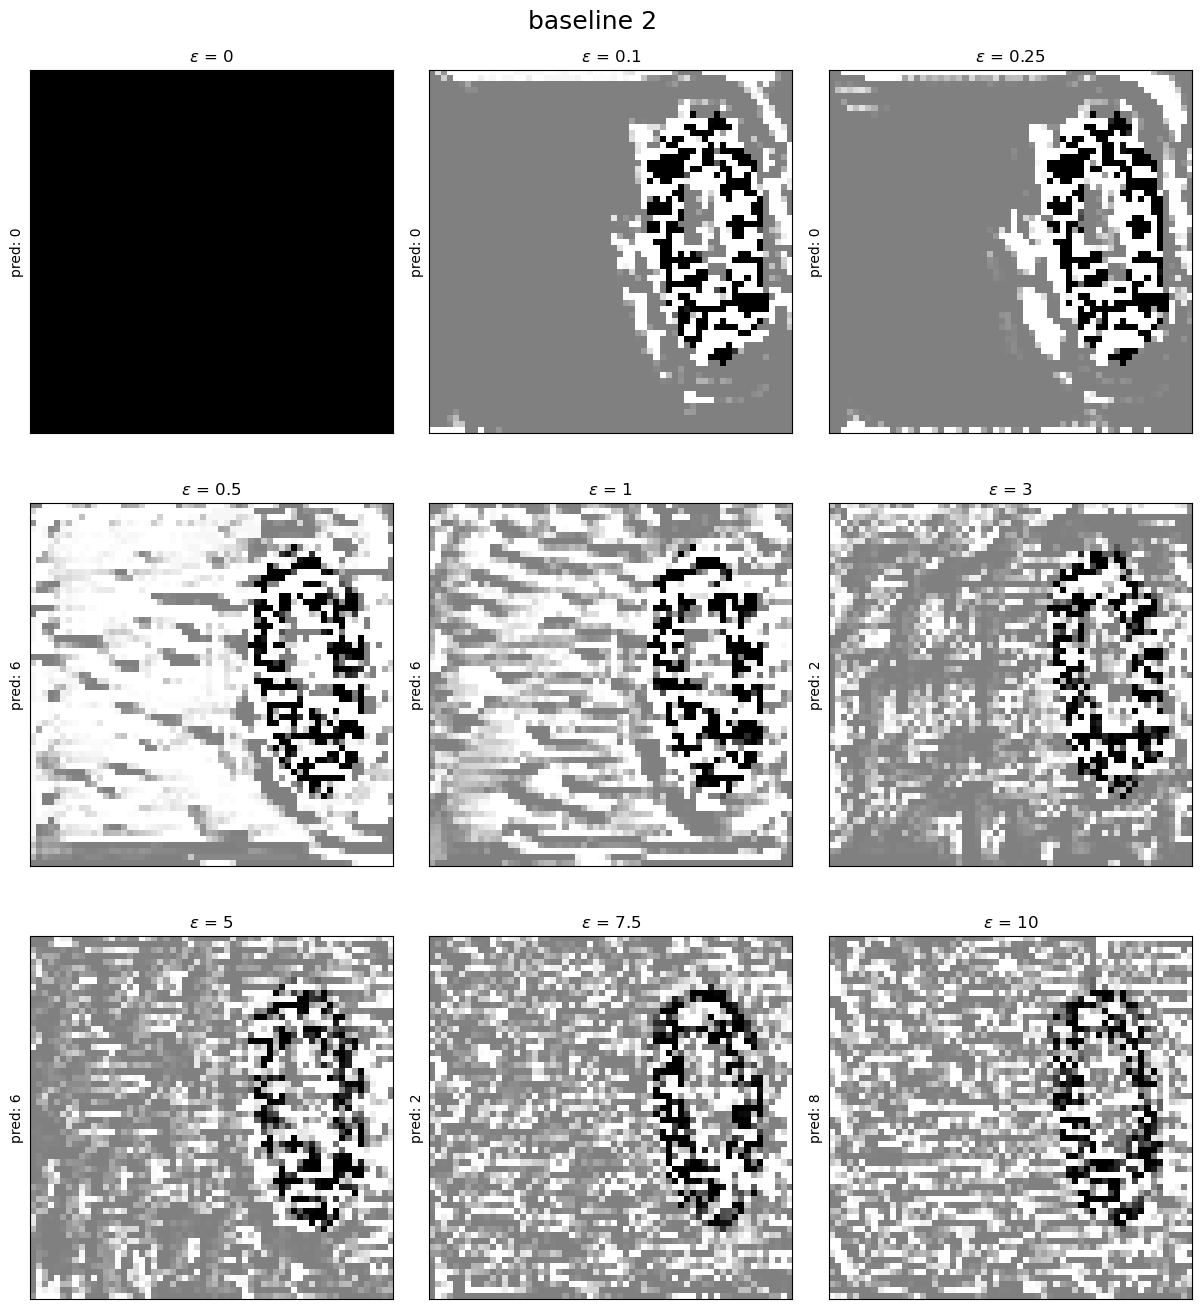

In [47]:
for i in range(3):
    show_differences(baseline_images, baseline_params, baseline_preds, i, 2, vmin=None, vmax=None)

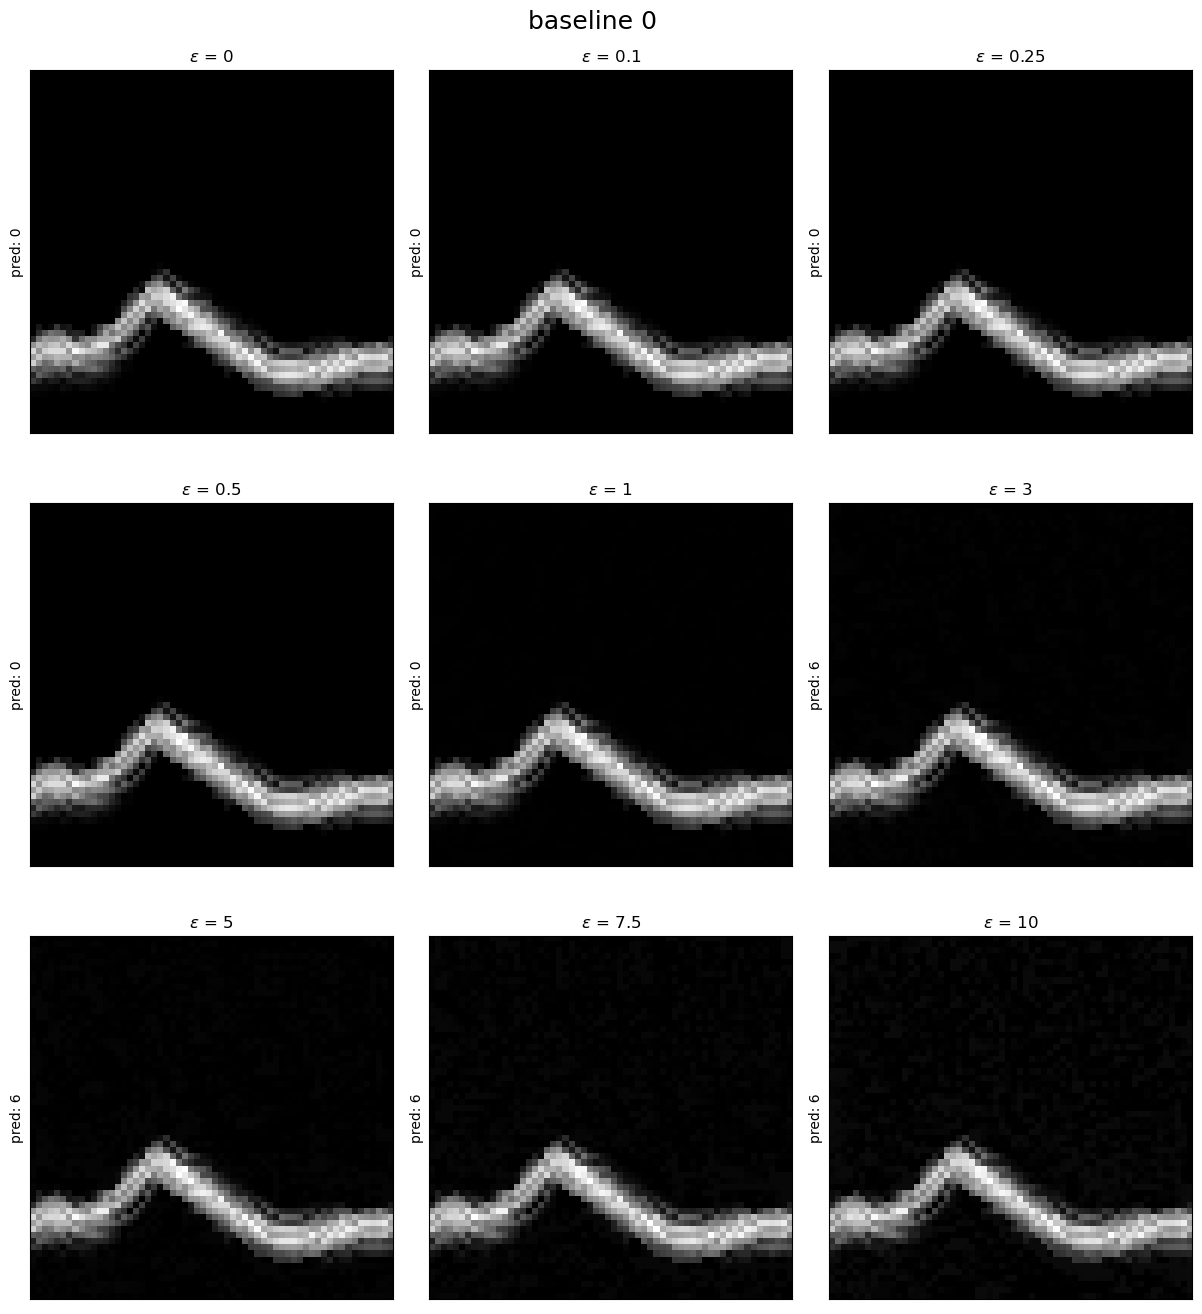

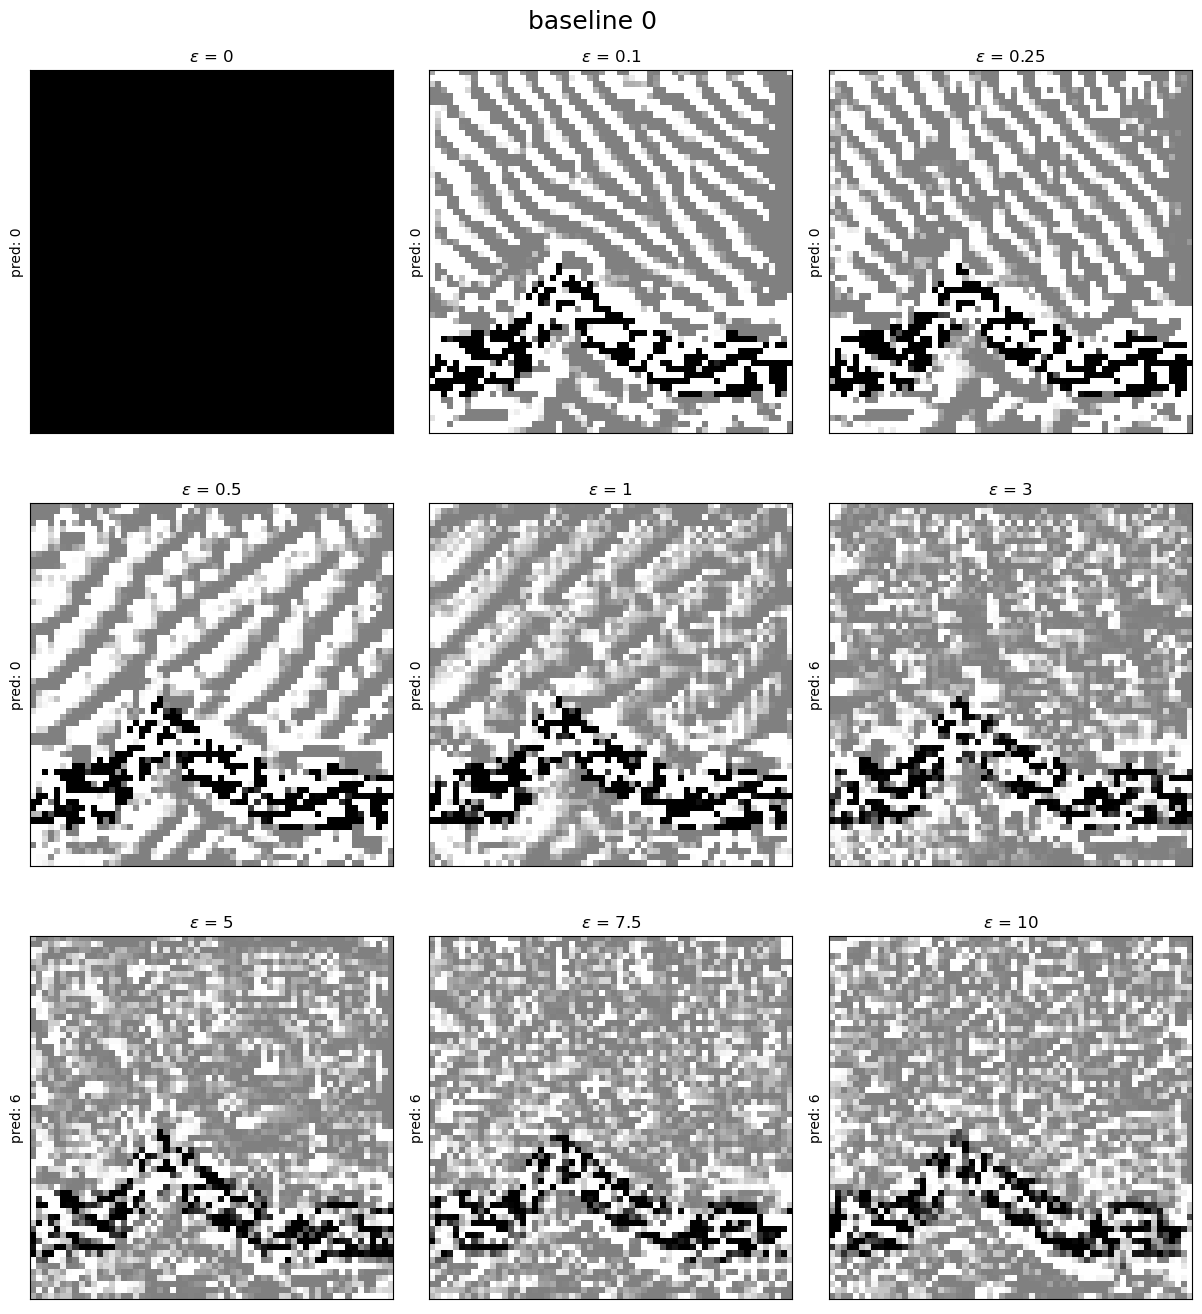

In [48]:
show_nine_images(baseline_images, baseline_params, baseline_preds, 0, 1, vmin=None, vmax=None)
show_differences(baseline_images, baseline_params, baseline_preds, 0, 1, vmin=None, vmax=None)

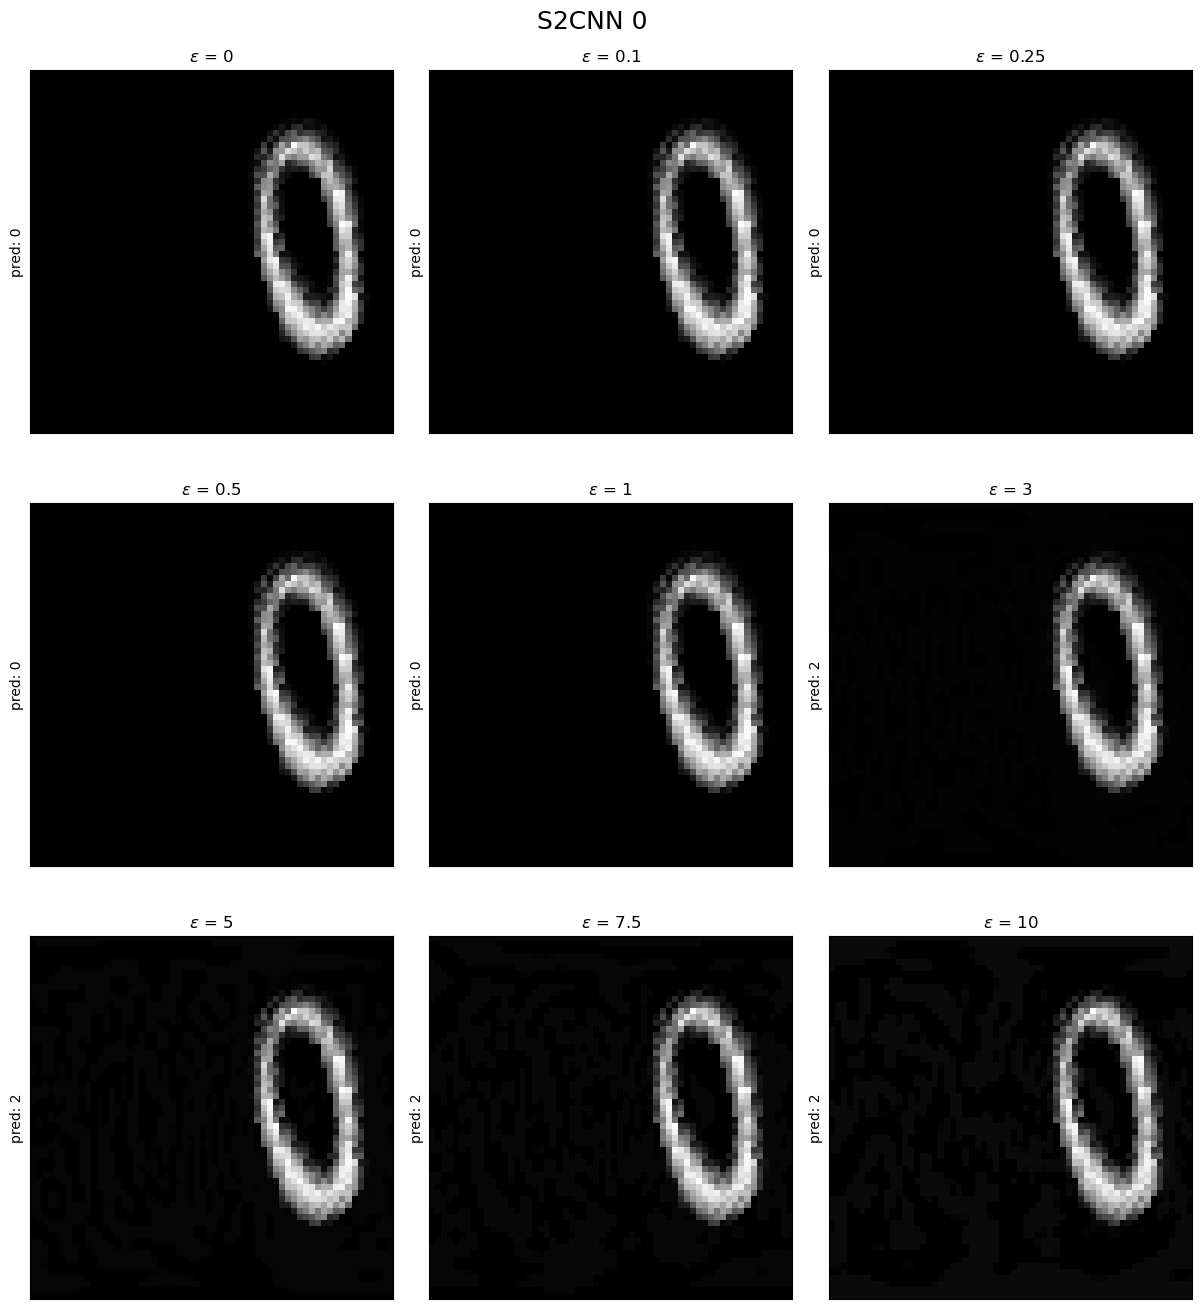

In [49]:
show_nine_images(S2CNN_images, S2CNN_params, S2CNN_preds, 0, 2, title='S2CNN')

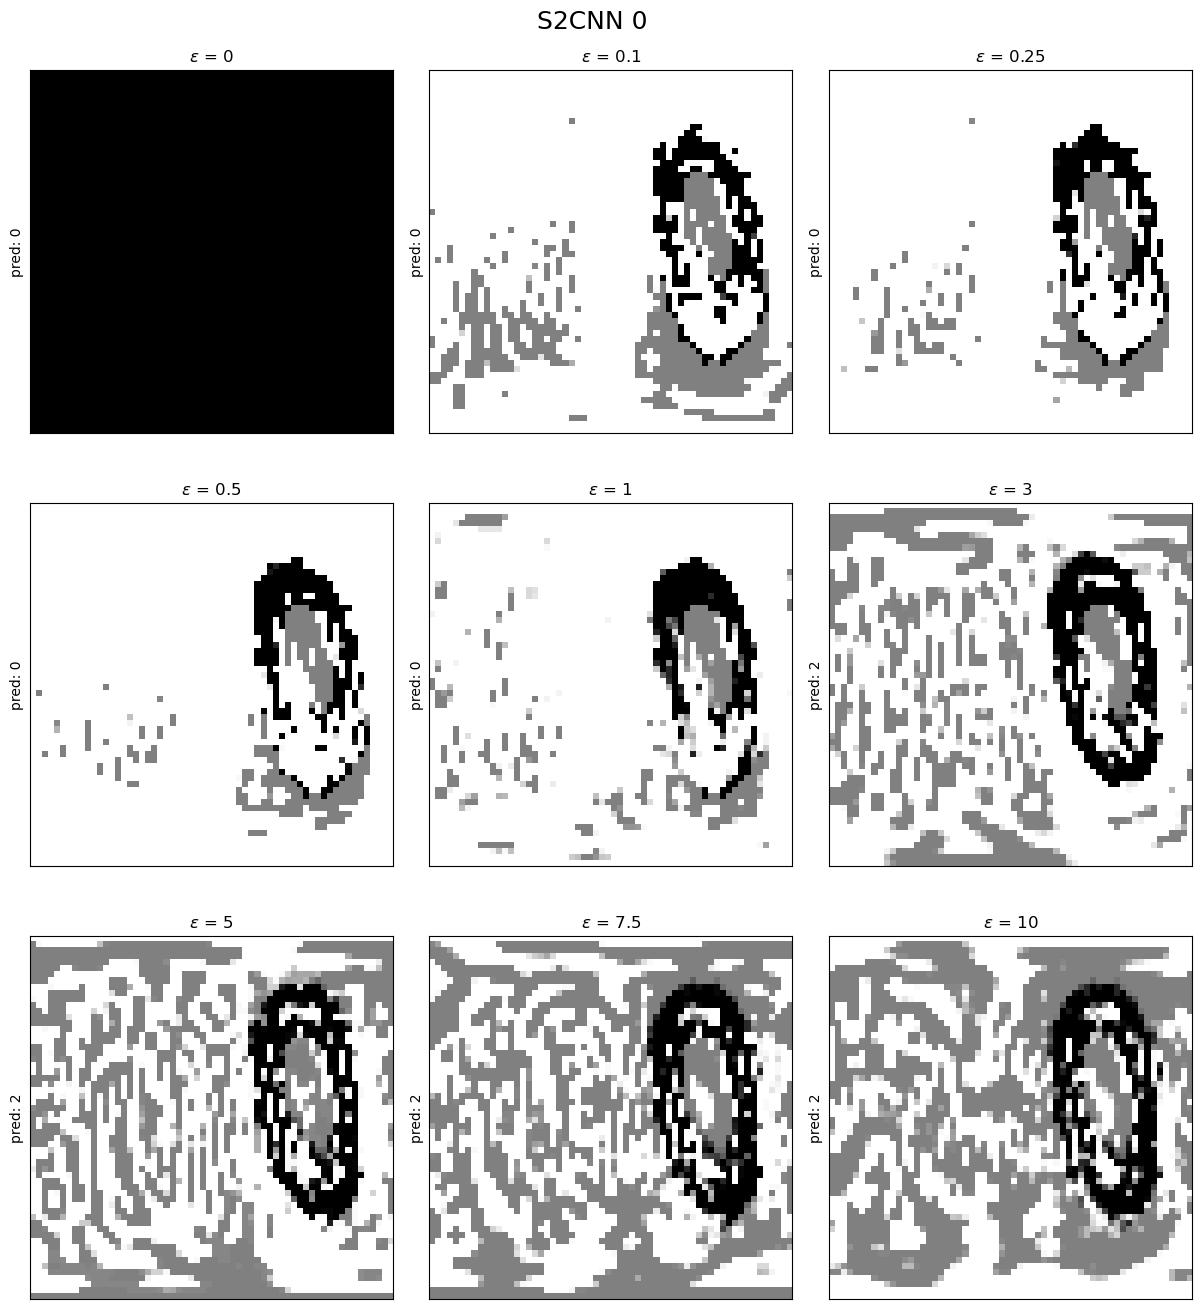

In [50]:
show_differences(S2CNN_images, S2CNN_params, S2CNN_preds, 0, 2, title='S2CNN', vmin=None, vmax=None)

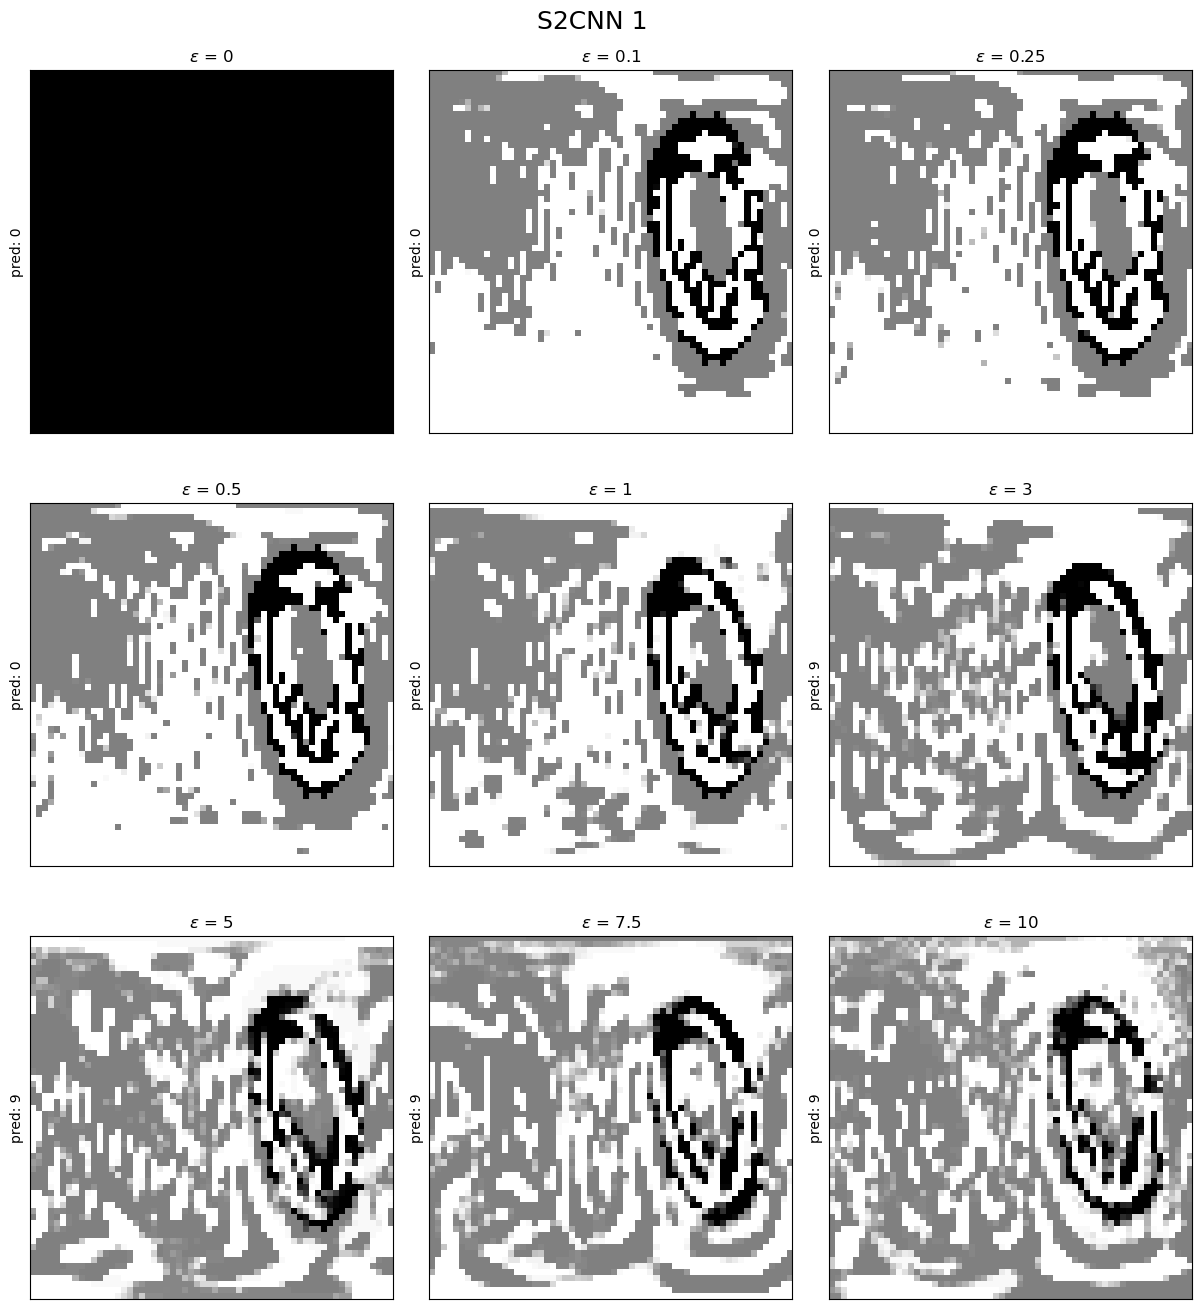

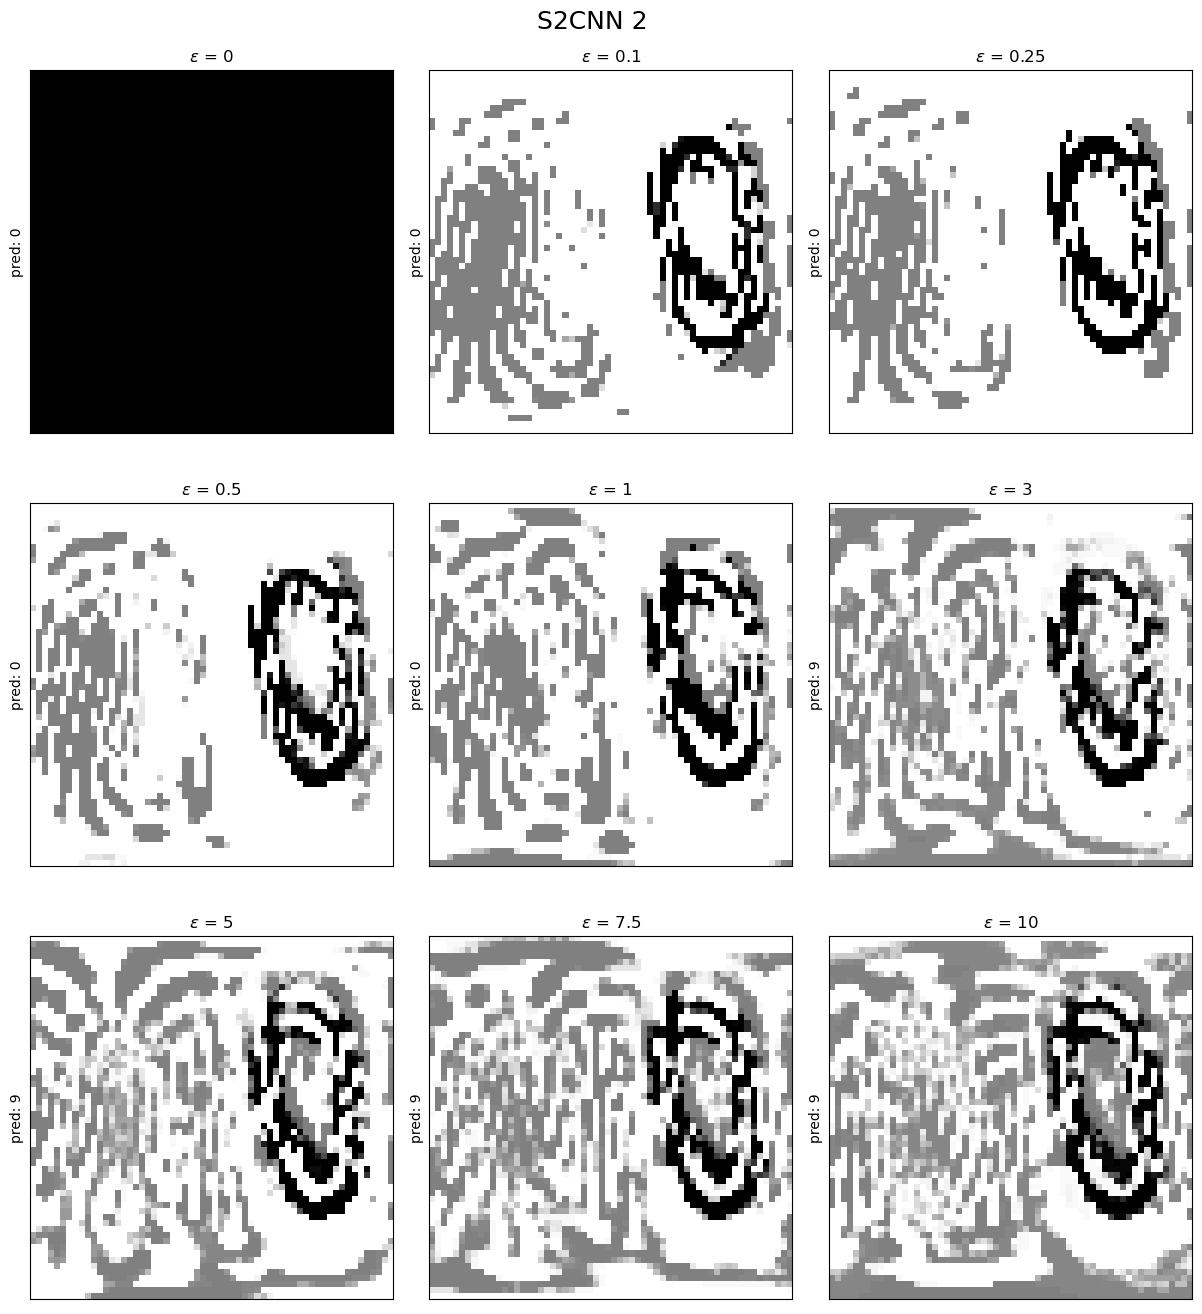

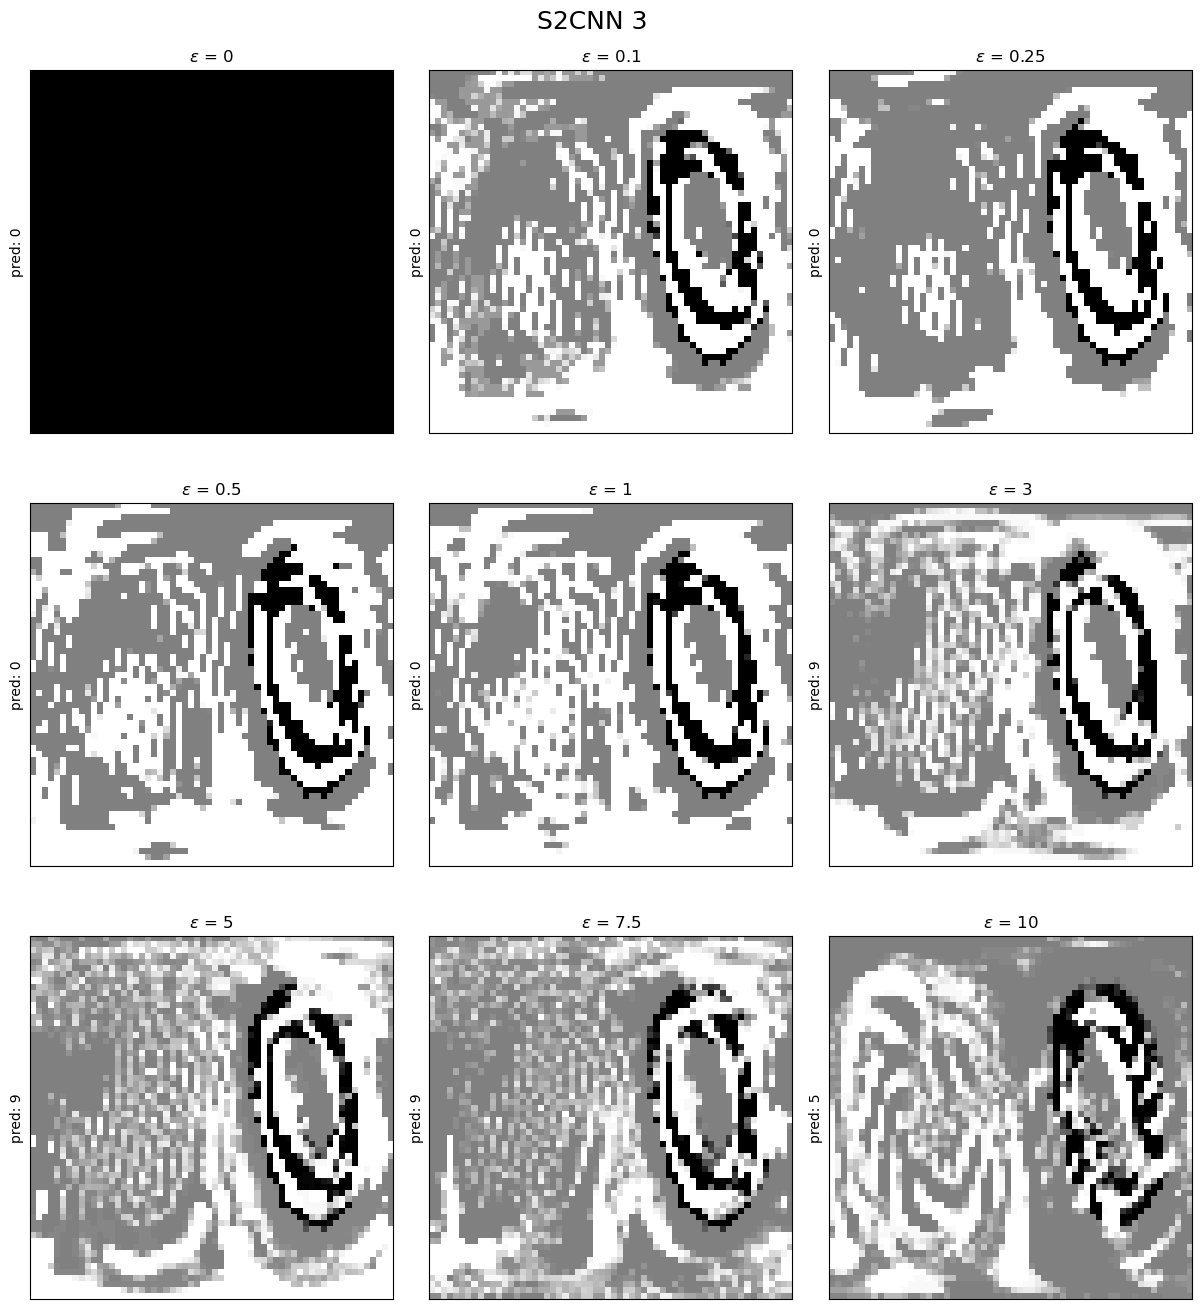

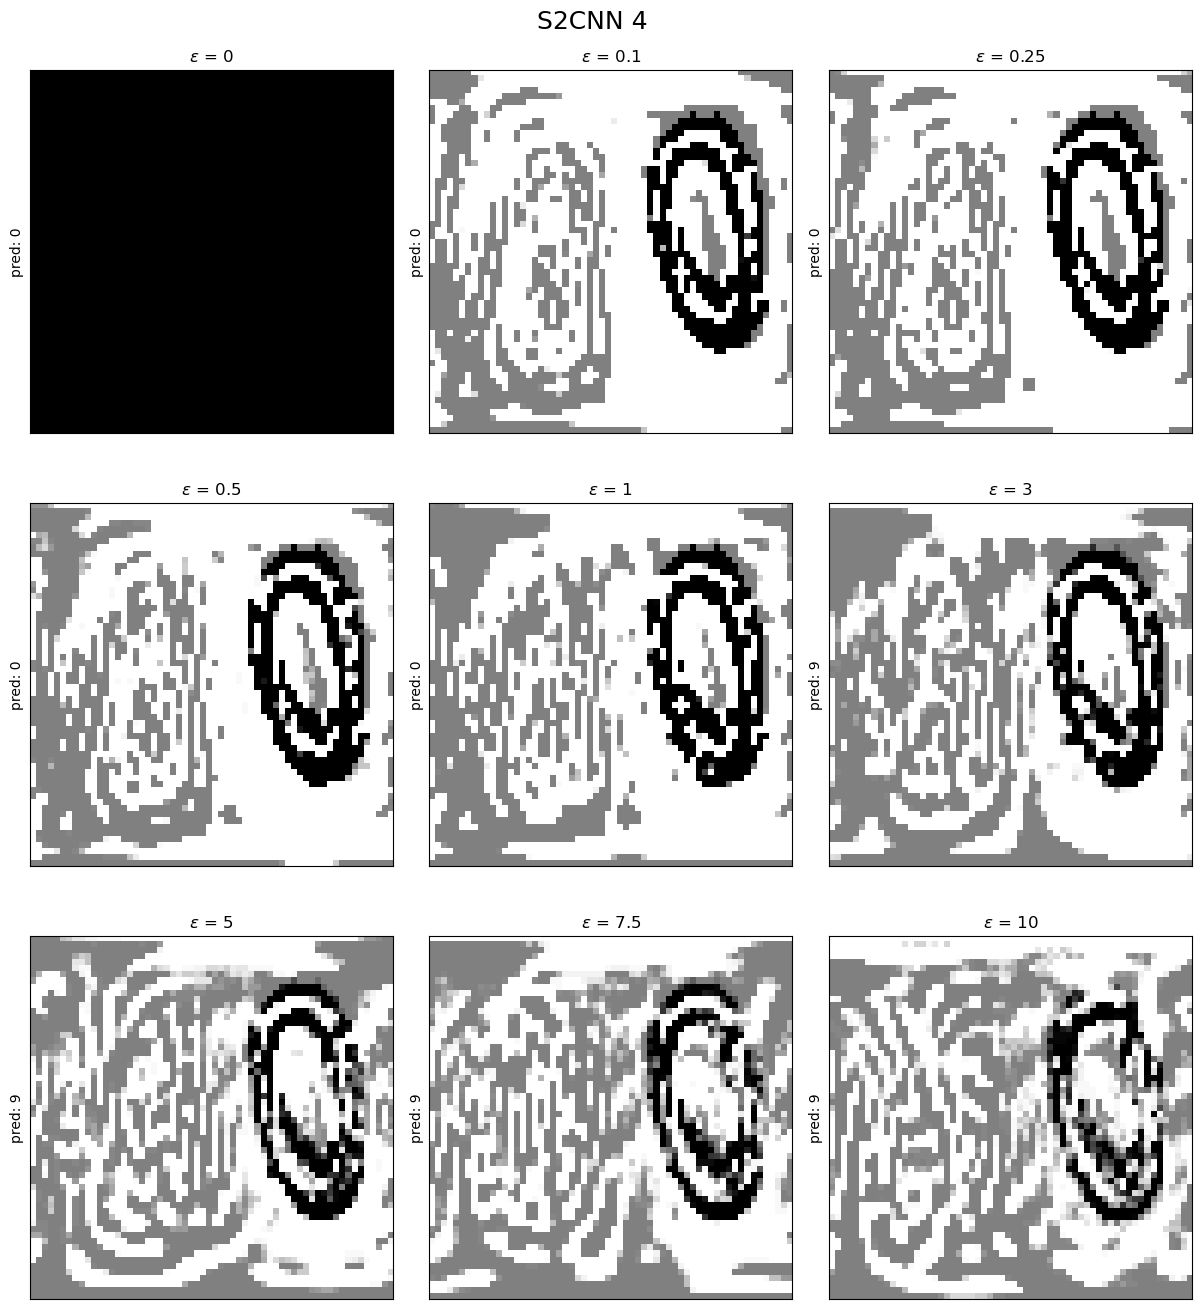

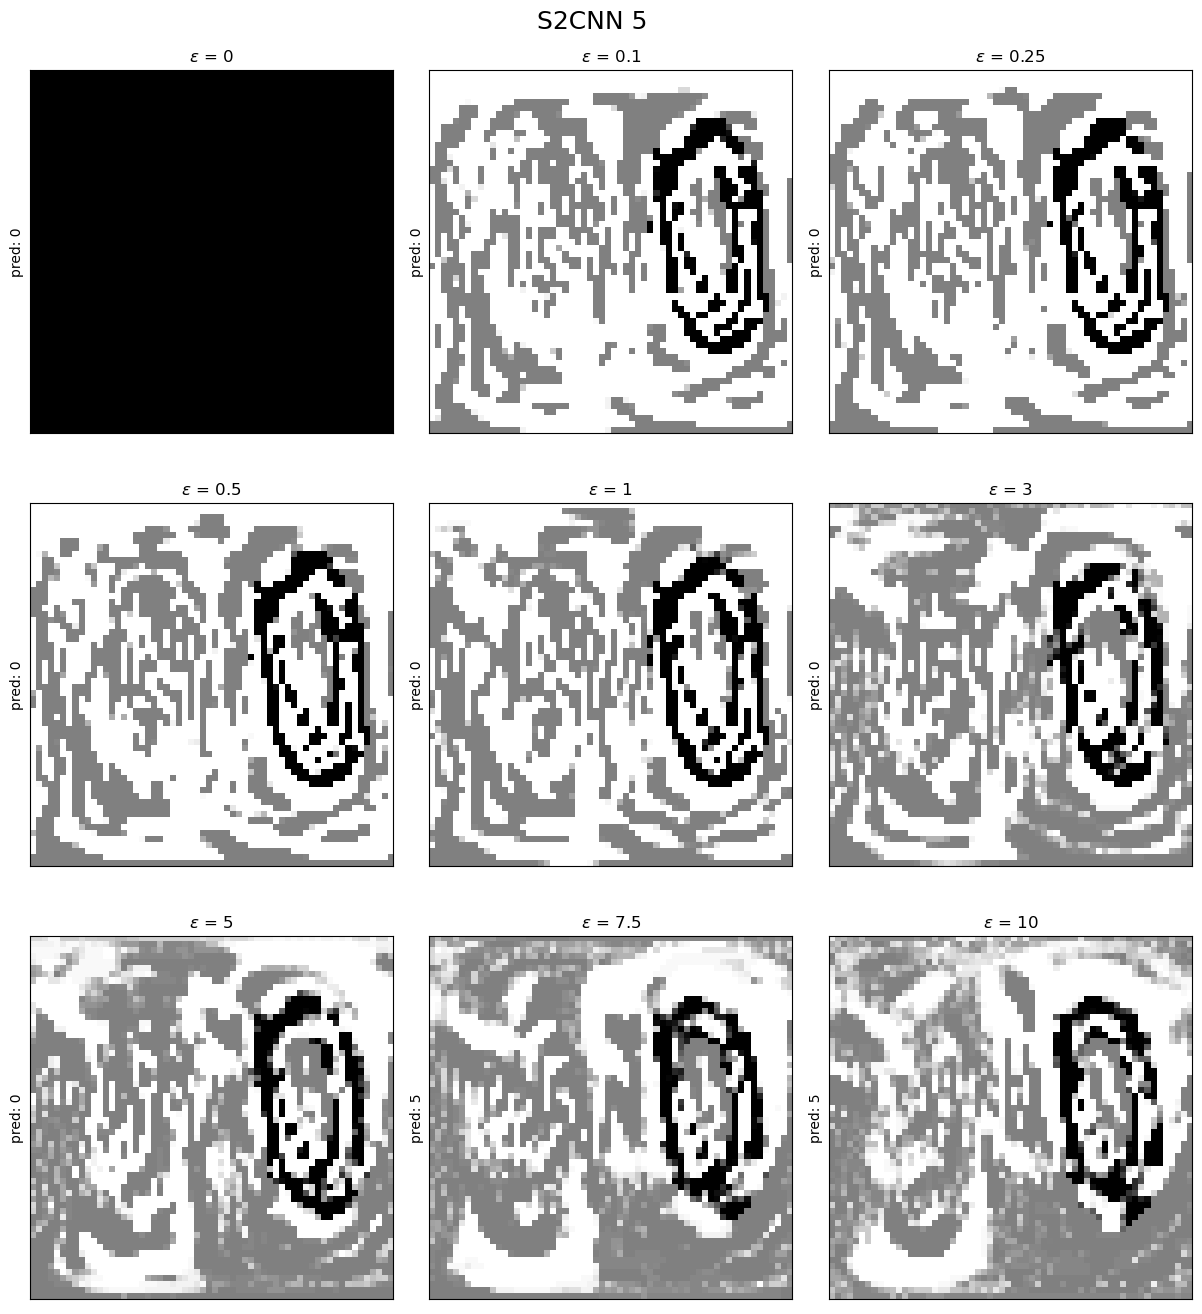

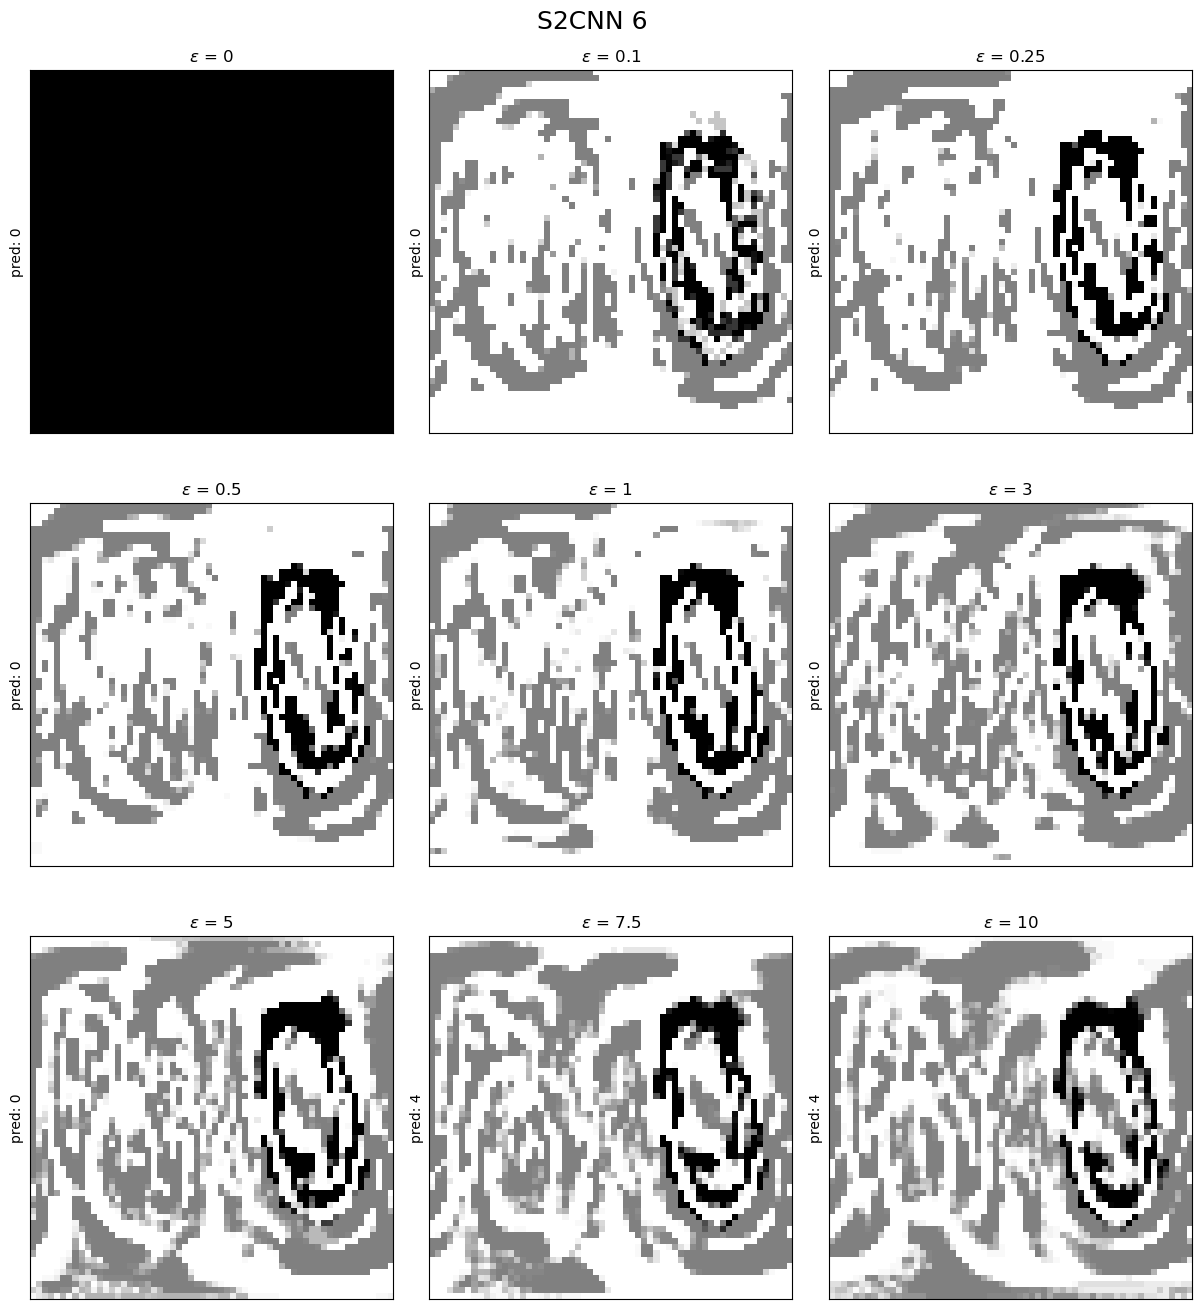

In [51]:
for i in range(1,7):
    show_differences(S2CNN_images, S2CNN_params, S2CNN_preds, i, 2, title='S2CNN', vmin=None, vmax=None)

tensor(-0.1000)
tensor(0.1000)
tensor([[0.1000, 0.1000, 0.1000,  ..., 0.1000, 0.1000, 0.1000],
        [0.1000, 0.1000, 0.1000,  ..., 0.1000, 0.1000, 0.1000],
        [0.1000, 0.1000, 0.1000,  ..., 0.1000, 0.1000, 0.1000],
        ...,
        [0.1000, 0.1000, 0.1000,  ..., 0.1000, 0.1000, 0.1000],
        [0.1000, 0.1000, 0.1000,  ..., 0.1000, 0.1000, 0.1000],
        [0.1000, 0.1000, 0.1000,  ..., 0.1000, 0.1000, 0.1000]])


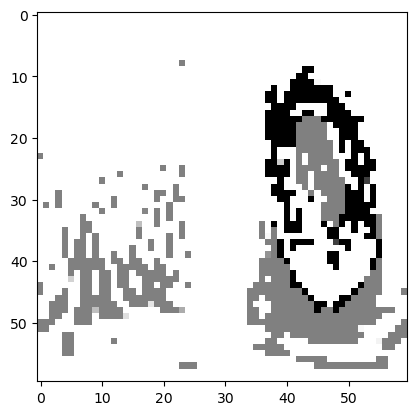

In [28]:
print(torch.min(S2CNN_images[0][1,2,0]-S2CNN_images[0][0,2,0]))
print(torch.max(S2CNN_images[0][1,2,0]-S2CNN_images[0][0,2,0]))
print(S2CNN_images[0][1,2,0]-S2CNN_images[0][0,2,0])
plt.imshow(S2CNN_images[0][1,2,0]-S2CNN_images[0][0,2,0], cmap='gray')

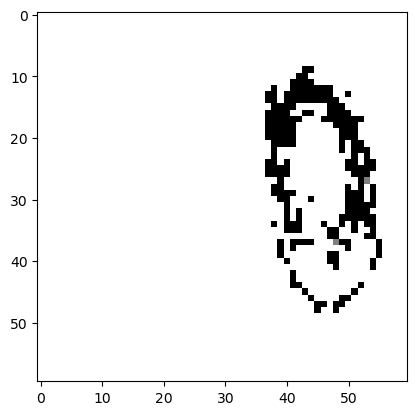

In [29]:
a = S2CNN_images[0][1,2,0]-S2CNN_images[0][0,2,0]
a[a>0] = 0
plt.imshow(a, cmap='gray')